# **Proyecto Machine Learning**
Este notebook ha sido desarrollado por Paula Sanjuan Campos, Álvaro Carracedo Ortíz, Álvaro Serra i Parri e Inés Hernández Pastor. Se trata del proyecto de la asignatura Machine Learning del Máster en Big Data Science de la Universidad de Navarra.

*Última actualización: 23 de mayo 2024*

## **Problema**
Una empresa pone a disposición de sus clientes 25 productos distintos. Los clientes pueden contratar cualquiera de los productos, pero solo pueden tener un producto activo de cada tipología. Es decir:

* Un cliente puede tener activos los productos “1”, “2”, ”6” y “22” pero no puede tener activos dos o más productos.
Por ejemplo, no puede tener activos dos productos “6”.

* Un cliente como máximo puede tener activos 25 productos, es decir, uno por tipología.
* Un cliente como mínimo puede tener activos 0 productos.

Los productos se contratan para un periodo de un mes y los contratos se puede renovar de forma
indefinida cada mes.
Se comparte una serie de datos que hacen referencia a las características asociadas a los clientes
(*features*) y 25 columnas que nos indican si tienen activo o no un producto (*targets*) para cada mes. Un cliente puede hacer tres cosas con cada producto:
* **Contratar** el producto, si el cliente no lo tenía contratado el mes anterior.
* **Mantener** el producto, si el cliente ya tenía contratado el producto el mes anterior y lo mantiene el mes en curso.
* **Cancelar** el producto, si el cliente tenía contratado el producto el mes anterior y cancela el producto el mes en curso.

Tenéis que predecir los productos que contratarán los clientes (clientes existentes en el último mes del
dato) el próximo mes (asumiendo que todos seguirán siendo clientes). Predecir los productos que se van
a contratar no es lo mismo que predecir los productos que se van a usar el próximo mes. Los productos
que los clientes usarán el próximo mes serán aquellos que se mantienen o se contratan, y lo que buscamos
es predecir estos últimos. No queremos predecir que productos ya contratados en un mes anterior y que
los clientes continúan usando.
En definitiva, el proyecto consiste en analizar, explicar, modelar y predecir la contratación de 25 productos
por parte de cada cliente. La métrica de error que se usará es el Mean Average Precision at 7 también
llamado MAP@7. Se valorará la calidad del informe, las técnicas usadas, la claridad, el ingenio (feature
engineering, visualizaciones...) y las métricas de error obtenidas en las predicciones a realizar.

https://trello.com/b/5rm7pSct/tareas-proyecto-ml


## **Librerías**

Importamos las librerías necesarias para el correcto desarrollo del proyecto. Estas nos permiten ...

In [ ]:
#!pip install ydata-profiling


In [ ]:
#!pip install pydantic-settings


In [ ]:
from google.colab import files
from google.colab import drive

import pandas as pd # manipulación y análisis de datos
import numpy as np # operaciones con arrays y matrices
import matplotlib.pyplot as plt # gráficos
import seaborn as sns # gráficos
import matplotlib.dates as mdates # trabajar con fechas en gráficos

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from sklearn.preprocessing import LabelEncoder


## **Carga y lectura de datos**


El siguiente código nos permite trabajar con archivos del Google Drive propio en este notebook de Colab sin necesidad de cargarlos manualmente cada vez que ejecutemos el notebook. De esta manera, los archivos de Google Drive están en la ruta `'/content/drive'`.

In [ ]:
# Montar Google Drive en el entorno de Colab
drive.mount('/content/drive')

Mounted at /content/drive


Para cargar los datos con formato de tabla (*DataFrame*) y que estos se puedan manipular de manera sencilla utilizamos la librería `pandas`.

In [ ]:
# Ruta al archivo CSV
# csv_path = '/content/drive/My Drive/Machine Learning/Proyecto Machine Learning/dataset_para_modelar.csv'
csv_path = '/content/drive/My Drive/Proyecto Machine Learning/dataset_para_modelar.csv'

# Cargar el DataFrame de pandas
data = pd.read_csv(csv_path, dtype={'cod_persona':str})

# # Configurar la visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar la cabecera del DataFrame
data.head(3)

<ipython-input-3-46ed7e4f0290>:6: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path, dtype={'cod_persona':str})


Unnamed: 0 cod_persona         mes pais sexo edad      fecha1 xti_empleado  \
0           0      178103  2015-01-28   ES    H   35  2015-01-12            N   
1           1      503082  2015-01-28   ES    V   27  2012-08-10            N   
2           2      502996  2015-01-28   ES    V   37  2012-08-10            N   

   xti_nuevo_cliente num_antiguedad  xti_rel fec_ult_cli_1t  xti_rel_1mes  \
0                0.0              6      1.0            NaN           1.0   
1                0.0             35      1.0            NaN           1.0   
2                0.0             35      1.0            NaN           1.0   

  tip_rel_1mes indresi indext des_canal xti_extra  tip_dom  cod_provincia  \
0            A       S      N       KHL         N      1.0           29.0   
1            I       S      N       KHE         N      1.0           40.0   
2            A       S      N       KFC         N      1.0            8.0   

   xti_actividad_cliente  imp_renta         id_segmento  mean_engagement  \
0                    1.0   87218.10   02 - PARTICULARES         6.134600   
1                    0.0   70777.59  03 - UNIVERSITARIO         5.414673   
2                    0.0  104035.08   02 - PARTICULARES         6.301283   

   ind_prod1  ind_prod2  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          0          0          0          0   

   ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   

   ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  ind_prod18  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   

   ind_prod19  ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  \
0           0           0           0         0.0         0.0           0   
1           0           0           0         0.0         0.0           0   
2           0           0           0         0.0         0.0           0   

   ind_prod25  
0           0  
1           0  
2           0

In [ ]:
# data['longitud_cod_persona'] = data['cod_persona'].astype(str).map(len)

# # Obtener las diferentes longitudes únicas
# longitudes_unicas = data['longitud_cod_persona'].unique()

# # Mostrar las longitudes únicas
# print("Longitudes únicas de 'cod_persona':", longitudes_unicas)

In [ ]:
# data.sort_values('cod_persona')

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
# data.reset_index(inplace=True)

In [ ]:
data.head(2)

cod_persona         mes pais sexo edad      fecha1 xti_empleado  \
0      178103  2015-01-28   ES    H   35  2015-01-12            N   
1      503082  2015-01-28   ES    V   27  2012-08-10            N   

   xti_nuevo_cliente num_antiguedad  xti_rel fec_ult_cli_1t  xti_rel_1mes  \
0                0.0              6      1.0            NaN           1.0   
1                0.0             35      1.0            NaN           1.0   

  tip_rel_1mes indresi indext des_canal xti_extra  tip_dom  cod_provincia  \
0            A       S      N       KHL         N      1.0           29.0   
1            I       S      N       KHE         N      1.0           40.0   

   xti_actividad_cliente  imp_renta         id_segmento  mean_engagement  \
0                    1.0   87218.10   02 - PARTICULARES         6.134600   
1                    0.0   70777.59  03 - UNIVERSITARIO         5.414673   

   ind_prod1  ind_prod2  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   

   ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   

   ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  ind_prod18  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   

   ind_prod19  ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  \
0           0           0           0         0.0         0.0           0   
1           0           0           0         0.0         0.0           0   

   ind_prod25  
0           0  
1           0

Al leer el conjunto de datos nos salta un *Warning*, que nos indica que las columnas 5,9 y 11 tienen tipos de datos mixtos. Esto significa que tenemos una mezcla de tipos y no está seguro de cómo tratarlos correctamente. Hay que llevar cuidado ya que estas columnas no estarán correctamente tipadas.

In [ ]:
# Tamaño del dataset
data.shape

(634682, 48)

La base de datos a analizar es bastante grande, pues está compuesta por 48 variables y un total de 634682 registros.

# **Limpieza de datos**

Una vez obtenido el dataset analizamos la presencia de registros duplicados, valores nulos y usuarios repetidos.


## Registros duplicados

In [ ]:
# Calcular la cantidad de registros duplicados
registros_duplicados = data.duplicated().sum()
print("Registros duplicados:", registros_duplicados)

Registros duplicados: 0


No se encuentran registros duplicados en la base de datos.

## Valores nulos

A continuación, se realiza un análisis de los valores nulos, donde se establece como criterio para imputar las variables con menos de un 2% de nulos utilizar la moda (para las categóricas) y la media (para las numéricas).
Las variables con un porcentaje mayor de nulos las imputaremos en base a su distribución y características.


In [ ]:
# Calcular nulos
data.isnull().sum().sort_values(ascending=False)

fec_ult_cli_1t           634646
imp_renta                124164
id_segmento                7403
des_canal                  7178
mean_engagement            5642
xti_rel_1mes               5642
tip_rel_1mes               5642
cod_provincia              2946
sexo                         65
xti_extra                    56
indext                       56
xti_actividad_cliente        56
tip_dom                      56
indresi                      56
xti_rel                      56
xti_nuevo_cliente            56
xti_empleado                 56
fecha1                       56
pais                         56
ind_prod23                   31
ind_prod22                   31
ind_prod18                    0
ind_prod15                    0
ind_prod14                    0
ind_prod16                    0
ind_prod17                    0
cod_persona                   0
ind_prod19                    0
ind_prod20                    0
ind_prod21                    0
ind_prod12                    0
ind_prod

In [ ]:
# Porcentaje de valores nulos en cada variable
porcentaje_nulos = np.round(data.isnull().sum() / len(data) * 100, 5)

# DataFrame auxiliar, ordenamos de mayor a menor
porcentaje_nulos_df = pd.DataFrame({'Variable': porcentaje_nulos.index, 'Porcentaje Perdido': porcentaje_nulos.values})
porcentaje_nulos_df = porcentaje_nulos_df.sort_values(by='Porcentaje Perdido', ascending=False)

# Añadir símbolo de porcentaje
porcentaje_nulos_df['Porcentaje de nulos'] = porcentaje_nulos_df['Porcentaje Perdido'].astype(str) + '%'

# Separar en tres variables: sin nulos, menos del 2% y más del 1%
sin_nulos = porcentaje_nulos_df[porcentaje_nulos_df['Porcentaje Perdido'] == 0]
menos_02 = porcentaje_nulos_df[(porcentaje_nulos_df['Porcentaje Perdido'] > 0) & (porcentaje_nulos_df['Porcentaje Perdido'] < 2)]
mas_02 = porcentaje_nulos_df[porcentaje_nulos_df['Porcentaje Perdido'] >= 2]

# Imprimir variables con nulos diferenciando en más 005 y menos 005
print("\nVariables con más del 2% de nulos:")
print(mas_02[['Variable', 'Porcentaje de nulos']])
print("\nVariables con menos del 2% de nulos:")
print(menos_02[['Variable', 'Porcentaje de nulos']])



Variables con más del 2% de nulos:
          Variable Porcentaje de nulos
10  fec_ult_cli_1t           99.99433%
20       imp_renta           19.56318%

Variables con menos del 2% de nulos:
                 Variable Porcentaje de nulos
21            id_segmento            1.16641%
15              des_canal            1.13096%
22        mean_engagement            0.88895%
11           xti_rel_1mes            0.88895%
12           tip_rel_1mes            0.88895%
18          cod_provincia            0.46417%
3                    sexo            0.01024%
16              xti_extra            0.00882%
14                 indext            0.00882%
19  xti_actividad_cliente            0.00882%
17                tip_dom            0.00882%
13                indresi            0.00882%
9                 xti_rel            0.00882%
7       xti_nuevo_cliente            0.00882%
6            xti_empleado            0.00882%
5                  fecha1            0.00882%
2                    pais  

Antes de comenzar a realizar cambios, para no tocar la base de datos original, creamos el dataframe `data_sin_nulos` que es una copia de los datos originales. Sobre estos realizaremos las transformaciones y sobre el original obtendremos los estadísticos (media, mediana y moda).

In [ ]:
# Nuevo dataframe
data_sin_nulos = data.copy()

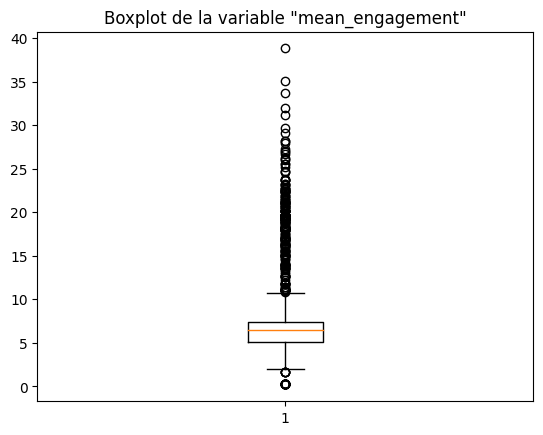

In [ ]:
mean_engagement_nan = data['mean_engagement'].dropna()
plt.boxplot(mean_engagement_nan)
plt.title('Boxplot de la variable "mean_engagement"')
plt.show()

In [ ]:
# Imputar numéricas con menos de un 2% con la media
media = data['mean_engagement'].mean()
data_sin_nulos['mean_engagement'] = data_sin_nulos['mean_engagement'].fillna(media)

In [ ]:
data_sin_nulos['pais'].value_counts()/data_sin_nulos.shape[0]

pais
ES    0.995358
DE    0.000449
GB    0.000384
FR    0.000353
US    0.000320
CH    0.000303
CO    0.000252
AR    0.000227
IT    0.000217
MX    0.000192
RO    0.000164
EC    0.000142
VE    0.000126
CL    0.000117
PY    0.000117
BE    0.000101
BR    0.000082
AT    0.000076
CA    0.000076
FI    0.000050
NL    0.000050
PL    0.000050
CN    0.000050
PE    0.000050
BG    0.000050
BO    0.000041
GT    0.000025
PK    0.000025
PT    0.000025
GN    0.000025
PR    0.000025
JP    0.000025
IL    0.000025
SA    0.000025
NG    0.000025
NZ    0.000025
IN    0.000025
AD    0.000025
UA    0.000025
SE    0.000025
GE    0.000025
CU    0.000025
PA    0.000025
SV    0.000025
AU    0.000017
MD    0.000016
RU    0.000016
HU    0.000011
Name: count, dtype: float64

Un 99% de los registros son de España, por eso eliminamos la variable país, porque además, no tiene sentido la variable cod_provincia para estos países, y imp_renta se va a imputar en base a estos.

In [ ]:
data_sin_nulos = data_sin_nulos.drop(['pais'], axis=1)

In [ ]:
# Variables a excluir de la imputación por la moda
excluir = ['mean_engagement', 'fec_ult_cli_1t', 'imp_renta']

# Lista de todas las columnas menos las que queremos excluir
columns_to_impute = [col for col in data_sin_nulos.columns if col not in excluir]

# Imputar categóricas con menos de un 2% con la moda
for column in columns_to_impute:
    moda = data[column].mode()[0]
    data_sin_nulos[column] = data_sin_nulos[column].fillna(moda)

Procedemos a estudiar las variables `fec_ult_cli_1t` e `imp_renta` para imputar sus valores nulos de la mejor manera posible.



In [ ]:
data_filtrados = data_sin_nulos[data_sin_nulos['fec_ult_cli_1t'].notna()]
valores_fec_ult_cli_1t = data_filtrados['fec_ult_cli_1t']
print(valores_fec_ult_cli_1t)

407       2015-07-30
6657      2015-07-28
55990     2015-07-28
61520     2015-07-30
86623     2015-07-28
91492     2015-07-30
118298    2015-07-28
122602    2015-07-30
125688    2015-07-30
130571    2015-07-28
157088    2015-07-30
161967    2015-07-28
215358    2015-07-28
217247    2015-07-30
246960    2015-08-06
247052    2015-08-24
252262    2015-08-28
275966    2015-09-01
293704    2015-09-24
309465    2015-09-15
322096    2015-10-07
327830    2015-10-02
346866    2015-10-02
348043    2015-10-01
372692    2015-11-02
372695    2015-11-02
373778    2015-11-24
443075    2015-12-17
448642    2015-12-24
448835    2015-12-24
448876    2015-12-28
448885    2015-12-24
460208    2016-01-12
504235    2016-02-04
505132    2016-02-16
594903    2016-04-01
Name: fec_ult_cli_1t, dtype: object


Observamos que la mayor parte de clientes se clasifican como Principales
tienen un valor NaN y esto entendemos que se debe a que no existe una fecha de finalización del contrato. Lo verificamos con la variable `xti_rel` a continuación.

In [ ]:
# Cantidad
num_clientes_1 = data[data_sin_nulos['xti_rel'] == 1].shape[0]
num_clientes_99 = data[data_sin_nulos['xti_rel'] == 99].shape[0]

# Imprimir los resultados
print("Número de clientes con xti_rel igual a 1:", num_clientes_1)
print("Número de clientes con xti_rel igual a 99:", num_clientes_99)

data_sin_nulos[data_sin_nulos['xti_rel'] == 99]['fec_ult_cli_1t']

Número de clientes con xti_rel igual a 1: 634646
Número de clientes con xti_rel igual a 99: 36


407       2015-07-30
6657      2015-07-28
55990     2015-07-28
61520     2015-07-30
86623     2015-07-28
91492     2015-07-30
118298    2015-07-28
122602    2015-07-30
125688    2015-07-30
130571    2015-07-28
157088    2015-07-30
161967    2015-07-28
215358    2015-07-28
217247    2015-07-30
246960    2015-08-06
247052    2015-08-24
252262    2015-08-28
275966    2015-09-01
293704    2015-09-24
309465    2015-09-15
322096    2015-10-07
327830    2015-10-02
346866    2015-10-02
348043    2015-10-01
372692    2015-11-02
372695    2015-11-02
373778    2015-11-24
443075    2015-12-17
448642    2015-12-24
448835    2015-12-24
448876    2015-12-28
448885    2015-12-24
460208    2016-01-12
504235    2016-02-04
505132    2016-02-16
594903    2016-04-01
Name: fec_ult_cli_1t, dtype: object

Exactamente son 36 clientes los que no tienen Na.



In [ ]:
# Número de registros con Na
data_sin_nulos.shape[0] - data_sin_nulos['fec_ult_cli_1t'].isna().sum()

36

Rellenamos los valores faltantes de la variable `fec_ult_cli_1t` con el valor `-1`. Entendemos que el contrato sigue vigente y no ha finalizado.

In [ ]:
# Eliminar Na en 'fec_ult_cli_1t'
data_sin_nulos = data_sin_nulos.drop(['fec_ult_cli_1t'], axis=1)

Por otro lado, observamos un boxplot de la variable `imp_renta`. Este proporciona información sobre la mediana, los cuartiles y los valores atípicos en la distribución de los ingresos del hogar.

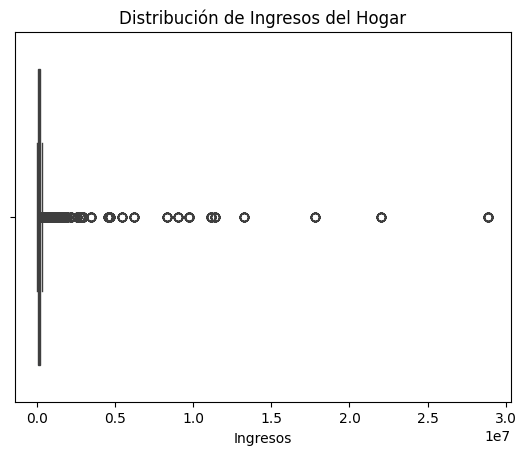

In [ ]:
# Graficar boxplot de 'imp_renta'
sns.boxplot(x=data['imp_renta'].dropna())
plt.title('Distribución de Ingresos del Hogar')
plt.xlabel('Ingresos')
plt.show()


El boxplot muestra una caja muy a la izquierda y estrecha, por lo que la distribución de la variable `imp_renta` está sesgada hacia valores bajos. Además, se evidencia una presencia de valores atípicos en el extremo superior. Como este gráfico no termina de convencernos, decidimos obtener un barplot de la variable agrupando por códigos de provincias, ya que pensamos que puede variar la renta en función de la provincia en la que se ubique.

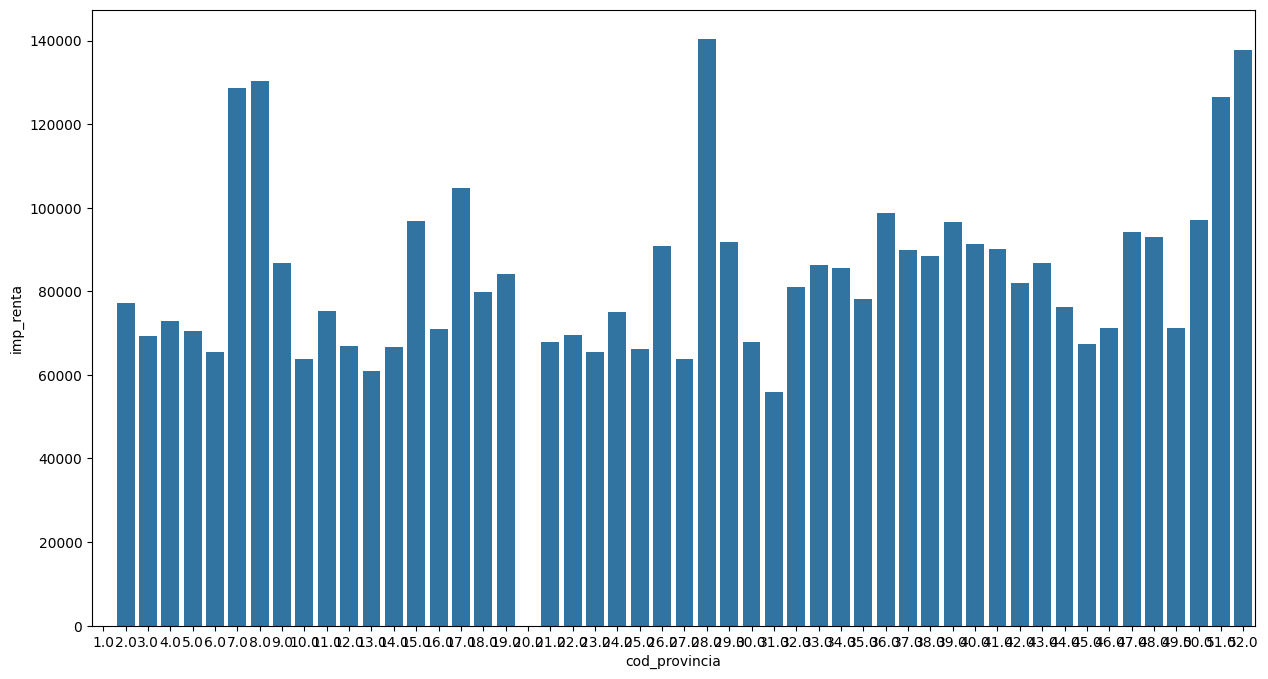

In [ ]:
# Calculando la mediana de 'imp_renta' por provincia
renta_mediana_por_provincia = data_sin_nulos.groupby('cod_provincia')['imp_renta'].median().reset_index()

# Ordenando los datos por la renta mediana para una mejor visualización
renta_mediana_por_provincia = renta_mediana_por_provincia.sort_values(by='imp_renta', ascending=False)

# Creando el gráfico de barras
plt.figure(figsize=(15, 8))  # Ajustar el tamaño del gráfico según necesidad
barplot = sns.barplot(x='cod_provincia', y='imp_renta', data=renta_mediana_por_provincia)


Como bien intuíamos, se encuentran diferencias en las medianas agrupando por provincia, por lo que pensamos que será mejor realizar la imputación agrupando por `cod_provincia`.

Comprobamos si hay algún código de provincia en el que no tengamos valores porque en el gráfico vemos que hay dos barras vacías.

In [ ]:
# Revisar si algún grupo tiene solo valores NaN
nan_groups = data_sin_nulos.groupby('cod_provincia')['imp_renta'].apply(lambda x: x.isnull().all())
print(nan_groups[nan_groups == True])
print('Numero de registros de estas provincias: ')
print((data_sin_nulos['cod_provincia'] == 1.0).sum())
print((data_sin_nulos['cod_provincia'] == 20.0).sum())

cod_provincia
1.0     True
20.0    True
Name: imp_renta, dtype: bool
Numero de registros de estas provincias: 
1844
3169


Efectivamente son dos provincias en las que no tenemos valores, estas las imputaremos por la mediana global.

In [ ]:
# Mediana global para grupos vacíos
global_median = data_sin_nulos['imp_renta'].median()

# Imputación usando la mediana por provincia y por la mediana global
data_sin_nulos['imp_renta'] = data_sin_nulos.groupby('cod_provincia')['imp_renta'].transform(
    lambda x: x.fillna(x.median() if not x.isnull().all() else global_median)
)

Comprobamos que ya no existen Na.

In [ ]:
data_sin_nulos.isnull().sum().sum()

0

## Usuarios repetidos

Analizamos si existen usuarios repetidos viendo un conteo de la clave primaria `cod_persona`.

In [ ]:
# Agrupar por 'cod_persona' y contar ocurrencias.
data_sin_nulos.groupby('cod_persona').agg(conteo=('cod_persona','count')).sort_values(by='conteo', ascending = False)


conteo
cod_persona        
999992           16
337451           16
318974           16
318967           16
318839           16
...             ...
6250              1
415857            1
10825             1
10861             1
8617              1

[46779 rows x 1 columns]

Analizamos a los usuarios que cuentan con más de un registro por `cod_persona` con el objetivo de comprender las razones detrás de esta duplicidad.

In [ ]:
# Añadir columna 'duplicados' que indica si un registro está duplicado en la columna 'cod_persona'
data_sin_nulos['duplicados'] = data_sin_nulos.duplicated(subset=['cod_persona'], keep=False)

# Filtramos y mostramos solo las filas marcadas como duplicadas, ordenadas por 'ID' en orden descendente
data_sin_nulos[data_sin_nulos['duplicados']].sort_values(by='cod_persona', ascending = False).head()

cod_persona         mes sexo edad      fecha1 xti_empleado  \
570713      999992  2016-03-28    V   40  2005-09-02            N   
186939      999992  2015-06-28    V   39  2005-09-02            N   
439163      999992  2015-12-28    V   40  2005-09-02            N   
192325      999992  2015-07-28    V   39  2005-09-02            N   
93365       999992  2015-04-28    V   39  2005-09-02            N   

        xti_nuevo_cliente num_antiguedad  xti_rel  xti_rel_1mes tip_rel_1mes  \
570713                0.0             91      1.0           1.0            I   
186939                0.0             83      1.0           1.0            I   
439163                0.0             88      1.0           1.0            I   
192325                0.0             83      1.0           1.0            I   
93365                 0.0             83      1.0           1.0            I   

       indresi indext des_canal xti_extra  tip_dom  cod_provincia  \
570713       S      N       KAT         N      1.0            8.0   
186939       S      N       KAT         N      1.0            8.0   
439163       S      N       KAT         N      1.0            8.0   
192325       S      N       KAT         N      1.0            8.0   
93365        S      N       KAT         N      1.0            8.0   

        xti_actividad_cliente  imp_renta        id_segmento  mean_engagement  \
570713                    0.0  250917.42  02 - PARTICULARES         6.543075   
186939                    0.0  250917.42  02 - PARTICULARES         6.463518   
439163                    0.0  250917.42  02 - PARTICULARES         6.543075   
192325                    0.0  250917.42  02 - PARTICULARES         6.463518   
93365                     0.0  250917.42  02 - PARTICULARES         6.463518   

        ind_prod1  ind_prod2  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
570713          0          0          1          0          0          0   
186939          0          0          1          0          0          0   
439163          0          0          1          0          0          0   
192325          0          0          1          0          0          0   
93365           0          0          1          0          0          0   

        ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
570713          0          0          0           0           0           0   
186939          0          0          0           0           0           0   
439163          0          0          0           0           0           0   
192325          0          0          0           0           0           0   
93365           0          0          0           0           0           0   

        ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  \
570713           0           0           0           0           0   
186939           0           0           0           0           0   
439163           0           0           0           0           0   
192325           0           0           0           0           0   
93365            0           0           0           0           0   

        ind_prod18  ind_prod19  ind_prod20  ind_prod21  ind_prod22  \
570713           0           0           0           0         0.0   
186939           0           0           0           0         0.0   
439163           0           0           0           0         0.0   
192325           0           0           0           0         0.0   
93365            0           0           0           0         0.0   

        ind_prod23  ind_prod24  ind_prod25  duplicados  
570713         0.0           0           0        True  
186939         0.0           0           0        True  
439163         0.0           0           0        True  
192325         0.0           0           0        True  
93365          0.0           0           0        True

Como se puede observar por pantalla, la variación se da en la variable `mes` y el campo `cod_persona` identifica de manera única a una persona .

In [ ]:
# Ordenar por 'mes'
data_sin_nulos = data_sin_nulos.sort_values(by='mes', ascending=False)

data_prepro = data_sin_nulos.copy()
# Eliminamos la columna duplicados
data_prepro.drop('duplicados', axis = 1, inplace = True)

In [ ]:
# Tamaño del conjunto de datos
data_prepro.shape

(634682, 46)

In [ ]:
# Calculamos la cantidad de valores nulos del DataFrame
data_prepro.isnull().sum().sum()

0

# Análisis de datos

Partimos de `data_prepro`, el cual es el dataset preprocesado sin duplicados y sin valores perdidos.






##Análisis del tipo de las variables

Tras la carga de los datos, procedemos a realizar un resumen descriptivo y estadístico de las variables presentes en la base de datos.

In [ ]:
# Resumen estadístico
data_prepro.describe().T

count           mean            std         min  \
xti_nuevo_cliente      634682.0       0.059841       0.237192     0.00000   
xti_rel                634682.0       1.005559       0.738053     1.00000   
xti_rel_1mes           634682.0       1.000581       0.036397     0.00000   
tip_dom                634682.0       1.000000       0.000000     1.00000   
cod_provincia          634682.0      26.605245      12.748333     1.00000   
xti_actividad_cliente  634682.0       0.459085       0.498324     0.00000   
imp_renta              634682.0  129072.803852  300159.826173  4559.55000   
mean_engagement        634682.0       6.425623       1.339883     0.21852   
ind_prod1              634682.0       0.000101       0.010041     0.00000   
ind_prod2              634682.0       0.000000       0.000000     0.00000   
ind_prod3              634682.0       0.660945       0.473389     0.00000   
ind_prod4              634682.0       0.000495       0.022237     0.00000   
ind_prod5              634682.0       0.081740       0.273969     0.00000   
ind_prod6              634682.0       0.009992       0.099461     0.00000   
ind_prod7              634682.0       0.009825       0.098635     0.00000   
ind_prod8              634682.0       0.131909       0.338392     0.00000   
ind_prod9              634682.0       0.043504       0.203988     0.00000   
ind_prod10             634682.0       0.002036       0.045072     0.00000   
ind_prod11             634682.0       0.001899       0.043531     0.00000   
ind_prod12             634682.0       0.043438       0.203840     0.00000   
ind_prod13             634682.0       0.083139       0.276093     0.00000   
ind_prod14             634682.0       0.018698       0.135455     0.00000   
ind_prod15             634682.0       0.005275       0.072438     0.00000   
ind_prod16             634682.0       0.009263       0.095797     0.00000   
ind_prod17             634682.0       0.002718       0.052063     0.00000   
ind_prod18             634682.0       0.053576       0.225180     0.00000   
ind_prod19             634682.0       0.045505       0.208408     0.00000   
ind_prod20             634682.0       0.026503       0.160626     0.00000   
ind_prod21             634682.0       0.003756       0.061173     0.00000   
ind_prod22             634682.0       0.055559       0.229067     0.00000   
ind_prod23             634682.0       0.060292       0.238027     0.00000   
ind_prod24             634682.0       0.128827       0.335008     0.00000   
ind_prod25             634682.0       0.065876       0.248065     0.00000   

                              25%           50%            75%           max  
xti_nuevo_cliente          0.0000      0.000000       0.000000  1.000000e+00  
xti_rel                    1.0000      1.000000       1.000000  9.900000e+01  
xti_rel_1mes               1.0000      1.000000       1.000000  4.000000e+00  
tip_dom                    1.0000      1.000000       1.000000  1.000000e+00  
cod_provincia             15.0000     28.000000      34.000000  5.200000e+01  
xti_actividad_cliente      0.0000      0.000000       1.000000  1.000000e+00  
imp_renta              69650.8500  96886.860000  140388.540000  2.889440e+07  
mean_engagement            5.1175      6.463518       7.289588  3.879312e+01  
ind_prod1                  0.0000      0.000000       0.000000  1.000000e+00  
ind_prod2                  0.0000      0.000000       0.000000  0.000000e+00  
ind_prod3                  0.0000      1.000000       1.000000  1.000000e+00  
ind_prod4                  0.0000      0.000000       0.000000  1.000000e+00  
ind_prod5                  0.0000      0.000000       0.000000  1.000000e+00  
ind_prod6                  0.0000      0.000000       0.000000  1.000000e+00  
ind_prod7                  0.0000      0.000000       0.000000  1.000000e+00  
ind_prod8                  0.0000      0.000000       0.000000  1.000000e+00  
ind_prod9                  0.0000      0.000000       0.000000  

Cabe destacar que el análisis estadístico solo se realiza de las variables numéricas.

In [ ]:
# Columnas del dataset
data_prepro.columns

Index(['cod_persona', 'mes', 'sexo', 'edad', 'fecha1', 'xti_empleado',
       'xti_nuevo_cliente', 'num_antiguedad', 'xti_rel', 'xti_rel_1mes',
       'tip_rel_1mes', 'indresi', 'indext', 'des_canal', 'xti_extra',
       'tip_dom', 'cod_provincia', 'xti_actividad_cliente', 'imp_renta',
       'id_segmento', 'mean_engagement', 'ind_prod1', 'ind_prod2', 'ind_prod3',
       'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7', 'ind_prod8',
       'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12', 'ind_prod13',
       'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17', 'ind_prod18',
       'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22', 'ind_prod23',
       'ind_prod24', 'ind_prod25'],
      dtype='object')

In [ ]:
# Tipos de las variables
data_prepro.dtypes

cod_persona               object
mes                       object
sexo                      object
edad                      object
fecha1                    object
xti_empleado              object
xti_nuevo_cliente        float64
num_antiguedad            object
xti_rel                  float64
xti_rel_1mes             float64
tip_rel_1mes              object
indresi                   object
indext                    object
des_canal                 object
xti_extra                 object
tip_dom                  float64
cod_provincia            float64
xti_actividad_cliente    float64
imp_renta                float64
id_segmento               object
mean_engagement          float64
ind_prod1                  int64
ind_prod2                  int64
ind_prod3                  int64
ind_prod4                  int64
ind_prod5                  int64
ind_prod6                  int64
ind_prod7                  int64
ind_prod8                  int64
ind_prod9                  int64
ind_prod10

In [ ]:
data_prepro.head(2)

cod_persona         mes sexo edad      fecha1 xti_empleado  \
634681      256280  2016-04-28    H   23  2014-08-18            N   
603505     1294986  2016-04-28    V   91  2001-07-03            N   

        xti_nuevo_cliente num_antiguedad  xti_rel  xti_rel_1mes tip_rel_1mes  \
634681                0.0             20      1.0           1.0            A   
603505                0.0            177      1.0           1.0            I   

       indresi indext des_canal xti_extra  tip_dom  cod_provincia  \
634681       S      N       KFC         N      1.0           21.0   
603505       S      N       KFC         N      1.0           28.0   

        xti_actividad_cliente  imp_renta        id_segmento  mean_engagement  \
634681                    1.0   71878.92  02 - PARTICULARES         5.014352   
603505                    0.0   52420.23  02 - PARTICULARES         9.757912   

        ind_prod1  ind_prod2  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
634681          0          0          1          0          0          0   
603505          0          0          0          0          0          0   

        ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
634681          0          0          0           0           0           0   
603505          0          0          0           0           0           0   

        ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  \
634681           0           0           0           0           0   
603505           0           0           0           0           0   

        ind_prod18  ind_prod19  ind_prod20  ind_prod21  ind_prod22  \
634681           0           0           0           0         0.0   
603505           0           0           0           0         0.0   

        ind_prod23  ind_prod24  ind_prod25  
634681         0.0           0           0  
603505         0.0           0           0

Consideramos que habrá que cambiar los tipos de:
* `mes`, `fecha1` y `fec_ult_cli_1t` a tipo datetime
* `num_antiguedad`, `edad` a tipo numérico

## Análisis de valores únicos

Observamos el número de valores únicos que puede tomar cada una de las variables. Descartamos aquellas variables que tienen un único valor ya que estas no aportan información relevante.

In [ ]:
# Número de valores únicos
data_prepro.nunique()

cod_persona              46779
mes                         16
sexo                         2
edad                       216
fecha1                    5796
xti_empleado                 4
xti_nuevo_cliente            2
num_antiguedad             503
xti_rel                      2
xti_rel_1mes                 5
tip_rel_1mes                 4
indresi                      2
indext                       2
des_canal                  126
xti_extra                    2
tip_dom                      1
cod_provincia               52
xti_actividad_cliente        2
imp_renta                34523
id_segmento                  3
mean_engagement            204
ind_prod1                    2
ind_prod2                    1
ind_prod3                    2
ind_prod4                    2
ind_prod5                    2
ind_prod6                    2
ind_prod7                    2
ind_prod8                    2
ind_prod9                    2
ind_prod10                   2
ind_prod11                   2
ind_prod

De este análisis extraemos que:

* Existen 216 edades diferentes, posteriormente tendremos que analizar lo que está ocurriendo.

* La variable `tip_dom` no aporta información, pues todos los registros tienen el mismo valor (1).

* La variable `pais` no aporta información, pues todos los registros tienen el mismo valor (ES).

* El producto 2, identificado por la variable `ind_prod2` no ha sido usado por los clientes en ningún mes.


Dado que no aportan información significativa, se procede a eliminar las variables `ind_prod2` y `tip_dom`.

### Eliminación de variables invariantes

In [ ]:
# Eliminar las variables 'ind_prod2' y 'tip_dom'
data_prepro.drop(columns=['ind_prod2','tip_dom'], inplace=True)

In [ ]:
duplicados = data_prepro.duplicated()

# Contar y mostrar el número de registros duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")


Número de registros duplicados: 0


### Análisis de la variable 'mes'

In [ ]:
# Contar las ocurrencias en la columna 'mes'
conteo_mes = data_prepro['mes'].value_counts()
pd.set_option('display.max_rows', None)
conteo_mes

mes
2016-04-28    46776
2016-03-28    46549
2016-02-28    46287
2016-01-28    45994
2015-12-28    45675
2015-11-28    45309
2015-10-28    44574
2015-09-28    43170
2015-08-28    42016
2015-07-28    41342
2015-06-28    31429
2015-05-28    31336
2015-04-28    31250
2015-03-28    31138
2015-02-28    30988
2015-01-28    30849
Name: count, dtype: int64

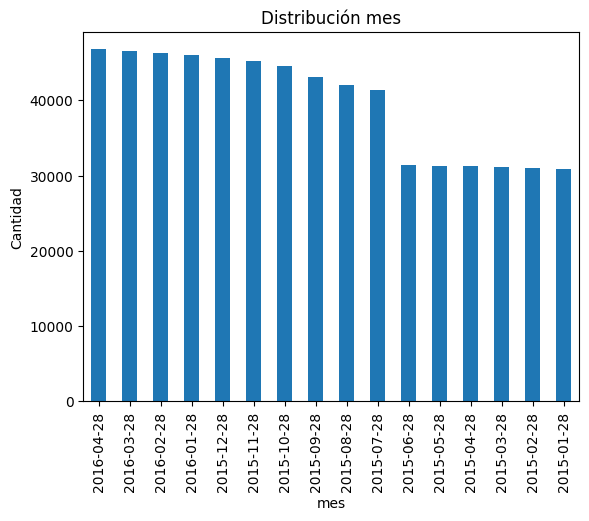

In [ ]:
# Gráfico barras variable 'mes'
data_prepro['mes'].value_counts().plot(kind='bar')
plt.title('Distribución mes')
plt.ylabel('Cantidad')
plt.show()

Vemos la cantidad de productos que se han contratado o mantenido por mes.

### Análisis de la variable 'sexo'

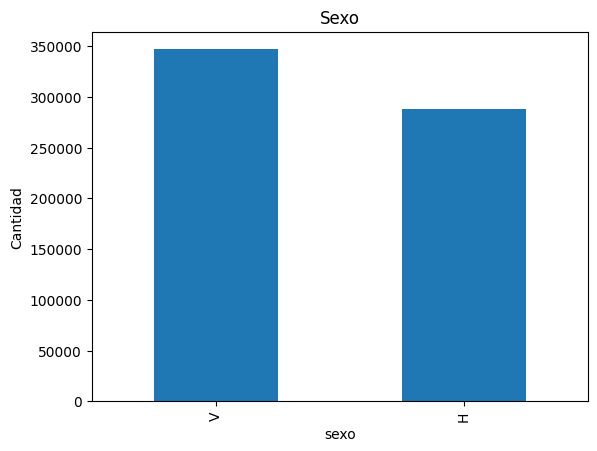

In [ ]:
# Gráfico barras variable 'sexo'
data_prepro['sexo'].value_counts().plot(kind='bar')
plt.title('Sexo')
plt.ylabel('Cantidad')
plt.show()

Entendemos que la categoría V se refiere a varón y la categoría H a hembra. Pensamos que se entiende mejor como M masculino y F femenino.

In [ ]:
# Codigo para solucionar el etiquetado
data_prepro['sexo'] = data_prepro['sexo'].replace({'V': 'M', 'H': 'F' })

# Verificar cambios
print(data_prepro['sexo'].value_counts())

sexo
M    346910
F    287772
Name: count, dtype: int64


### Análisis de la variable 'edad'

In [ ]:
data_prepro['edad'].dtypes

dtype('O')

In [ ]:
(data_prepro['edad']=='NA').sum()

0

In [ ]:
# Contar las ocurrencias de cada edad en la columna 'edad'
conteo_edades = data_prepro['edad'].value_counts()
pd.set_option('display.max_rows', None)
conteo_edades

edad
23     25095
22     23936
24     23416
21     22674
20     17530
25     15502
 23    11967
26     11323
42     10732
 22    10706
44     10506
45     10460
 24    10305
43     10259
41     10195
40      9761
46      9570
47      9190
48      8992
27      8869
39      8803
 21     8636
49      8303
28      8139
50      7800
38      7772
37      7397
29      7216
51      7189
52      6994
53      6686
36      6643
54      6491
30      6271
 25     6250
35      6245
33      5865
32      5801
55      5671
34      5651
31      5556
56      5079
 26     4672
57      4621
 44     4502
58      4371
 42     4304
59      4171
60      4165
 45     4149
 43     4107
 41     4024
 40     4006
 46     4002
 27     3890
 48     3740
61      3682
 47     3604
 28     3593
62      3470
 39     3445
 50     3165
 49     3156
63      3133
 51     3098
64      3009
65      2959
 38     2909
 29     2786
 53     2768
 37     2757
 20     2721
66      2708
 52     2651
 54     2621
 36     2523
67     

Parece ser que existe algún error con el formato, vamos a solucionarlo.

In [ ]:
# Eliminar espacios y otros caracteres no numéricos, excepto para la detección de valores no numéricos como NA
data_prepro['edad'] = data_prepro['edad'].astype(str)  # Asegúrate de que todo es tratado como string
data_prepro['edad'] = data_prepro['edad'].str.replace(r'[^0-9NA]+', '', regex=True).str.strip()

# # Convertir 'NA' a NaN antes de la conversión numérica
data_prepro['edad'] = data_prepro['edad'].replace('NA', pd.NA)


# Convertir los valores limpios a números, usando 'coerce' para manejar los errores
data_prepro['edad'] = pd.to_numeric(data_prepro['edad'], errors='coerce')

In [ ]:
# Contar las ocurrencias de cada valor entero
conteo_edades = data_prepro['edad'].value_counts(dropna=True)
print(conteo_edades)

edad
23.0     37062
22.0     34642
24.0     33721
21.0     31310
25.0     21752
20.0     20251
26.0     15995
42.0     15036
44.0     15008
45.0     14609
43.0     14366
41.0     14219
40.0     13767
46.0     13572
47.0     12794
27.0     12759
48.0     12732
39.0     12248
28.0     11732
49.0     11459
50.0     10965
38.0     10681
51.0     10287
37.0     10154
29.0     10002
52.0      9645
53.0      9454
36.0      9166
54.0      9112
30.0      8693
35.0      8470
32.0      8036
33.0      7993
55.0      7961
34.0      7832
31.0      7781
56.0      7158
57.0      6506
58.0      6143
59.0      5921
60.0      5886
61.0      5022
62.0      4896
63.0      4296
64.0      4131
65.0      4001
66.0      3717
69.0      3430
68.0      3422
67.0      3414
71.0      3308
70.0      3190
72.0      3167
73.0      2761
74.0      2497
77.0      2470
75.0      2410
76.0      2277
81.0      1600
79.0      1599
78.0      1567
83.0      1488
80.0      1483
82.0      1469
85.0      1459
84.0      1378
86.0 

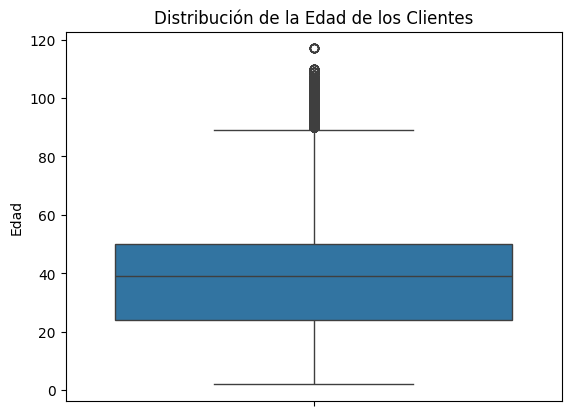

In [ ]:
# Boxplot de la variable edad
sns.boxplot(y=data_prepro['edad'].dropna())
plt.title('Distribución de la Edad de los Clientes')
plt.ylabel('Edad')
plt.show()

In [ ]:
data_prepro.isna().sum().sum()

56

Eliminamos todos los registros de la variable que tengan un valor inferior a 18 o superior a 95, ya que no se puede considerar información de menores de edad...

In [ ]:
subset_edad_extrema = data_prepro.loc[(data_prepro['edad'] > 95) | (data_prepro['edad'] < 18) | data_prepro['edad'].isna()]

# Configurar la visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar la cabeza del subset resultante
subset_edad_extrema.head()

# Eliminar los registros del DataFrame original
data_prepro.drop(subset_edad_extrema.index, inplace=True)

print(data_prepro.shape)

(626928, 44)


In [ ]:
data_prepro.isna().sum().sum()

0

### Análisis de la variable 'fecha1'

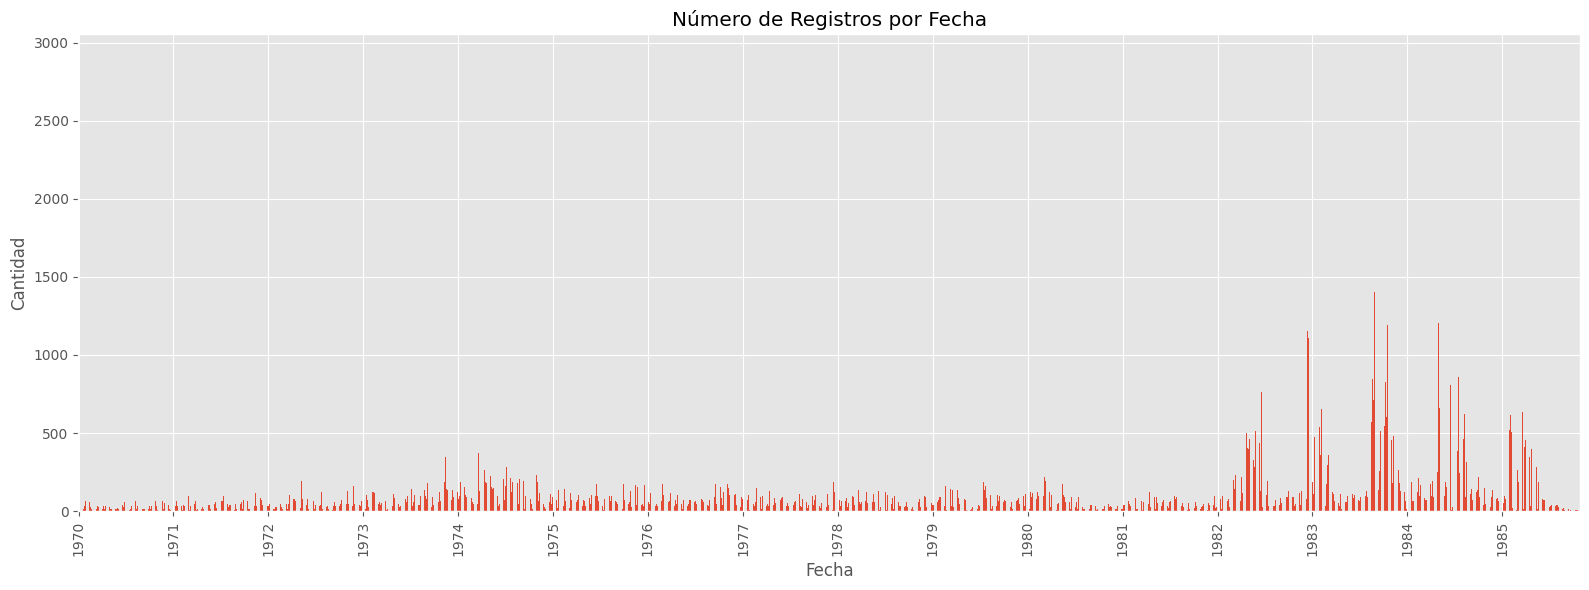

In [ ]:
# Contar las ocurrencias de cada fecha
conteo_fechas = data_prepro['fecha1'].value_counts()

# Ordenar el índice para que el gráfico siga un orden cronológico
conteo_fechas.sort_index(inplace=True)

# Crear un barplot
plt.figure(figsize=(16, 6))

# Estilo
plt.style.use('ggplot')

# Crear el gráfico de barras
conteo_fechas.plot(kind='bar')

# Formato el eje x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Sitúa las marcas cada año
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Muestra solo el año

# Rotar las fechas para mejor lectura
plt.xticks(rotation=90)

# etiquetas a los ejes
plt.title('Número de Registros por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el gráfico se puede observar que el número de clientes principales ha aumentado desde 1982.

### Análisis de la variable xti_empleado

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'xti_empleado': A active, B ex employed, F filial, N not employee
conteo_xti_empleado = data_prepro['xti_empleado'].value_counts(dropna=False)/data_prepro.shape[0]
pd.set_option('display.max_rows', None)
conteo_xti_empleado

xti_empleado
N    0.999254
A    0.000322
B    0.000271
F    0.000153
Name: count, dtype: float64

In [ ]:
data_prepro.drop(['xti_empleado'], axis=1, inplace=True)

Se observa que el valor modal, con mucha diferencia es N, es decir, la mayoría de clientes no son empleados.

### Análisis de la variable 'xti_nuevo_cliente'

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'xti_nuevo_cliente'
conteo_xti_nuevo_cliente = data_prepro['xti_nuevo_cliente'].value_counts(dropna=False)/data_prepro.shape[0]
pd.set_option('display.max_rows', None)
conteo_xti_nuevo_cliente

xti_nuevo_cliente
0.0    0.939763
1.0    0.060237
Name: count, dtype: float64

37764 clientes se han registrado en los últimos 6 meses.

### Análisis de la variable num_antiguedad

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'num_antiguedad'
conteo_num_antiguedad = data_prepro['num_antiguedad'].value_counts(dropna=False)
pd.set_option('display.max_rows', None)
conteo_num_antiguedad

num_antiguedad
12         6353
1          6144
0          5984
3          5874
2          5838
5          5785
     21    5752
     12    5679
14         5489
4          5449
16         5282
13         5208
15         5150
17         5088
24         5027
     10    4964
26         4873
6          4857
     33    4838
25         4763
27         4664
     45    4622
28         4586
38         4540
18         4525
23         4508
40         4470
36         4420
37         4372
39         4338
29         4328
11         4313
21         4299
      9    4248
41         4201
10         4134
7          4109
50         4041
52         4029
48         4025
49         4023
9          3991
22         3884
35         3859
30         3843
     23    3805
     44    3780
51         3771
47         3761
19         3723
     35    3710
8          3674
20         3592
42         3532
53         3521
     34    3516
45         3433
46         3413
     24    3309
34         3302
     36    3298
     32  

Ocurre lo mismo que con edad

In [ ]:
# Eliminar espacios y otros caracteres no numéricos, excepto para la detección de valores no numéricos como NA
data_prepro['num_antiguedad'] = data_prepro['num_antiguedad'].astype(str)  # Asegúrate de que todo es tratado como string
data_prepro['num_antiguedad'] = data_prepro['num_antiguedad'].str.replace(r'[^0-9NA]+', '', regex=True).str.strip()

# Convertir 'NA' a NaN antes de la conversión numérica
data_prepro['num_antiguedad'] = data_prepro['num_antiguedad'].replace('NA', pd.NA)


# Convertir los valores limpios a números, usando 'coerce' para manejar los errores
data_prepro['num_antiguedad'] = pd.to_numeric(data_prepro['num_antiguedad'], errors='coerce')

In [ ]:
# Contar las ocurrencias de cada valor entero
conteo_num_antiguedad = data_prepro['num_antiguedad'].value_counts(dropna=True)  # Puedes usar dropna=True para excluir NaNs del conteo
print(conteo_num_antiguedad)

num_antiguedad
12     12032
21     10051
10      9098
24      8336
23      8313
9       8239
33      8065
45      8055
36      7718
35      7569
44      6999
22      6980
34      6818
5       6689
16      6503
8       6470
47      6469
46      6438
32      6284
20      6259
1       6222
14      6221
3       6184
13      6085
2       6046
4       5985
0       5984
11      5962
43      5870
17      5826
15      5816
48      5659
6       5574
18      5549
26      5320
27      5317
25      5307
38      5115
28      5073
7       4961
40      4920
37      4866
19      4855
39      4789
29      4761
41      4591
30      4476
52      4390
49      4365
31      4344
50      4293
51      3965
42      3902
165     3855
53      3774
164     3551
162     3166
169     3153
172     3064
166     3025
168     3009
54      2984
163     2873
170     2850
171     2778
161     2744
174     2522
160     2513
173     2497
167     2492
177     2423
117     2392
159     2359
81      2318
89      2280
110     22

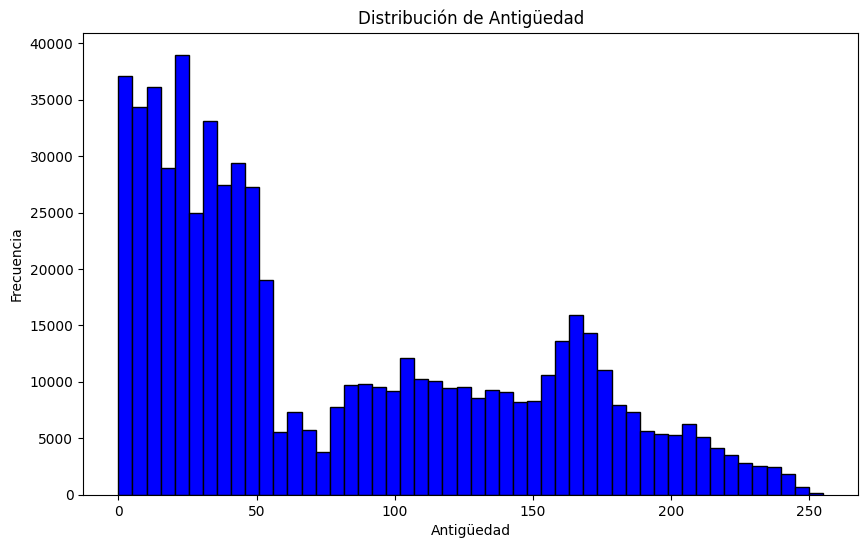

In [ ]:
# Crear un histograma para la columna 'num_antiguedad'
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño a tu preferencia

# Dibujar el histograma
plt.hist(data_prepro['num_antiguedad'].dropna(), bins=50, color='blue', edgecolor='black')  # Puedes cambiar el número de bins según necesites

# Añadir títulos y etiquetas
plt.title('Distribución de Antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Hay más clientes con poca antigüedad, lo cual concuerda con el diagrama de la variable `fecha1`, habiendo un pico de nuevos contratos en 1982.

### Análisis de la variable xti_rel

In [ ]:
# Contar las ocurrencias de cada valor entero
conteo_xti_rel = data_prepro['xti_rel'].value_counts(dropna=False)  # Puedes usar dropna=True para excluir NaNs del conteo
print(conteo_xti_rel)

xti_rel
1.0     626892
99.0        36
Name: count, dtype: int64


In [ ]:
data_prepro.drop(['xti_rel'], axis=1, inplace=True)

In [ ]:
data_prepro.head()

cod_persona         mes sexo  edad      fecha1  xti_nuevo_cliente  \
634681      256280  2016-04-28    F  23.0  2014-08-18                0.0   
603505     1294986  2016-04-28    M  91.0  2001-07-03                0.0   
603503     1294996  2016-04-28    M  74.0  2001-07-03                0.0   
603502     1295022  2016-04-28    F  66.0  2002-11-21                0.0   
603501     1295110  2016-04-28    M  68.0  2001-07-02                0.0   

        num_antiguedad  xti_rel_1mes tip_rel_1mes indresi indext des_canal  \
634681              20           1.0            A       S      N       KFC   
603505             177           1.0            I       S      N       KFC   
603503             177           1.0            I       S      N       KAT   
603502             161           1.0            I       S      N       KAI   
603501             178           1.0            A       S      N       KAT   

       xti_extra  cod_provincia  xti_actividad_cliente  imp_renta  \
634681         N           21.0                    1.0   71878.92   
603505         N           28.0                    0.0   52420.23   
603503         N            8.0                    0.0  197969.25   
603502         N           48.0                    0.0   92961.33   
603501         N           28.0                    0.0  144682.47   

              id_segmento  mean_engagement  ind_prod1  ind_prod3  ind_prod4  \
634681  02 - PARTICULARES         5.014352          0          1          0   
603505  02 - PARTICULARES         9.757912          0          0          0   
603503  02 - PARTICULARES         8.820845          0          1          0   
603502  02 - PARTICULARES         8.342559          0          0          0   
603501  02 - PARTICULARES         8.464731          0          0          0   

        ind_prod5  ind_prod6  ind_prod7  ind_prod8  ind_prod9  ind_prod10  \
634681          0          0          0          0          0           0   
603505          0          0          0          0          0           0   
603503          0          0          0          0          0           0   
603502          0          0          0          0          0           0   
603501          0          0          0          0          0           0   

        ind_prod11  ind_prod12  ind_prod13  ind_prod14  ind_prod15  \
634681           0           0           0           0           0   
603505           0           0           0           0           0   
603503           0           0           0           0           0   
603502           0           0           0           0           0   
603501           0           0           0           0           0   

        ind_prod16  ind_prod17  ind_prod18  ind_prod19  ind_prod20  \
634681           0           0           0           0           0   
603505           0           0           0           0           0   
603503           0           0           0           0           0   
603502           0           0           0           0           0   
603501           0           0           0           0           0   

        ind_prod21  ind_prod22  ind_prod23  ind_prod24  ind_prod25  
634681           0         0.0         0.0           0           0  
603505           0         0.0         0.0           0           0  
603503           0         0.0         0.0           0           0  
603502           0         0.0         0.0           0           0  
603501           0         0.0         0.0           0           0

### Análisis de la variable 'xti_rel_1mes'

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'xti_rel_1mes'
# month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
conteo_xti_rel_1mes = data_prepro['xti_rel_1mes'].value_counts(dropna=False)/data_prepro.shape[0]
pd.set_option('display.max_rows', None)
conteo_xti_rel_1mes

xti_rel_1mes
1.0    0.999580
3.0    0.000252
2.0    0.000085
0.0    0.000062
4.0    0.000021
Name: count, dtype: float64

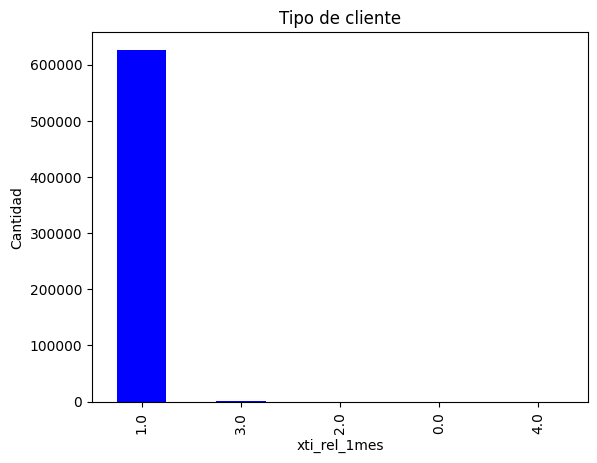

In [ ]:
# Gráfico barras variable 'xti_rel_1mes'
data_prepro['xti_rel_1mes'].value_counts().plot(kind='bar', color='blue')
plt.title('Tipo de cliente')
plt.ylabel('Cantidad')
plt.show()

A principios de mes casi todos los clientes son de tipo 1 (First/Primary customer).

In [ ]:
data_prepro.drop(['xti_rel_1mes'], axis=1, inplace=True)

### Análisis de la variable 'tip_rel_1mes'

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'tip_rel_1mes'
conteo_tip_rel_1mes = data_prepro['tip_rel_1mes'].value_counts(dropna=False)
pd.set_option('display.max_rows', None)
conteo_tip_rel_1mes

tip_rel_1mes
I    343339
A    283379
P       171
R        39
Name: count, dtype: int64

In [ ]:
# Filtramos las filas donde 'tip_rel_1mes' es igual a 'I'
filtered_data = data_prepro[data_prepro['tip_rel_1mes'] == 'I']

# Seleccionamos las columnas que comienzan con 'ind_prod'
prod_columns = [col for col in filtered_data.columns if col.startswith('ind_prod')]

# Calculamos la suma por columnas de estas variables seleccionadas
column_sums = filtered_data[prod_columns].sum()
column_sums


ind_prod1         64.0
ind_prod3     215471.0
ind_prod4          0.0
ind_prod5        589.0
ind_prod6        191.0
ind_prod7       1724.0
ind_prod8      28166.0
ind_prod9       5399.0
ind_prod10        54.0
ind_prod11         4.0
ind_prod12       117.0
ind_prod13      3527.0
ind_prod14         2.0
ind_prod15         2.0
ind_prod16         4.0
ind_prod17         7.0
ind_prod18      4483.0
ind_prod19        89.0
ind_prod20        11.0
ind_prod21       719.0
ind_prod22       276.0
ind_prod23       323.0
ind_prod24      1321.0
ind_prod25       100.0
dtype: float64

Los clientes inactivos, sí tienen servicios contratados.

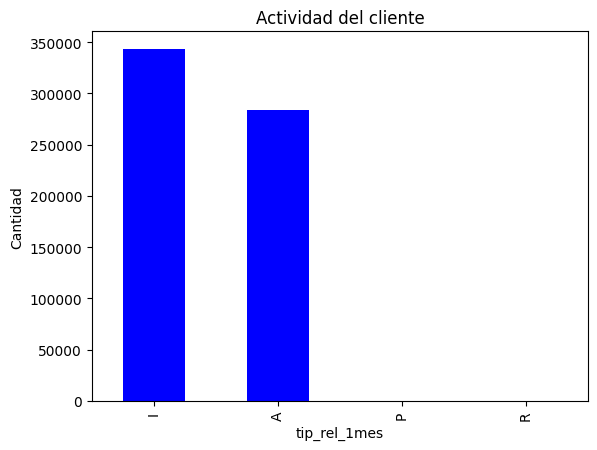

In [ ]:
# Gráfico barras variable 'tip_rel_1mes'
data_prepro['tip_rel_1mes'].value_counts().plot(kind='bar', color='blue')
plt.title('Actividad del cliente')
plt.ylabel('Cantidad')
plt.show()

### Análisis de la variable 'indext'

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'indext'
conteo_indext = data_prepro['indext'].value_counts(dropna=False)
pd.set_option('display.max_rows', None)
conteo_indext

indext
N    596535
S     30393
Name: count, dtype: int64

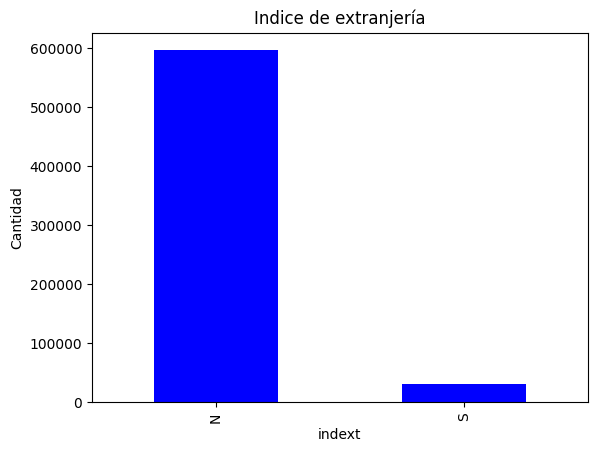

In [ ]:
# Gráfico barras variable 'tip_rel_1mes'
data_prepro['indext'].value_counts().plot(kind='bar', color='blue')
plt.title('Indice de extranjería')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'xti_extra'
conteo_xti_extra = data_prepro['xti_extra'].value_counts(dropna=False)/data_prepro.shape[0]
pd.set_option('display.max_rows', None)
conteo_xti_extra

xti_extra
N    0.997754
S    0.002246
Name: count, dtype: float64

### Análisis de la variable 'xti_extra'

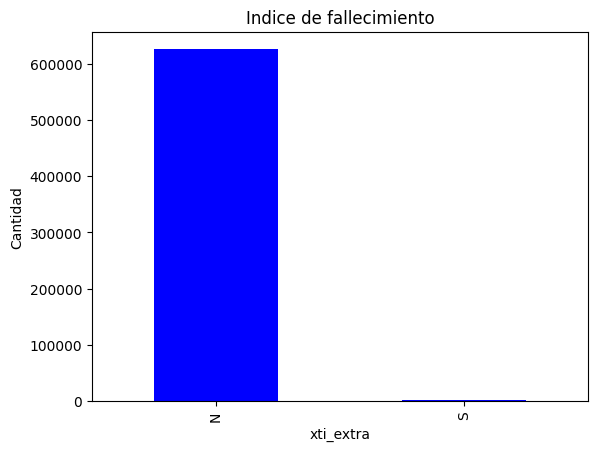

In [ ]:
# Gráfico barras variable 'xti_extra'
data_prepro['xti_extra'].value_counts().plot(kind='bar', color='blue')
plt.title('Indice de fallecimiento')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
conteo_xti_extra = data_prepro['xti_extra'].value_counts(dropna=False)/data_prepro.shape[0]
pd.set_option('display.max_rows', None)
conteo_xti_extra

xti_extra
N    0.997754
S    0.002246
Name: count, dtype: float64

In [ ]:
data_prepro.drop(['xti_extra'], axis=1, inplace=True)

### Análisis de la variable 'cod_provincia'

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'cod_provincia'
conteo_cod_provincia = data_prepro['cod_provincia'].value_counts(dropna=False)
pd.set_option('display.max_rows', None)
conteo_cod_provincia

cod_provincia
28.0    205586
8.0      59862
46.0     31852
41.0     28019
15.0     19001
30.0     18325
29.0     16809
50.0     16302
3.0      14060
36.0     12753
11.0     12690
33.0     12317
47.0     10849
35.0     10569
6.0       9048
18.0      8708
45.0      8601
48.0      8402
37.0      7478
39.0      7286
14.0      6881
21.0      6154
10.0      6067
7.0       5576
13.0      5336
2.0       5166
12.0      5136
43.0      4663
24.0      4289
9.0       4084
31.0      4050
17.0      4020
27.0      3893
26.0      3747
25.0      3726
32.0      3441
38.0      3187
20.0      3102
19.0      2983
16.0      2803
4.0       2740
23.0      2689
34.0      2281
49.0      2280
5.0       2025
40.0      2002
1.0       1827
22.0      1811
44.0       993
42.0       739
52.0       401
51.0       319
Name: count, dtype: int64

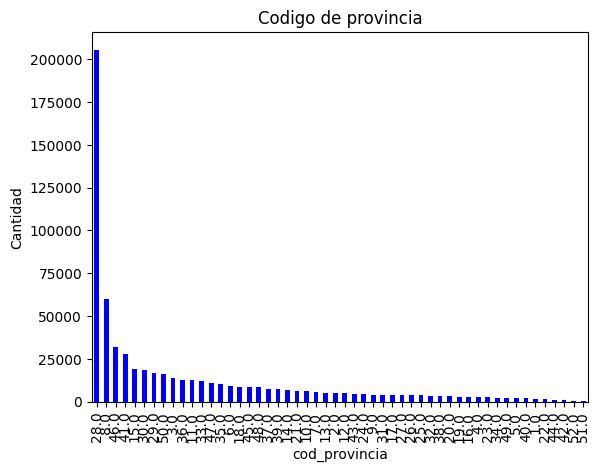

In [ ]:
# Gráfico barras variable 'cod_provincia'
data_prepro['cod_provincia'].value_counts().plot(kind='bar', color='blue')
plt.title('Codigo de provincia')
plt.ylabel('Cantidad')
plt.show()

### Análisis de la variable 'xti_actividad_cliente'

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'xti_actividad_cliente'
conteo_xti_actividad_cliente = data_prepro['xti_actividad_cliente'].value_counts(dropna=False)
pd.set_option('display.max_rows', None)
conteo_xti_actividad_cliente

xti_actividad_cliente
0.0    340293
1.0    286635
Name: count, dtype: int64

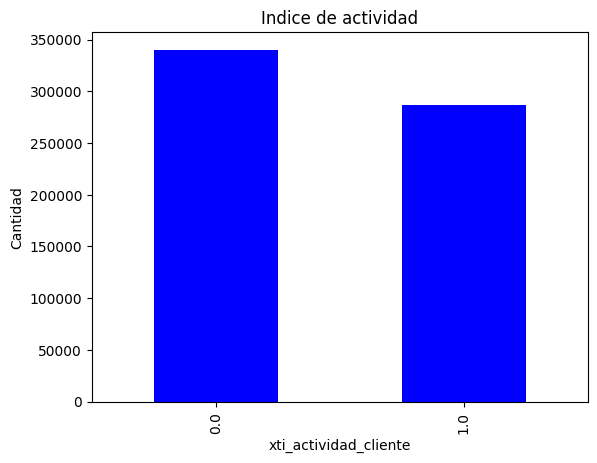

In [ ]:
# Gráfico barras variable 'xti_actividad_cliente'
data_prepro['xti_actividad_cliente'].value_counts().plot(kind='bar', color='blue')
plt.title('Indice de actividad')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Filtramos las filas donde 'tip_rel_1mes' es igual a 'I'
filtered_data = data_prepro[data_prepro['xti_actividad_cliente'] == 0]

# Seleccionamos las columnas que comienzan con 'ind_prod'
prod_columns = [col for col in filtered_data.columns if col.startswith('ind_prod')]

# Calculamos la suma por columnas de estas variables seleccionadas
column_sums = filtered_data[prod_columns].sum()
column_sums

ind_prod1         64.0
ind_prod3     202389.0
ind_prod4         16.0
ind_prod5        590.0
ind_prod6        179.0
ind_prod7       1561.0
ind_prod8      26351.0
ind_prod9       4524.0
ind_prod10       119.0
ind_prod11         7.0
ind_prod12       125.0
ind_prod13      3264.0
ind_prod14        70.0
ind_prod15        18.0
ind_prod16        17.0
ind_prod17       317.0
ind_prod18      2158.0
ind_prod19       122.0
ind_prod20       198.0
ind_prod21       584.0
ind_prod22       113.0
ind_prod23       135.0
ind_prod24       556.0
ind_prod25       319.0
dtype: float64

De nuevo los clientes inactivos sí tienen productos contratados

### Análisis de la variable 'imp_renta'

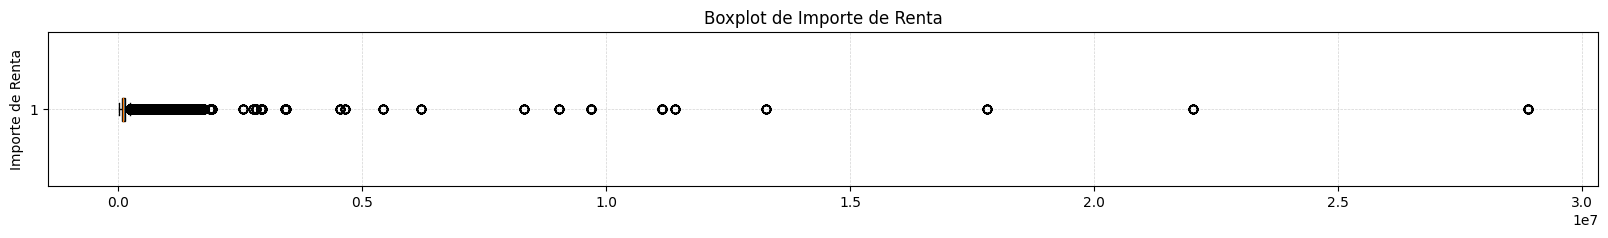

In [ ]:
# Dibujar el boxplot para la columna 'imp_renta'
plt.figure(figsize=(20, 2))  # Puedes ajustar el tamaño según tus preferencias
plt.boxplot(data_prepro['imp_renta'], vert=False, patch_artist=True)  # vert=True para vertical

# Añadir títulos y etiquetas
plt.title('Boxplot de Importe de Renta')
plt.ylabel('Importe de Renta')

# Mostrar las líneas de la cuadrícula
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()

In [ ]:
descripcion_imp_renta = data_prepro['imp_renta'].describe()
descripcion_imp_renta

count    6.269280e+05
mean     1.288340e+05
std      3.015050e+05
min      5.925540e+03
25%      6.958665e+04
50%      9.687505e+04
75%      1.403885e+05
max      2.889440e+07
Name: imp_renta, dtype: float64

Observamos los valores entre los que se encuentra la variable y contemplamos la posibilidad de eliminar outliers.

In [ ]:
q1 = data_prepro['imp_renta'].quantile(0.25)
q3 = data_prepro['imp_renta'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 3* iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound,upper_bound)

-142819.02000000005 246591.37500000003


In [ ]:
data_prepro[data_prepro['imp_renta']<= 0].shape

(0, 40)

Eliminamos los valores de `imp_renta` que son superiores al upper_bound.

In [ ]:
data_sin_outliers = data_prepro[(data_prepro[column] <= upper_bound)]
data_sin_outliers.shape

(626928, 40)

Decidimos no eliminar outliers, posteriormente se categoriza la variable en sus cuartiles.

### Análisis de la variable 'id_segmento'

In [ ]:
# Contar las ocurrencias de cada valor en la columna 'id_segmento'
conteo_id_segmento = data_prepro['id_segmento'].value_counts(dropna=False)
pd.set_option('display.max_rows', None)
conteo_id_segmento

id_segmento
02 - PARTICULARES     369607
03 - UNIVERSITARIO    230740
01 - TOP               26581
Name: count, dtype: int64

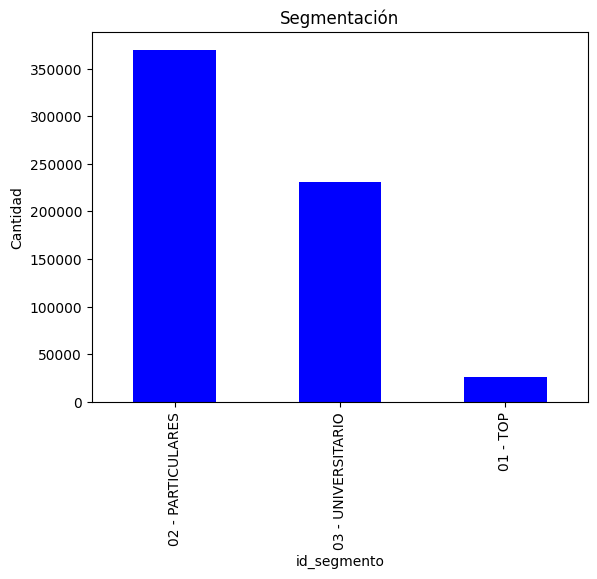

In [ ]:
# Gráfico barras variable 'id_segmento'
data_prepro['id_segmento'].value_counts().plot(kind='bar', color='blue')
plt.title('Segmentación')
plt.ylabel('Cantidad')
plt.show()

### Análisis de la variable 'mean_engagement'

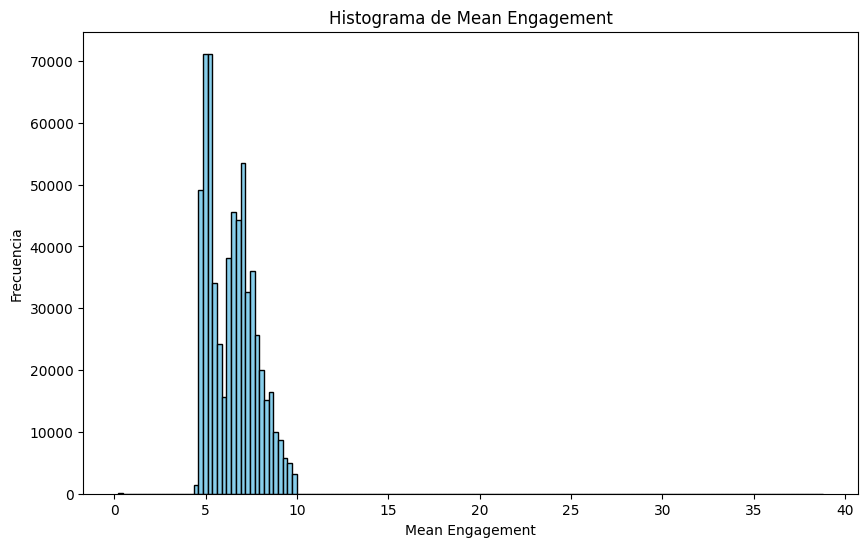

In [ ]:
# Crear un histograma para la columna 'mean_engagement'
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño según tus preferencias
plt.hist(data_prepro['mean_engagement'].dropna(), bins=150, color='skyblue', edgecolor='black')  # Ajusta el número de bins si es necesario

# Añadir título y etiquetas
plt.title('Histograma de Mean Engagement')
plt.xlabel('Mean Engagement')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

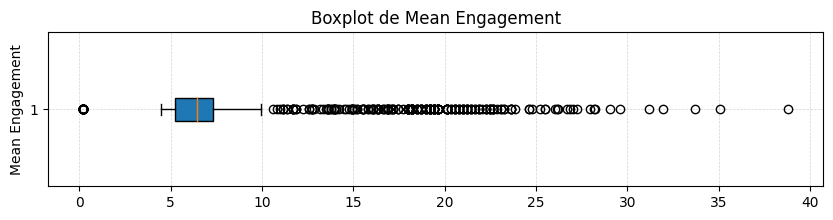

In [ ]:
plt.figure(figsize=(10, 2))  # Ajusta el tamaño a tu preferencia
plt.boxplot(data_prepro['mean_engagement'], vert=False, patch_artist=True, showfliers=True)  # showfliers=False para ocultar outliers

# Añadir títulos y etiquetas
plt.title('Boxplot de Mean Engagement')
plt.ylabel('Mean Engagement')

# Mostrar las líneas de la cuadrícula
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()

### Análisis de la variable 'des_canal'

In [ ]:
data_prepro['des_canal'].head()

634681    KFC
603505    KFC
603503    KAT
603502    KAI
603501    KAT
Name: des_canal, dtype: object

In [ ]:
data_prepro['des_canal'].nunique()

126

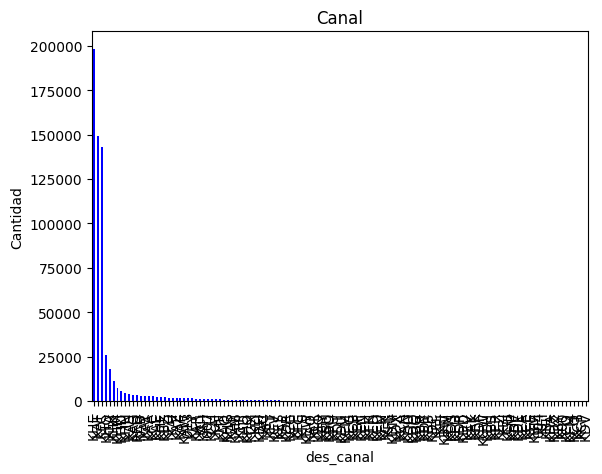

In [ ]:
data_prepro['des_canal'].value_counts().plot(kind='bar', color='blue')
plt.title('Canal')
plt.ylabel('Cantidad')
plt.show()

### Análisis mensual de productos contratados

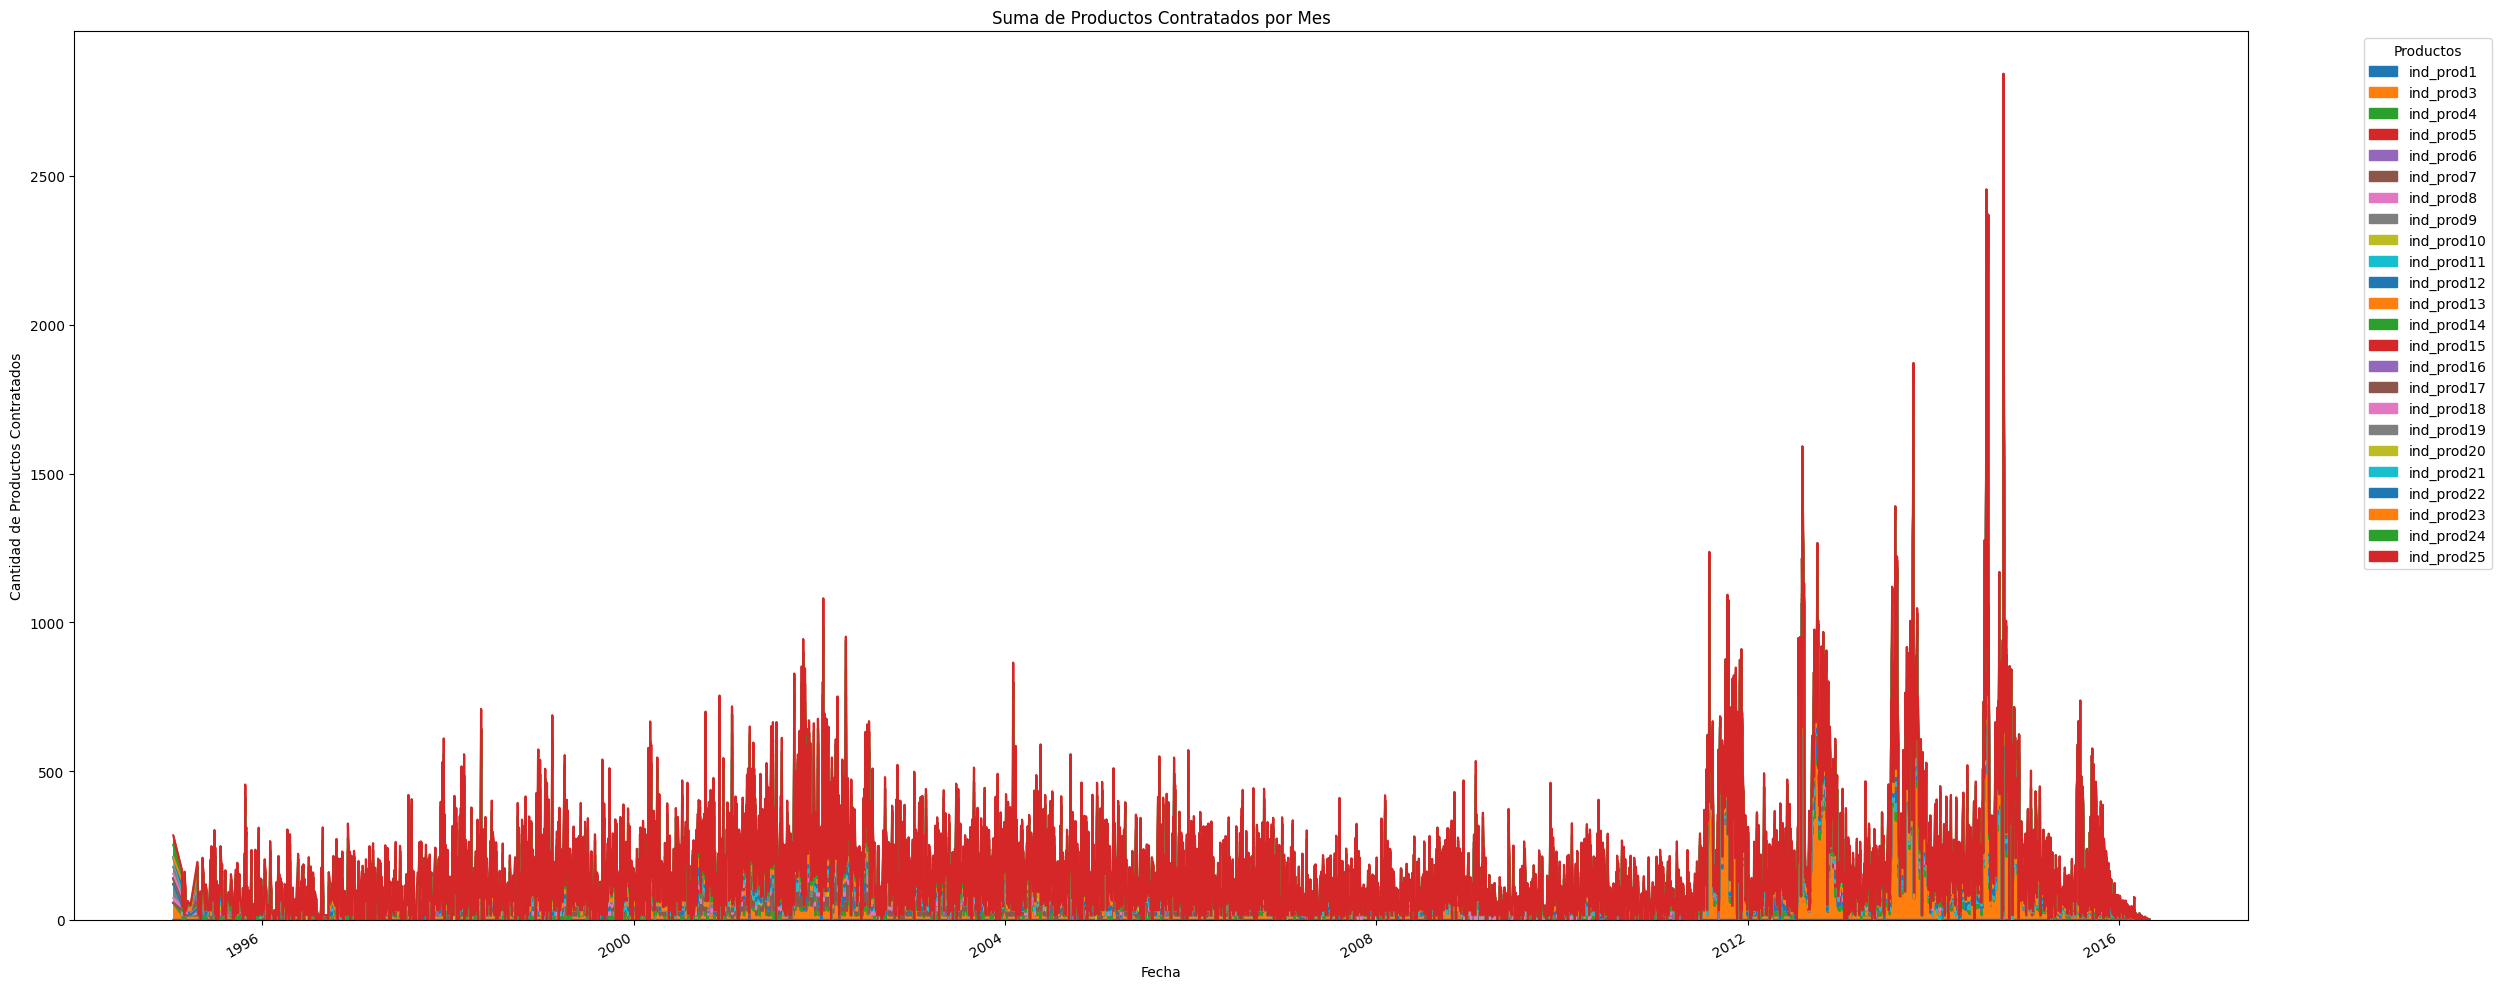

In [ ]:
data_prepro['fecha1'] = pd.to_datetime(data_prepro['fecha1'])

# Lista de columnas de productos, omitiendo 'ind_prod2'
product_columns = [f'ind_prod{i}' for i in range(1, 26) if i != 2]  # Genera los nombres de 'ind_prod1' a 'ind_prod25' excepto 'ind_prod2'

# Agrupar por 'fecha1' y sumar los productos
aggregated_data = data_prepro.groupby('fecha1')[product_columns].sum()

# Graficar
aggregated_data.plot(kind='area', stacked=True, figsize=(25, 10))  # figsize ajustado para mejor visualización
plt.title('Suma de Productos Contratados por Mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Contratados')
plt.legend(title='Productos', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.tight_layout()  # Ajusta la disposición para no cortar elementos importantes
plt.show()

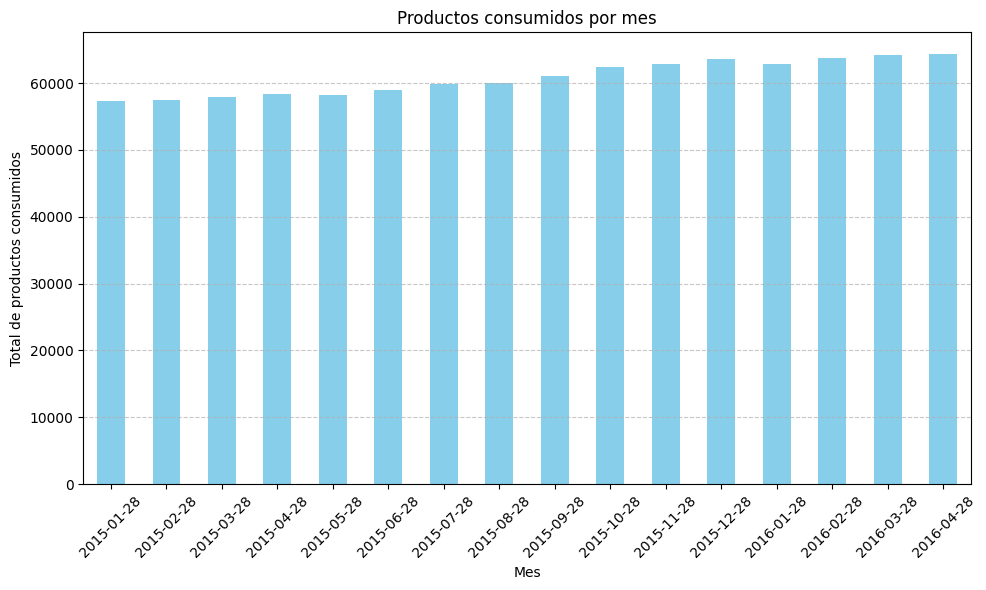

In [ ]:
productos_por_mes = data_prepro.groupby('mes')[product_columns].sum().sum(axis=1)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
productos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Productos consumidos por mes')
plt.xlabel('Mes')
plt.ylabel('Total de productos consumidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
columnas_productos = [col for col in data_prepro.columns if col.startswith('ind_prod')]
columnas = ['mes'] + columnas_productos
tabla_productos_por_mes = data_prepro[columnas].groupby('mes').sum()
tabla_productos_por_mes


ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  ind_prod7  \
mes                                                                            
2015-01-28          4      24170         17       2934         65        415   
2015-02-28          4      24247         19       2995         64        407   
2015-03-28          4      24334         20       3051         63        383   
2015-04-28          4      24345         19       3111         62        362   
2015-05-28          4      24406         19       3174         61        348   
2015-06-28          4      24663         18       2990         58        348   
2015-07-28          4      25158         18       3103         57        340   
2015-08-28          4      25672         18       3166         59        352   
2015-09-28          4      26443         18       3204         58        354   
2015-10-28          4      27288         19       3278         58        367   
2015-11-28          4      27586         19       3391         56        394   
2015-12-28          4      27893         21       3352         56        408   
2016-01-28          4      28023         20       3417         59        406   
2016-02-28          4      28062         18       3482         60        426   
2016-03-28          4      28167         18       3561         63        452   
2016-04-28          4      28223         17       3642         67        453   

            ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
mes                                                                    
2015-01-28       5300       1779          72          96        1791   
2015-02-28       5279       1767         101          95        1775   
2015-03-28       5274       1764         127          89        1763   
2015-04-28       5251       1760         140          86        1743   
2015-05-28       5230       1758         110          85        1753   
2015-06-28       5223       1749          90          83        1765   
2015-07-28       5207       1740          86          75        1749   
2015-08-28       5199       1730         100          72        1741   
2015-09-28       5182       1723         103          74        1732   
2015-10-28       5171       1714         105          72        1736   
2015-11-28       5150       1696          84          71        1705   
2015-12-28       5133       1691          57          67        1720   
2016-01-28       5116       1685          36          66        1676   
2016-02-28       5106       1684          26          62        1665   
2016-03-28       5086       1672          25          57        1630   
2016-04-28       5079       1666          24          55        1587   

            ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  \
mes                                                                      
2015-01-28        3004         687         223         369         111   
2015-02-28        3049         699         221         369         111   
2015-03-28        3084         712         219         368         111   
2015-04-28        3119         741         219         368         110   
2015-05-28        3161         757         208         367         111   
2015-06-28        3194         754         208         367         108   
2015-07-28        3220         754         208         368         108   
2015-08-28        3237         752         208         367         108   
2015-09-28        3254         752         208         366         108   
2015-10-28        3272         753         208         366         107   
2015-11-28        3323         751         207         365         106   
2015-12-28        3396         759         206         366         105   
2016-01-28        3490         755         203         367         106   
2016-02-28        3576         744         202         367         105   
2016-03-28        3639         741         201         369         105   
2016-04-28      

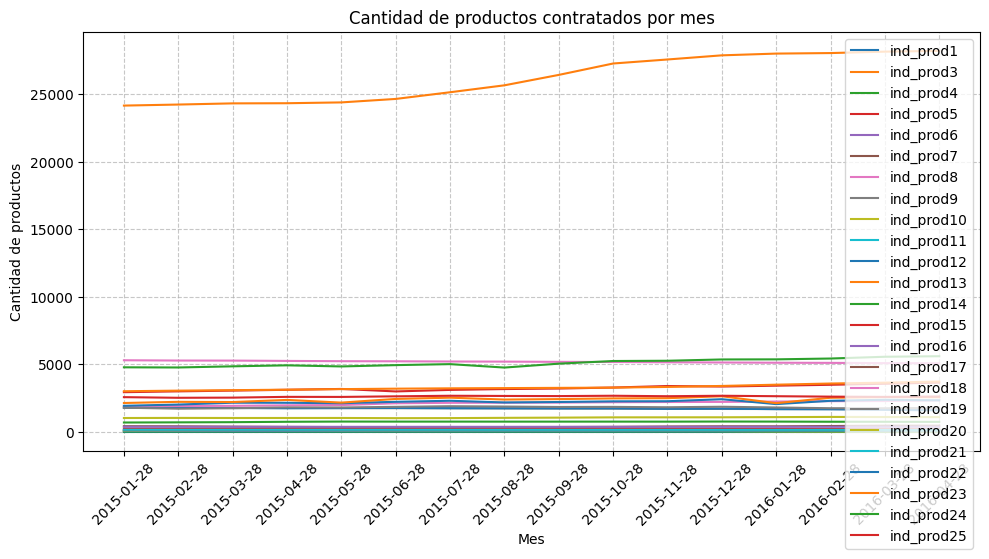

In [ ]:
plt.figure(figsize=(10, 6))
for col in tabla_productos_por_mes.columns:
    plt.plot(tabla_productos_por_mes.index, tabla_productos_por_mes[col], label=col)

plt.title('Cantidad de productos contratados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se observa que hay un producto que es contratado por muchos más clientes que el resto.

# **Análisis estadístico**

## Conversión de variables de tiempo

In [ ]:
data_prepro['mes'] = pd.to_datetime(data_prepro['mes'])
data_prepro['fecha1'] = pd.to_datetime(data_prepro['fecha1'])


In [ ]:
data_prepro.dtypes

cod_persona                      object
mes                      datetime64[ns]
sexo                             object
edad                            float64
fecha1                   datetime64[ns]
xti_nuevo_cliente               float64
num_antiguedad                    int64
tip_rel_1mes                     object
indresi                          object
indext                           object
des_canal                        object
cod_provincia                   float64
xti_actividad_cliente           float64
imp_renta                       float64
id_segmento                      object
mean_engagement                 float64
ind_prod1                         int64
ind_prod3                         int64
ind_prod4                         int64
ind_prod5                         int64
ind_prod6                         int64
ind_prod7                         int64
ind_prod8                         int64
ind_prod9                         int64
ind_prod10                        int64


In [ ]:
variables_num = data_prepro[['edad', 'num_antiguedad', 'imp_renta', 'mean_engagement']]
index = data_prepro['cod_persona']
variables_date = data_prepro.select_dtypes(include=['datetime'])
col_no_cat = list(variables_num.columns) + list(variables_date.columns) + ['cod_persona']
variables_cat = data_prepro.drop(col_no_cat, axis =1)

In [ ]:
variables_num.head()

edad  num_antiguedad  imp_renta  mean_engagement
634681  23.0              20   71878.92         5.014352
603505  91.0             177   52420.23         9.757912
603503  74.0             177  197969.25         8.820845
603502  66.0             161   92961.33         8.342559
603501  68.0             178  144682.47         8.464731

In [ ]:
variables_cat.head()

sexo  xti_nuevo_cliente tip_rel_1mes indresi indext des_canal  \
634681    F                0.0            A       S      N       KFC   
603505    M                0.0            I       S      N       KFC   
603503    M                0.0            I       S      N       KAT   
603502    F                0.0            I       S      N       KAI   
603501    M                0.0            A       S      N       KAT   

        cod_provincia  xti_actividad_cliente        id_segmento  ind_prod1  \
634681           21.0                    1.0  02 - PARTICULARES          0   
603505           28.0                    0.0  02 - PARTICULARES          0   
603503            8.0                    0.0  02 - PARTICULARES          0   
603502           48.0                    0.0  02 - PARTICULARES          0   
603501           28.0                    0.0  02 - PARTICULARES          0   

        ind_prod3  ind_prod4  ind_prod5  ind_prod6  ind_prod7  ind_prod8  \
634681          1          0          0          0          0          0   
603505          0          0          0          0          0          0   
603503          1          0          0          0          0          0   
603502          0          0          0          0          0          0   
603501          0          0          0          0          0          0   

        ind_prod9  ind_prod10  ind_prod11  ind_prod12  ind_prod13  ind_prod14  \
634681          0           0           0           0           0           0   
603505          0           0           0           0           0           0   
603503          0           0           0           0           0           0   
603502          0           0           0           0           0           0   
603501          0           0           0           0           0           0   

        ind_prod15  ind_prod16  ind_prod17  ind_prod18  ind_prod19  \
634681           0           0           0           0           0   
603505           0           0           0           0           0   
603503           0           0           0           0           0   
603502           0           0           0           0           0   
603501           0           0           0           0           0   

        ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  ind_prod25  
634681           0           0         0.0         0.0           0           0  
603505           0           0         0.0         0.0           0           0  
603503           0           0         0.0         0.0           0           0  
603502           0           0         0.0         0.0           0           0  
603501           0           0         0.0         0.0           0           0

## *Análisis de las variables numéricas*

In [ ]:
variables_num.describe()

edad  num_antiguedad     imp_renta  mean_engagement
count  626928.000000   626928.000000  6.269280e+05    626928.000000
mean       40.224740       79.167822  1.288340e+05         6.441443
std        16.815244       66.404134  3.015050e+05         1.305809
min        18.000000        0.000000  5.925540e+03         0.218520
25%        24.000000       23.000000  6.958665e+04         5.218520
50%        39.000000       50.000000  9.687505e+04         6.463518
75%        50.000000      135.000000  1.403885e+05         7.289588
max        95.000000      255.000000  2.889440e+07        38.793123

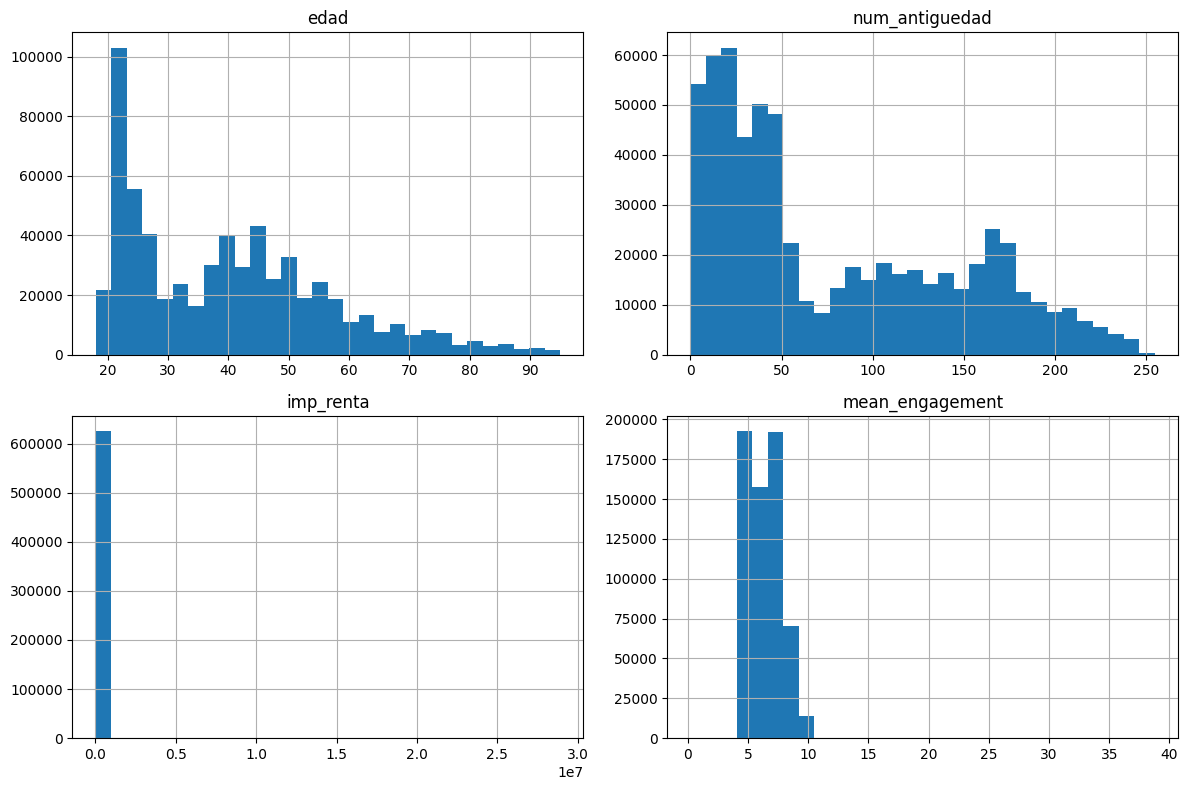

In [ ]:
variables_num.hist(figsize=(12,8),bins=30)
plt.tight_layout()

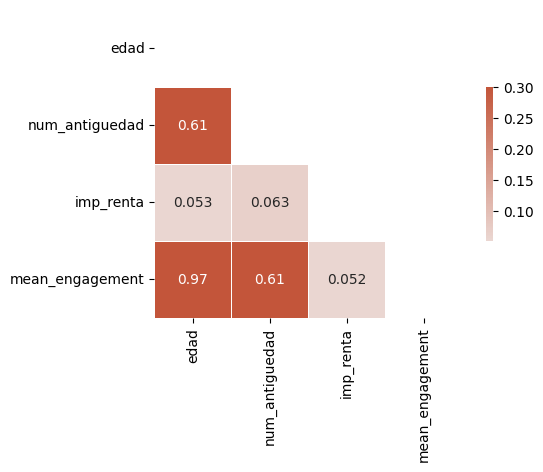

In [ ]:
# Obtenemos la matriz de correlaciones
corr = variables_num.corr()
# Generamos un artificio para hacer ceros por encima de la diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configuración del gráfico
f, ax = plt.subplots(figsize=(6, 4))
# Paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# gráfico de intensidad
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

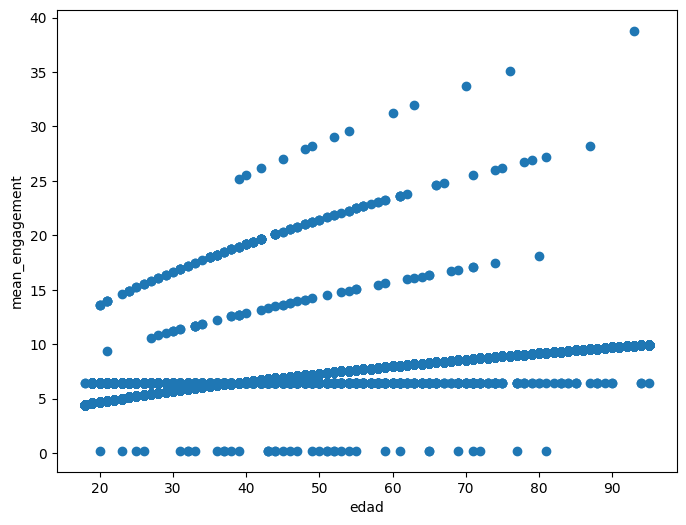

In [ ]:
# Creamos el gráfico de disersión correspondiente
f, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x= 'edad', y='mean_engagement', data = variables_num)
ax.set(ylabel='mean_engagement')
ax.set(xlabel='edad')
plt.show()

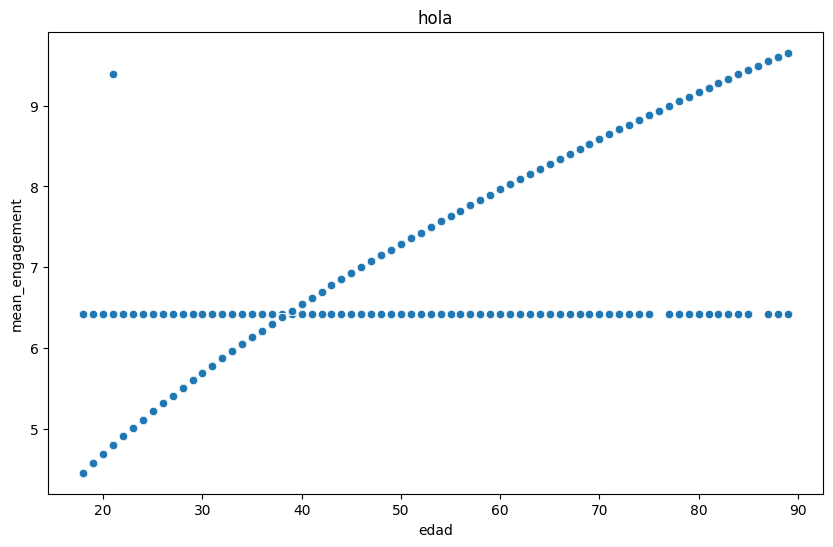

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def plot_num_num_relationship_no_outliers(df, col1, col2, title):
    df_no_outliers = remove_outliers(df, col1)
    df_no_outliers = remove_outliers(df_no_outliers, col2)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_no_outliers, x=col1, y=col2)
    plt.title(title)
    plt.show()

plot_num_num_relationship_no_outliers(variables_num, 'edad', 'mean_engagement', 'hola')

# # Filtrar los datos para eliminar los outliers
# var_num2 = variables_num.copy()
# var_num2['mean_engagement'] = quitar_outliersIQR(variables_num['mean_engagement'])
# var_num2['edad'] = quitar_outliersIQR(variables_num['edad'])

# f, ax = plt.subplots(figsize=(8, 6))

# ax.scatter(x= 'edad', y='mean_engagement', data = var_num2)
# ax.set(ylabel='mean_engagement')
# ax.set(xlabel='edad')
# plt.show()

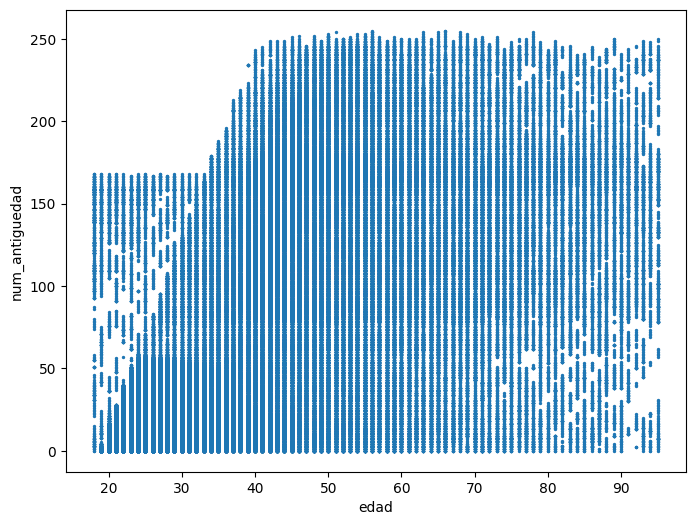

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x= 'edad', y='num_antiguedad', data = variables_num,s=2)
ax.set(ylabel='num_antiguedad')
ax.set(xlabel='edad')
plt.show()

Ver este gráfico porque no tiene sentido que una persona de 20 años tenga 150 meses de antiguedad

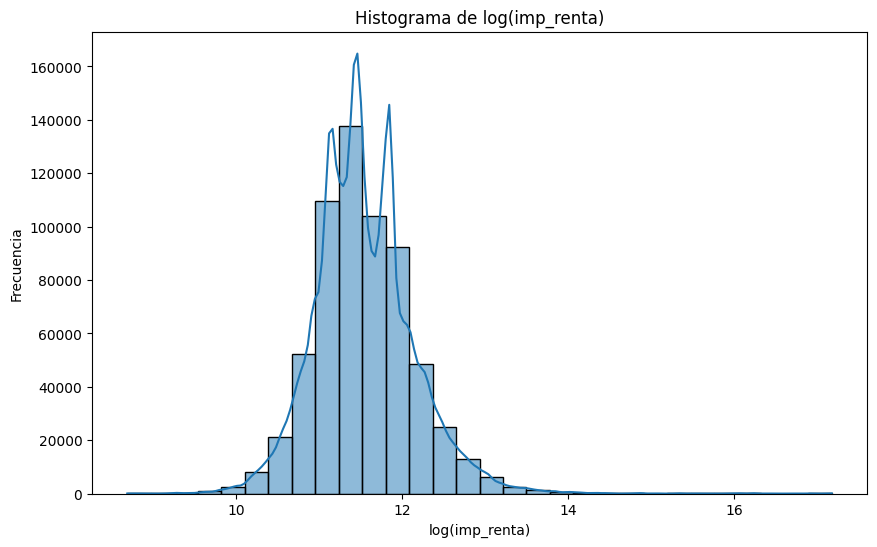

In [ ]:
# Normalización imp_renta
data_prepro['imp_renta'] = pd.to_numeric(data_prepro['imp_renta'], errors='coerce')
data_prepro['log_imp_renta'] = np.log(data_prepro['imp_renta'] + 1)

# gráfico del histograma de 'log_imp_renta'
plt.figure(figsize=(10, 6))
sns.histplot(data_prepro['log_imp_renta'], bins=30, kde=True)
plt.title('Histograma de log(imp_renta)')
plt.xlabel('log(imp_renta)')
plt.ylabel('Frecuencia')
plt.show()

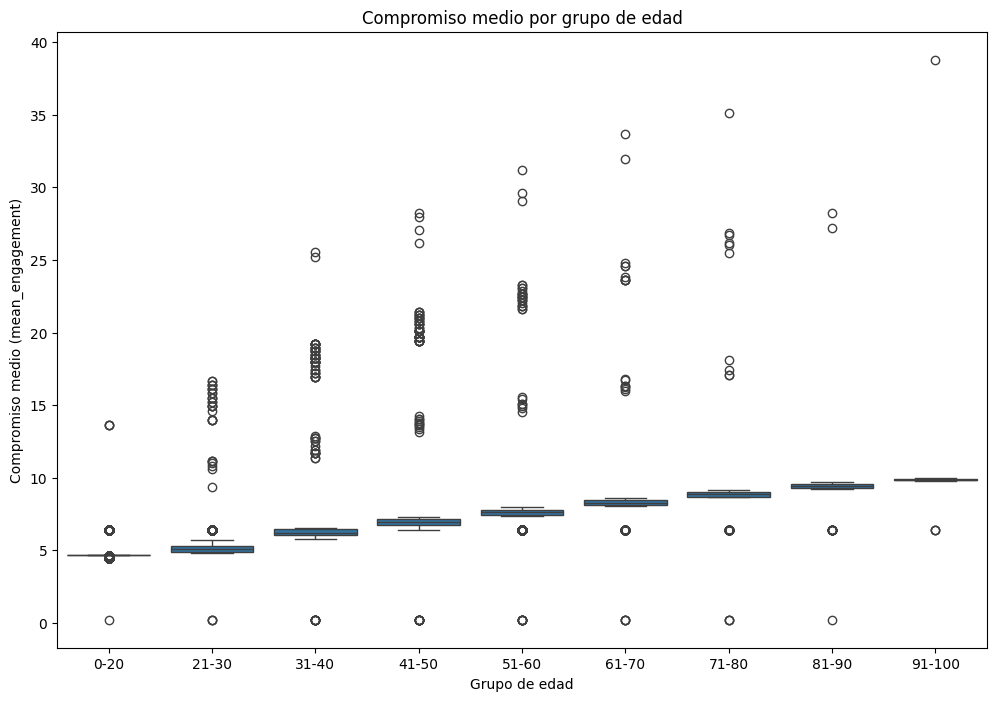

In [ ]:
# categorías de edad
data_prepro['grupo_edad'] = pd.cut(data_prepro['edad'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                             labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Gráfico de cajas por grupo de edad para 'mean_engagement'
plt.figure(figsize=(12, 8))
sns.boxplot(x='grupo_edad', y='mean_engagement', data=data_prepro)
plt.title('Compromiso medio por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Compromiso medio (mean_engagement)')
plt.show()

In [ ]:
# Valores atípicos en 'imp_renta'

Q1_renta = data_prepro['imp_renta'].quantile(0.25)
Q3_renta = data_prepro['imp_renta'].quantile(0.75)
IQR_renta = Q3_renta - Q1_renta
outliers_renta = data_prepro[(data_prepro['imp_renta'] < (Q1_renta - 1.5 * IQR_renta)) | (data_prepro['imp_renta'] > (Q3_renta + 1.5 * IQR_renta))]
print('Número de valores atípicos en imp_renta:', outliers_renta.shape[0])

Número de valores atípicos en imp_renta: 44272


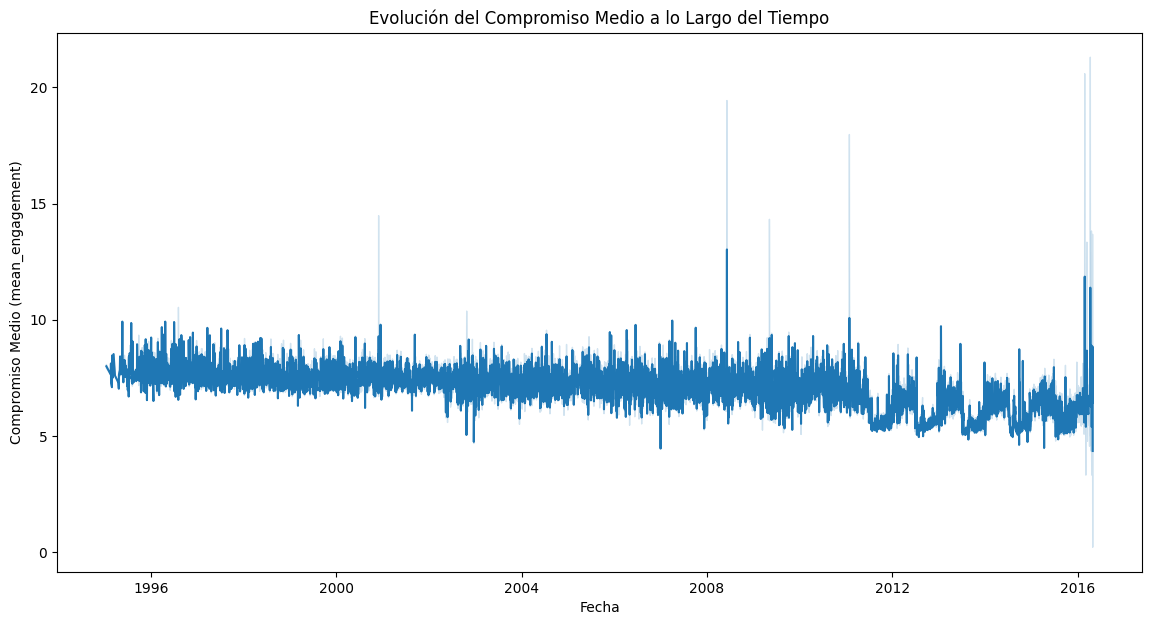

In [ ]:
data_prepro['fecha1'] = pd.to_datetime(data_prepro['fecha1'], errors='coerce')  # Convierte la columna a datetime, maneja los errores
data_prepro.sort_values('fecha1', inplace=True)

# Gráfico de la evolución de 'mean_engagement' a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(x='fecha1', y='mean_engagement', data=data_prepro)
plt.title('Evolución del Compromiso Medio a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Compromiso Medio (mean_engagement)')
plt.show()

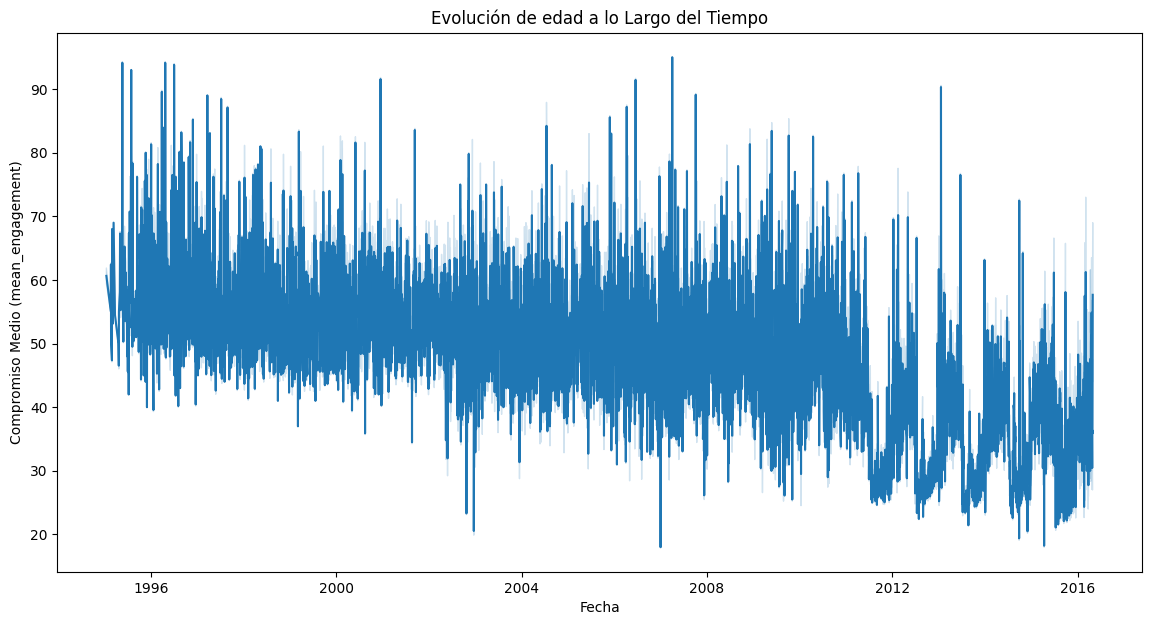

In [ ]:
data_prepro['fecha1'] = pd.to_datetime(data_prepro['fecha1'], errors='coerce')  # Convierte la columna a datetime, maneja los errores
data_prepro.sort_values('fecha1', inplace=True)

# Gráfico de la evolución de 'mean_engagement' a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(x='fecha1', y='edad', data=data_prepro)
plt.title('Evolución de edad a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Compromiso Medio (mean_engagement)')
plt.show()

In [ ]:
data_prepro.drop(['mean_engagement'], axis=1, inplace=True)

## *Análisis de las variables categóricas*

In [ ]:
variables_cat.head()

sexo  xti_nuevo_cliente tip_rel_1mes indresi indext des_canal  \
634681    F                0.0            A       S      N       KFC   
603505    M                0.0            I       S      N       KFC   
603503    M                0.0            I       S      N       KAT   
603502    F                0.0            I       S      N       KAI   
603501    M                0.0            A       S      N       KAT   

        cod_provincia  xti_actividad_cliente        id_segmento  ind_prod1  \
634681           21.0                    1.0  02 - PARTICULARES          0   
603505           28.0                    0.0  02 - PARTICULARES          0   
603503            8.0                    0.0  02 - PARTICULARES          0   
603502           48.0                    0.0  02 - PARTICULARES          0   
603501           28.0                    0.0  02 - PARTICULARES          0   

        ind_prod3  ind_prod4  ind_prod5  ind_prod6  ind_prod7  ind_prod8  \
634681          1          0          0          0          0          0   
603505          0          0          0          0          0          0   
603503          1          0          0          0          0          0   
603502          0          0          0          0          0          0   
603501          0          0          0          0          0          0   

        ind_prod9  ind_prod10  ind_prod11  ind_prod12  ind_prod13  ind_prod14  \
634681          0           0           0           0           0           0   
603505          0           0           0           0           0           0   
603503          0           0           0           0           0           0   
603502          0           0           0           0           0           0   
603501          0           0           0           0           0           0   

        ind_prod15  ind_prod16  ind_prod17  ind_prod18  ind_prod19  \
634681           0           0           0           0           0   
603505           0           0           0           0           0   
603503           0           0           0           0           0   
603502           0           0           0           0           0   
603501           0           0           0           0           0   

        ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  ind_prod25  
634681           0           0         0.0         0.0           0           0  
603505           0           0         0.0         0.0           0           0  
603503           0           0         0.0         0.0           0           0  
603502           0           0         0.0         0.0           0           0  
603501           0           0         0.0         0.0           0           0

### Análisis de frecuencia de productos

In [ ]:
ind_prod_columns = variables_cat.filter(like='ind_prod').columns
product_counts = variables_cat[ind_prod_columns].sum()
product_counts


ind_prod1         64.0
ind_prod3     418680.0
ind_prod4        298.0
ind_prod5      51851.0
ind_prod6        966.0
ind_prod7       6215.0
ind_prod8      82986.0
ind_prod9      27578.0
ind_prod10      1286.0
ind_prod11      1205.0
ind_prod12     27531.0
ind_prod13     52739.0
ind_prod14     11846.0
ind_prod15      3348.0
ind_prod16      5879.0
ind_prod17      1725.0
ind_prod18     33976.0
ind_prod19     28880.0
ind_prod20     16805.0
ind_prod21      2384.0
ind_prod22     35244.0
ind_prod23     38223.0
ind_prod24     81736.0
ind_prod25     41793.0
dtype: float64

## *Análisis de las variables temporales*

In [ ]:
variables_date.head()

mes     fecha1
634681 2016-04-28 2014-08-18
603505 2016-04-28 2001-07-03
603503 2016-04-28 2001-07-03
603502 2016-04-28 2002-11-21
603501 2016-04-28 2001-07-02

# Correlación y Feature engineering

Comenzamos a realizar el *feature engineering* para mejorar y enriquecer nuestro conjunto de datos. Creamos nuevas variables con el objetivo de aumentar la precisión de nuestro modelo.

## Categorización de `imp_renta`

Primero, vamos a discretizar la variable `imp_renta` transformándola en una variable categórica. Esta nueva variable está compuesta por categorías basadas en los cuartiles de los ingresos, por ello le asignamos las etiquetas `Q1`, `Q2`, `Q3` y `Q4`.

In [ ]:
# Discretizamos 'imp_renta' en cuartiles
data_prepro['categoria_ingresos'] = pd.qcut(data_prepro['imp_renta'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
data_prepro['categoria_ingresos'].head()

201993    Q4
145243    Q4
343280    Q4
92975     Q4
370229    Q4
Name: categoria_ingresos, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [ ]:
data_prepro = data_prepro.drop(['imp_renta', 'log_imp_renta'], axis = 1)

A continuación, creamos una nueva variable en la que se reflejará el total de productos contratados por un cliente.

## Variable `total_productos`

In [ ]:
# Seleccionamos las columnas que contienen 'ind_prod' en el nombre
ind_prod_columns = data_prepro.filter(like='ind_prod').columns

# Sumamos los valores de estas columnas
data_prepro['total_productos'] = data_prepro[ind_prod_columns].sum(axis=1)
data_prepro['total_productos'] = data_prepro['total_productos'].astype(int)


In [ ]:
data_prepro.head(10)

cod_persona        mes sexo  edad     fecha1  xti_nuevo_cliente  \
201993     1537800 2015-07-28    M  56.0 1995-01-16                0.0   
145243     1537693 2015-05-28    F  65.0 1995-01-16                0.0   
343280     1537717 2015-10-28    M  66.0 1995-01-16                0.0   
92975      1537800 2015-04-28    M  56.0 1995-01-16                0.0   
370229     1537800 2015-11-28    M  56.0 1995-01-16                0.0   
370257     1537717 2015-11-28    M  66.0 1995-01-16                0.0   
263797     1537693 2015-08-28    F  65.0 1995-01-16                0.0   
20663      1537693 2015-01-28    F  65.0 1995-01-16                0.0   
370258     1537720 2015-11-28    F  56.0 1995-01-16                0.0   
609644     1537800 2016-04-28    M  56.0 1995-01-16                0.0   

        num_antiguedad tip_rel_1mes indresi indext des_canal  cod_provincia  \
201993             245            A       S      N       KAT           28.0   
145243             246            A       S      N       KAT           28.0   
343280             249            A       S      N       KAT           28.0   
92975              245            A       S      N       KAT           28.0   
370229             249            A       S      N       KAT           28.0   
370257             250            A       S      N       KAT           28.0   
263797             247            A       S      N       KAT           28.0   
20663              246            A       S      N       KAT           28.0   
370258             250            A       S      N       KAT           28.0   
609644             254            A       S      N       KAT           28.0   

        xti_actividad_cliente        id_segmento  ind_prod1  ind_prod3  \
201993                    1.0           01 - TOP          0          1   
145243                    1.0           01 - TOP          0          1   
343280                    1.0  02 - PARTICULARES          0          1   
92975                     1.0           01 - TOP          0          1   
370229                    1.0           01 - TOP          0          1   
370257                    1.0  02 - PARTICULARES          0          1   
263797                    1.0           01 - TOP          0          1   
20663                     1.0           01 - TOP          0          1   
370258                    1.0  02 - PARTICULARES          0          1   
609644                    1.0           01 - TOP          0          1   

        ind_prod4  ind_prod5  ind_prod6  ind_prod7  ind_prod8  ind_prod9  \
201993          0          0          0          0          0          1   
145243          0          0          0          0          0          1   
343280          0          0          0          0          0          0   
92975           0          0          0          0          0          1   
370229          0          0          0          0          0          1   
370257          0          0          0          0          0          0   
263797          0          0          0          0          0          1   
20663           0          0          0          0          0          1   
370258          0          0          0          0          1          1   
609644          0          0          0          0          0          1   

        ind_prod10  ind_prod11  ind_prod12  ind_prod13  ind_prod14  \
201993           0           0           0           0           0   
145243           0           0           0           1           0   
343280           0           0           0           0           0   
92975            0           0           0           0           0   
370229           0           0           0           0           0   
370257           0           0           0           0           0   
263797           0           0           0           1           0   
20663            0           0           0           1           0   
370258           0           0          

In [ ]:
# Contar la frecuencia de cada total de productos contratados
conteo_total_productos = data_prepro['total_productos'].value_counts().sort_index(ascending=False)
conteo_total_productos

total_productos
14        22
13        72
12       269
11       540
10      1433
9       3344
8       5598
7       7608
6      10037
5      14632
4      22006
3      32646
2      86253
1     328510
0     113958
Name: count, dtype: int64

La distribución de la cantidad de productos contratados por los clientes muestra que el número máximo de productos contratados por un cliente es 14, pero tan  solo 22 clientes alcanzan esta cifra de productos. Por otro lado, la mayoría de los clientes tienen pocos productos contratados. Cabe destacar que hay 113958 clientes que no tienen ningún producto contratado. La frecuencia de clientes disminuye a medida que aumenta el número de productos contratados, mostrando una tendencia clara en la que la mayoría de los clientes prefieren contratar menos productos.

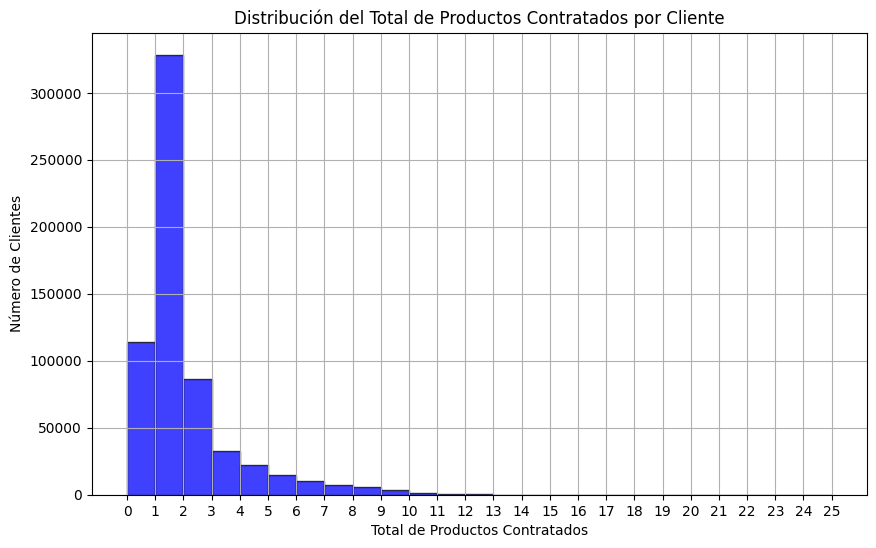

In [ ]:
# Crear un histograma para visualizar la distribución del total de productos contratados
plt.figure(figsize=(10, 6))
plt.hist(data_prepro['total_productos'], bins=range(0, 26), alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribución del Total de Productos Contratados por Cliente')
plt.xlabel('Total de Productos Contratados')
plt.ylabel('Número de Clientes')
plt.xticks(range(0, 26))
plt.grid(True)
plt.show()

 Creamos otra variable en la que se reflejará la antigüedad de un cliente contratando un producto.

## Lag Feature: Crear variables `producto_status`

- 1: Producto nuevo contratado

- 0: No hay cambios respecto al anterior mes

- -1: Fin del contrato de ese producto

In [ ]:
# convertir mes a timestamp
data_prepro['mes'] = pd.to_datetime(data_prepro['mes'].astype(str))

#ordenar
data_prepro = data_prepro.sort_values(by=['cod_persona', 'mes'])

# Crear una lista de las columnas de productos
productos = [f'ind_prod{i}' for i in range(1, 26)]
productos_disponibles = [producto for producto in productos if producto in data_prepro.columns]

# Inicializar nuevas columnas
for producto in productos_disponibles:
    data_prepro[f'{producto}_status'] = 0

# Calcular el estado del producto respecto al mes anterior
for producto in productos_disponibles:
    data_prepro[f'{producto}_status'] = data_prepro.groupby('cod_persona')[producto].diff().fillna(0)
    data_prepro[f'{producto}_status'] = data_prepro[f'{producto}_status'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))



In [ ]:
selected_columns = ['mes', 'cod_persona', 'num_antiguedad', 'fecha1'] + [col for col in data_prepro.columns if 'ind_prod' in col]

# Mostrar las primeras 500 filas (en este ejemplo, solo tenemos 5 filas)
result = data_prepro[selected_columns]
result.head(3)

mes cod_persona  num_antiguedad     fecha1  ind_prod1  \
311072 2015-09-28      100001               0 2015-09-18          0   
329903 2015-10-28      100001               1 2015-09-18          0   
374318 2015-11-28      100001               2 2015-09-18          0   

        ind_prod3  ind_prod4  ind_prod5  ind_prod6  ind_prod7  ind_prod8  \
311072          1          0          0          0          0          0   
329903          1          0          0          0          0          0   
374318          1          0          0          0          0          0   

        ind_prod9  ind_prod10  ind_prod11  ind_prod12  ind_prod13  ind_prod14  \
311072          0           0           0           0           0           0   
329903          0           0           0           0           0           0   
374318          0           0           0           0           0           0   

        ind_prod15  ind_prod16  ind_prod17  ind_prod18  ind_prod19  \
311072           0           0           0           0           0   
329903           0           0           0           0           0   
374318           0           0           0           0           0   

        ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  \
311072           0           0         0.0         0.0           0   
329903           0           0         0.0         0.0           0   
374318           0           0         0.0         0.0           0   

        ind_prod25  ind_prod1_status  ind_prod3_status  ind_prod4_status  \
311072           0                 0                 0                 0   
329903           0                 0                 0                 0   
374318           0                 0                 0                 0   

        ind_prod5_status  ind_prod6_status  ind_prod7_status  \
311072                 0                 0                 0   
329903                 0                 0                 0   
374318                 0                 0                 0   

        ind_prod8_status  ind_prod9_status  ind_prod10_status  \
311072                 0                 0                  0   
329903                 0                 0                  0   
374318                 0                 0                  0   

        ind_prod11_status  ind_prod12_status  ind_prod13_status  \
311072                  0                  0                  0   
329903                  0                  0                  0   
374318                  0                  0                  0   

        ind_prod14_status  ind_prod15_status  ind_prod16_status  \
311072                  0                  0                  0   
329903                  0                  0                  0   
374318                  0                  0                  0   

        ind_prod17_status  ind_prod18_status  ind_prod19_status  \
311072                  0                  0                  0   
329903                  0                  0                  0   
374318                  0                  0                  0   

        ind_prod20_status  ind_prod21_status  ind_prod22_status  \
311072                  0                  0                  0   
329903                  0                  0                  0   
374318                  0                  0                  0   

        ind_prod23_status  ind_prod24_status  ind_prod25_status  
311072                  0                  0                  0  
329903                  0                  0                  0  
374318                  0                  0                  0

In [ ]:
data_prepro['mes'].unique()

<DatetimeArray>
['2015-09-28 00:00:00', '2015-10-28 00:00:00', '2015-11-28 00:00:00',
 '2015-12-28 00:00:00', '2016-01-28 00:00:00', '2016-02-28 00:00:00',
 '2016-03-28 00:00:00', '2016-04-28 00:00:00', '2015-01-28 00:00:00',
 '2015-02-28 00:00:00', '2015-03-28 00:00:00', '2015-04-28 00:00:00',
 '2015-05-28 00:00:00', '2015-06-28 00:00:00', '2015-07-28 00:00:00',
 '2015-08-28 00:00:00']
Length: 16, dtype: datetime64[ns]

### Variable frecuencia de contratacion

In [ ]:
productos_cols = [col for col in data_prepro.columns if col.startswith('ind_prod') and not col.endswith('status')]
productos_cols

['ind_prod1',
 'ind_prod3',
 'ind_prod4',
 'ind_prod5',
 'ind_prod6',
 'ind_prod7',
 'ind_prod8',
 'ind_prod9',
 'ind_prod10',
 'ind_prod11',
 'ind_prod12',
 'ind_prod13',
 'ind_prod14',
 'ind_prod15',
 'ind_prod16',
 'ind_prod17',
 'ind_prod18',
 'ind_prod19',
 'ind_prod20',
 'ind_prod21',
 'ind_prod22',
 'ind_prod23',
 'ind_prod24',
 'ind_prod25']

In [ ]:
productos_cols = [col for col in data_prepro.columns if col.startswith('ind_prod') and not col.endswith('status')]

# Crear una columna con el número de productos contratados en los últimos 6 meses
data_prepro = data_prepro.sort_values(by=["cod_persona", "mes"])

for col in productos_cols:
    data_prepro[col + "_new"] = data_prepro.groupby("cod_persona")[col].diff().fillna(0).clip(lower=0)

data_prepro["media_contr_ult_6_meses"] = (
    data_prepro.groupby("cod_persona")[[col + "_new" for col in productos_cols]]
    .rolling(window=6, min_periods=1)
    .mean()
    .sum(axis=1)
    .reset_index(level=0, drop=True))

In [ ]:
data_prepro['media_contr_ult_6_meses'].describe()

count    626928.000000
mean          0.043288
std           0.143586
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.500000
Name: media_contr_ult_6_meses, dtype: float64

In [ ]:
data_prepro.head(3)

cod_persona        mes sexo  edad     fecha1  xti_nuevo_cliente  \
311072      100001 2015-09-28    F  20.0 2015-09-18                1.0   
329903      100001 2015-10-28    F  20.0 2015-09-18                1.0   
374318      100001 2015-11-28    F  20.0 2015-09-18                1.0   

        num_antiguedad tip_rel_1mes indresi indext des_canal  cod_provincia  \
311072               0            I       S      N       KHE           46.0   
329903               1            A       S      N       KHQ           46.0   
374318               2            I       S      N       KHQ           46.0   

        xti_actividad_cliente         id_segmento  ind_prod1  ind_prod3  \
311072                    0.0   02 - PARTICULARES          0          1   
329903                    0.0  03 - UNIVERSITARIO          0          1   
374318                    0.0  03 - UNIVERSITARIO          0          1   

        ind_prod4  ind_prod5  ind_prod6  ind_prod7  ind_prod8  ind_prod9  \
311072          0          0          0          0          0          0   
329903          0          0          0          0          0          0   
374318          0          0          0          0          0          0   

        ind_prod10  ind_prod11  ind_prod12  ind_prod13  ind_prod14  \
311072           0           0           0           0           0   
329903           0           0           0           0           0   
374318           0           0           0           0           0   

        ind_prod15  ind_prod16  ind_prod17  ind_prod18  ind_prod19  \
311072           0           0           0           0           0   
329903           0           0           0           0           0   
374318           0           0           0           0           0   

        ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  \
311072           0           0         0.0         0.0           0   
329903           0           0         0.0         0.0           0   
374318           0           0         0.0         0.0           0   

        ind_prod25 grupo_edad categoria_ingresos  total_productos  \
311072           0       0-20                 Q1                1   
329903           0       0-20                 Q1                1   
374318           0       0-20                 Q1                1   

        ind_prod1_status  ind_prod3_status  ind_prod4_status  \
311072                 0                 0                 0   
329903                 0                 0                 0   
374318                 0                 0                 0   

        ind_prod5_status  ind_prod6_status  ind_prod7_status  \
311072                 0                 0                 0   
329903                 0                 0                 0   
374318                 0                 0                 0   

        ind_prod8_status  ind_prod9_status  ind_prod10_status  \
311072                 0                 0                  0   
329903                 0                 0                  0   
374318                 0                 0                  0   

        ind_prod11_status  ind_prod12_status  ind_prod13_status  \
311072                  0                  0                  0   
329903                  0                  0                  0   
374318                  0                  0                  0   

        ind_prod14_status  ind_prod15_status  ind_prod16_status  \
311072                  0                  0                  0   
329903                  0                  0                  0   
374318                  0                  0                  0   

        ind_prod17_status  ind_prod18_status  ind_prod19_status  \
311072                  0                  0                  0   
329903                  0                  0                  0   
374318                  0                  0                  0   

        ind_prod20_status  ind_prod21_status  ind_prod22_status  \
311072            

In [ ]:
productos_cols = [col for col in data_prepro.columns if col.endswith('new')]
productos_cols

['ind_prod1_new',
 'ind_prod3_new',
 'ind_prod4_new',
 'ind_prod5_new',
 'ind_prod6_new',
 'ind_prod7_new',
 'ind_prod8_new',
 'ind_prod9_new',
 'ind_prod10_new',
 'ind_prod11_new',
 'ind_prod12_new',
 'ind_prod13_new',
 'ind_prod14_new',
 'ind_prod15_new',
 'ind_prod16_new',
 'ind_prod17_new',
 'ind_prod18_new',
 'ind_prod19_new',
 'ind_prod20_new',
 'ind_prod21_new',
 'ind_prod22_new',
 'ind_prod23_new',
 'ind_prod24_new',
 'ind_prod25_new']

In [ ]:
data_prepro.drop(productos_cols, axis=1, inplace=True)

In [ ]:
data_prepro.columns

Index(['cod_persona', 'mes', 'sexo', 'edad', 'fecha1', 'xti_nuevo_cliente',
       'num_antiguedad', 'tip_rel_1mes', 'indresi', 'indext', 'des_canal',
       'cod_provincia', 'xti_actividad_cliente', 'id_segmento', 'ind_prod1',
       'ind_prod3', 'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7',
       'ind_prod8', 'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12',
       'ind_prod13', 'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17',
       'ind_prod18', 'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22',
       'ind_prod23', 'ind_prod24', 'ind_prod25', 'grupo_edad',
       'categoria_ingresos', 'total_productos', 'ind_prod1_status',
       'ind_prod3_status', 'ind_prod4_status', 'ind_prod5_status',
       'ind_prod6_status', 'ind_prod7_status', 'ind_prod8_status',
       'ind_prod9_status', 'ind_prod10_status', 'ind_prod11_status',
       'ind_prod12_status', 'ind_prod13_status', 'ind_prod14_status',
       'ind_prod15_status', 'ind_prod16_status', 'ind_prod17_status

## Clustering para detectar perfiles de clientes


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

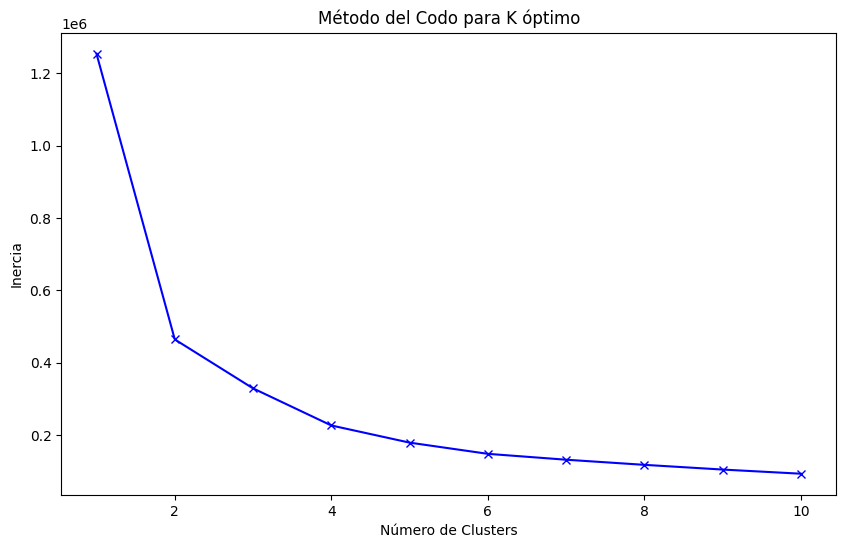

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# qué variables metemos? estas supongo que serán las más relevantes:
variables_clustering = ['edad', 'num_antiguedad']
X = data_prepro[variables_clustering].dropna()

#estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#número optimo de clusters

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K óptimo')
plt.show()




In [ ]:
# kmeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data_prepro['cluster'] = kmeans.fit_predict(X_scaled)

perfiles = data_prepro.groupby('cluster')[variables_clustering].mean()
print(perfiles)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              edad  num_antiguedad
cluster                           
0        25.299409       26.781127
1        47.135818       58.034569
2        73.191061      138.725865
3        46.870385      166.399138


In [ ]:
# Características medias de cada cluster
for cluster in range(4):
    print(f"Cluster {cluster}:")
    display(data_prepro[data_prepro['cluster'] == cluster][variables_clustering].describe())


Cluster 0:


edad  num_antiguedad
count  277567.000000   277567.000000
mean       25.299409       26.781127
std         4.476207       17.706377
min        18.000000        0.000000
25%        22.000000       12.000000
50%        24.000000       25.000000
75%        28.000000       39.000000
max        40.000000      140.000000

Cluster 1:


edad  num_antiguedad
count  129710.000000   129710.000000
mean       47.135818       58.034569
std         8.441333       34.125747
min        30.000000        0.000000
25%        41.000000       26.000000
50%        46.000000       60.000000
75%        53.000000       89.000000
max        79.000000      112.000000

Cluster 2:


edad  num_antiguedad
count  67879.000000    67879.000000
mean      73.191061      138.725865
std        9.010901       46.993432
min       58.000000        0.000000
25%       66.000000      107.000000
50%       72.000000      140.000000
75%       79.000000      170.000000
max       95.000000      254.000000

Cluster 3:


edad  num_antiguedad
count  151772.000000   151772.000000
mean       46.870385      166.399138
std         7.461468       32.583309
min        18.000000      112.000000
25%        42.000000      140.000000
50%        47.000000      165.000000
75%        52.000000      188.000000
max        66.000000      255.000000

In [ ]:
data_prepro.head(5)

cod_persona        mes sexo  edad     fecha1  xti_nuevo_cliente  \
311072      100001 2015-09-28    F  20.0 2015-09-18                1.0   
329903      100001 2015-10-28    F  20.0 2015-09-18                1.0   
374318      100001 2015-11-28    F  20.0 2015-09-18                1.0   
443159      100001 2015-12-28    F  20.0 2015-09-18                1.0   
451752      100001 2016-01-28    F  20.0 2015-09-18                1.0   

        num_antiguedad tip_rel_1mes indresi indext des_canal  cod_provincia  \
311072               0            I       S      N       KHE           46.0   
329903               1            A       S      N       KHQ           46.0   
374318               2            I       S      N       KHQ           46.0   
443159               3            I       S      N       KHQ           46.0   
451752               4            I       S      N       KHQ           46.0   

        xti_actividad_cliente         id_segmento  ind_prod1  ind_prod3  \
311072                    0.0   02 - PARTICULARES          0          1   
329903                    0.0  03 - UNIVERSITARIO          0          1   
374318                    0.0  03 - UNIVERSITARIO          0          1   
443159                    0.0  03 - UNIVERSITARIO          0          1   
451752                    0.0  03 - UNIVERSITARIO          0          1   

        ind_prod4  ind_prod5  ind_prod6  ind_prod7  ind_prod8  ind_prod9  \
311072          0          0          0          0          0          0   
329903          0          0          0          0          0          0   
374318          0          0          0          0          0          0   
443159          0          0          0          0          0          0   
451752          0          0          0          0          0          0   

        ind_prod10  ind_prod11  ind_prod12  ind_prod13  ind_prod14  \
311072           0           0           0           0           0   
329903           0           0           0           0           0   
374318           0           0           0           0           0   
443159           0           0           0           0           0   
451752           0           0           0           0           0   

        ind_prod15  ind_prod16  ind_prod17  ind_prod18  ind_prod19  \
311072           0           0           0           0           0   
329903           0           0           0           0           0   
374318           0           0           0           0           0   
443159           0           0           0           0           0   
451752           0           0           0           0           0   

        ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  \
311072           0           0         0.0         0.0           0   
329903           0           0         0.0         0.0           0   
374318           0           0         0.0         0.0           0   
443159           0           0         0.0         0.0           0   
451752           0           0         0.0         0.0           0   

        ind_prod25 grupo_edad categoria_ingresos  total_productos  \
311072           0       0-20                 Q1                1   
329903           0       0-20                 Q1                1   
374318           0       0-20                 Q1                1   
443159           0       0-20                 Q1                1   
451752           0       0-20                 Q1                1   

        ind_prod1_status  ind_prod3_status  ind_prod4_status  \
311072                 0                 0                 0   
329903                 0                 0                 0   
374318                 0                 0                 0   
443159                 0                 0                 0   
451752                 0                 0                 0   

        ind_prod5_status  ind_prod6_status  ind_prod7_status  \
311072                 0                 0          

## Eliminamos variable `grupo_edad`: se han eliminado casos extraños y se trata como una variable numérica.



In [ ]:
data_prepro.drop(['grupo_edad'], axis = 1, inplace = True)

# Transformación de las variables:

In [ ]:
data_cod = data_prepro.copy()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
categories = [['Q1', 'Q2', 'Q3', 'Q4']]
encoder = OrdinalEncoder(categories=categories)
data_cod['imp_renta_enc'] = encoder.fit_transform(data_cod[['categoria_ingresos']])
data_cod.drop('categoria_ingresos', axis=1, inplace=True)

In [ ]:
data_cod['imp_renta_enc'] = data_cod['imp_renta_enc'].astype(int)

In [ ]:
# Convertir las columnas especificadas a tipo entero
# Crear una lista de las columnas de productos
productos = [f'ind_prod{i}' for i in range(1, 26)]
productos_disponibles = [producto for producto in productos if producto in data_cod.columns]
columns_to_convert = ['edad', 'xti_nuevo_cliente', 'cod_provincia', 'xti_actividad_cliente'] + productos_disponibles

for col in columns_to_convert:
    data_cod[col] = data_cod[col].astype(int)

In [ ]:
columns_to_ohencode = ['sexo', 'tip_rel_1mes','id_segmento', 'indresi', 'indext' ]
data_cod = pd.get_dummies(data_cod, columns=columns_to_ohencode, drop_first=True)

In [ ]:
# # Convertir valores en la columna 'xti_rel'
# data_cod['xti_rel'] = data_cod['xti_rel'].replace(99, 0)

# # Convertir valores en las columnas 'indresi', 'indext', y 'xti_extra' de 'S' a 1 y 'N' a 0
# columns_to_convert = ['indresi', 'indext', 'xti_extra']
# for col in columns_to_convert:
#     data_cod[col] = data_cod[col].map({'S': 1, 'N': 0})

In [ ]:
columns_to_label_encode = ['des_canal']

for column in columns_to_label_encode:
    le = LabelEncoder()
    data_cod[column] = le.fit_transform(data_cod[column])

In [ ]:
data_cod['cod_persona'] = pd.to_numeric(data_cod['cod_persona'])

In [ ]:
data_final = data_cod.copy()

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626928 entries, 311072 to 593060
Data columns (total 70 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   cod_persona                     626928 non-null  int64         
 1   mes                             626928 non-null  datetime64[ns]
 2   edad                            626928 non-null  int64         
 3   fecha1                          626928 non-null  datetime64[ns]
 4   xti_nuevo_cliente               626928 non-null  int64         
 5   num_antiguedad                  626928 non-null  int64         
 6   des_canal                       626928 non-null  int64         
 7   cod_provincia                   626928 non-null  int64         
 8   xti_actividad_cliente           626928 non-null  int64         
 9   ind_prod1                       626928 non-null  int64         
 10  ind_prod3                       626928 non-null  int64  

# Crear la variable objetivo

In [ ]:
#df_ejemplo = data_final[data_final['cod_persona'] == 800543]

In [ ]:
import pandas as pd
import numpy as np

# Automatizar la creación de la lista de productos excluyendo las columnas que terminan en '_status'
productos = [col for col in data_final.columns if col.startswith('ind_prod') and not col.endswith('_status')]

# Definimos una función que crea y_prodX para cada producto
def create_y_prod(df, prod_col):
    df = df.sort_values(by=['cod_persona', 'mes'])
    df[f'y_{prod_col}'] = np.nan

    # Desplazar la columna hacia arriba para comparar con el mes siguiente
    df[f'y_{prod_col}'] = df.groupby('cod_persona')[prod_col].shift(-1) - df[prod_col]

    # Si la diferencia es 1, significa que el producto fue contratado, de lo contrario 0 (y -1 si no hay datos del siguiente mes)
    df[f'y_{prod_col}'] = df[f'y_{prod_col}'].apply(lambda x: 1 if x == 1 else (np.nan if pd.isna(x) else 0))

    return df

# Creamos las nuevas columnas y_prodX para cada producto
for prod in productos:
    data_final = create_y_prod(data_final, prod)


In [ ]:
conteo_registros = data_final.groupby('cod_persona').size().reset_index(name='conteo')
conteo_final = conteo_registros.groupby('conteo').size().reset_index(name='numero_personas')
conteo_final

conteo  numero_personas
0        1              224
1        2              258
2        3              291
3        4              324
4        5              367
5        6              741
6        7             1408
7        8             1159
8        9              678
9       10             9501
10      11              215
11      12              216
12      13              212
13      14              278
14      15              267
15      16            30118

In [ ]:
personas_con_16_registros = conteo_registros[conteo_registros['conteo'] == 16]
ejemplos = data_final[data_final['cod_persona'].isin(personas_con_16_registros['cod_persona'])]

personas_con_16_registros.head(2)

cod_persona  conteo
6786       174598      16
6794       174770      16

Imprimimos un ejemplo para comprobar la variable objetivo. El cliente 800543 debería de tener cambios en el producto 19. Se vuelve a contratar tras haber sido descontratado en el registro 9 y 14, ver en la variable `y_ind_prod19`. El último registro son NaN.

In [ ]:
data_final = data_final.sort_values(by=['cod_persona', 'mes'])

In [ ]:
data_final[data_final['cod_persona']== 800543]

cod_persona        mes  edad     fecha1  xti_nuevo_cliente  \
26500        800543 2015-01-28    50 2008-03-09                  0   
37934        800543 2015-02-28    50 2008-03-09                  0   
69013        800543 2015-03-28    50 2008-03-09                  0   
100063       800543 2015-04-28    50 2008-03-09                  0   
148527       800543 2015-05-28    50 2008-03-09                  0   
179964       800543 2015-06-28    50 2008-03-09                  0   
196524       800543 2015-07-28    50 2008-03-09                  0   
241998       800543 2015-08-28    50 2008-03-09                  0   
295276       800543 2015-09-28    50 2008-03-09                  0   
349720       800543 2015-10-28    50 2008-03-09                  0   
366736       800543 2015-11-28    50 2008-03-09                  0   
436335       800543 2015-12-28    50 2008-03-09                  0   
474242       800543 2016-01-28    50 2008-03-09                  0   
536673       800543 2016-02-28    50 2008-03-09                  0   
566227       800543 2016-03-28    50 2008-03-09                  0   
597345       800543 2016-04-28    50 2008-03-09                  0   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
26500               88         94             15                      1   
37934               88         94             15                      1   
69013               88         94             15                      1   
100063              88         94             15                      1   
148527              88         94             15                      1   
179964              88         94             15                      1   
196524              88         94             15                      1   
241998              89         94             15                      1   
295276              90         94             15                      1   
349720              91         94             15                      1   
366736              92         94             15                      1   
436335              93         94             15                      1   
474242              94         94             15                      1   
536673              95         94             15                      1   
566227              96         94             15                      1   
597345              97         94             15                      1   

        ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  ind_prod7  \
26500           0          0          0          1          0          0   
37934           0          0          0          1          0          0   
69013           0          0          0          1          0          0   
100063          0          0          0          1          0          0   
148527          0          0          0          1          0          0   
179964          0          0          0          1          0          0   
196524          0          0          0          1          0          0   
241998          0          0          0          1          0          0   
295276          0          0          0          1          0          0   
349720          0          0          0          1          0          0   
366736          0          0          0          1          0          0   
436335          0          0          0          1          0          0   
474242          0          0          0          1          0          0   
536673          0          0          0          1          0          0   
566227          0          0          0          1          0          0   
597345          0          0          0          1          0          0   

        ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  ind_prod13  \
26500           0          0           0           0           1           1   
37934           0          0           0           0           1           1   
69013   

Análisis de contrataciones por artículo

In [ ]:
y_ind_prod_columns = data_final.filter(like='y_ind_prod').columns
y_ind_prod_columns

Index(['y_ind_prod1', 'y_ind_prod3', 'y_ind_prod4', 'y_ind_prod5',
       'y_ind_prod6', 'y_ind_prod7', 'y_ind_prod8', 'y_ind_prod9',
       'y_ind_prod10', 'y_ind_prod11', 'y_ind_prod12', 'y_ind_prod13',
       'y_ind_prod14', 'y_ind_prod15', 'y_ind_prod16', 'y_ind_prod17',
       'y_ind_prod18', 'y_ind_prod19', 'y_ind_prod20', 'y_ind_prod21',
       'y_ind_prod22', 'y_ind_prod23', 'y_ind_prod24', 'y_ind_prod25'],
      dtype='object')

In [ ]:
y_ind_prod_counts = data_final[y_ind_prod_columns].sum()
y_ind_prod_counts

y_ind_prod1        0.0
y_ind_prod3     3311.0
y_ind_prod4        7.0
y_ind_prod5     1758.0
y_ind_prod6        5.0
y_ind_prod7      347.0
y_ind_prod8      181.0
y_ind_prod9       88.0
y_ind_prod10     152.0
y_ind_prod11      14.0
y_ind_prod12     592.0
y_ind_prod13    1126.0
y_ind_prod14     177.0
y_ind_prod15       3.0
y_ind_prod16      29.0
y_ind_prod17       6.0
y_ind_prod18     424.0
y_ind_prod19    3288.0
y_ind_prod20     216.0
y_ind_prod21       5.0
y_ind_prod22    3424.0
y_ind_prod23    4007.0
y_ind_prod24    6964.0
y_ind_prod25    3025.0
dtype: float64

# Codificar la fecha

In [ ]:
selected_columns = ['mes', 'cod_persona', 'num_antiguedad', 'fecha1']

# Mostrar las primeras 500 filas (en este ejemplo, solo tenemos 5 filas)
result = data_final[selected_columns]

In [ ]:
result[result['num_antiguedad']==25].head(10)

mes  cod_persona  num_antiguedad     fecha1
623259 2016-04-28       157760              25 2015-05-07
623226 2016-04-28       158804              25 2015-04-30
623227 2016-04-28       159273              25 2015-04-28
623006 2016-04-28       161067              25 2015-04-16
623036 2016-04-28       164603              25 2015-03-23
623579 2016-04-28       166406              25 2015-03-12
623508 2016-04-28       167069              25 2015-03-09
623515 2016-04-28       167121              25 2015-03-09
623656 2016-04-28       168260              25 2015-03-02
623693 2016-04-28       168518              25 2015-02-27

## Variable `antiguedad2`

`antiguedad2`: Se convierte la columna `fecha1` en meses desde la primera contratación

In [ ]:
import pandas as pd
from dateutil.relativedelta import relativedelta

data_final = data_final.copy()  # Para evitar SettingWithCopyWarning, trabajar con una copia del DataFrame original

# Convertir las columnas de fechas a tipo datetime usando .loc
data_final.loc[:, 'fecha1'] = pd.to_datetime(data_final['fecha1'])
data_final.loc[:, 'mes'] = pd.to_datetime(data_final['mes'])

# Función para calcular la diferencia en meses usando relativedelta
def calculate_month_diff(row):
    return relativedelta(row['mes'], row['fecha1']).months + relativedelta(row['mes'], row['fecha1']).years * 12

# Aplicar la función a cada fila del DataFrame usando .loc
data_final.loc[:, 'antiguedad2'] = data_final.apply(calculate_month_diff, axis=1)

In [ ]:
data_final[data_final['num_antiguedad']==4].head(4)

cod_persona        mes  edad     fecha1  xti_nuevo_cliente  \
594185        33328 2016-04-28    30 2015-12-31                  1   
594184        33334 2016-04-28    33 2015-12-31                  1   
594187        33397 2016-04-28    52 2015-12-31                  1   
594189        33406 2016-04-28    44 2015-12-31                  1   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
594185               4        120             22                      1   
594184               4        120              8                      1   
594187               4        121             45                      1   
594189               4        121             13                      0   

        ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  ind_prod7  \
594185          0          1          0          0          0          0   
594184          0          0          0          1          0          0   
594187          0          0          0          0          0          1   
594189          0          0          0          0          0          0   

        ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  ind_prod13  \
594185          0          0           0           0           0           0   
594184          0          0           0           0           0           0   
594187          0          0           0           0           0           0   
594189          0          0           0           0           0           0   

        ind_prod14  ind_prod15  ind_prod16  ind_prod17  ind_prod18  \
594185           0           0           0           0           1   
594184           0           0           0           0           0   
594187           0           0           0           0           0   
594189           0           0           0           0           0   

        ind_prod19  ind_prod20  ind_prod21  ind_prod22  ind_prod23  \
594185           0           0           0           0           0   
594184           0           0           0           0           0   
594187           0           0           0           0           0   
594189           0           0           0           0           0   

        ind_prod24  ind_prod25 grupo_edad  total_productos  ind_prod1_status  \
594185           1           0      21-30                3                 0   
594184           1           0      31-40                2                 0   
594187           0           0      51-60                1                 0   
594189           0           0      41-50                0                 0   

        ind_prod3_status  ind_prod4_status  ind_prod5_status  \
594185                 0                 0                 0   
594184                 0                 0                 0   
594187                 0                 0                 0   
594189                 0                 0                 0   

        ind_prod6_status  ind_prod7_status  ind_prod8_status  \
594185                 0                 0                 0   
594184                 0                 0                 0   
594187                 0                 0                 0   
594189                 0                 0                 0   

        ind_prod9_status  ind_prod10_status  ind_prod11_status  \
594185                 0                  0                  0   
594184                 0                  0                  0   
594187                 0                  0                  0   
594189                 0                  0                  0   

        ind_prod12_status  ind_prod13_status  ind_prod14_status  \
594185                  0                  0                  0   
594184                  0                  0                  0   
594187                  0                  0                  0   
594189                  0                  0                  0   

        ind_prod15_status  ind_prod16_status  ind_prod17_status  \
594185              

In [ ]:
unique_values = data_final['antiguedad2'].unique()
unique_values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,  34, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223,  35,  36,  37, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136,  38,  39,  40,  41,  42,
        43,  44, 117, 118, 119, 120,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76, 144,
       145, 146, 147, 148, 149, 150, 151,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 137, 138, 139, 14

In [ ]:
data_final.head(2)

cod_persona        mes  edad     fecha1  xti_nuevo_cliente  \
595039         5514 2016-04-28    44 2016-04-29                  1   
595040         5541 2016-04-28    60 2016-04-29                  1   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
595039               0        116              8                      0   
595040               0        116             41                      0   

        ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  ind_prod7  \
595039          0          0          0          0          0          0   
595040          0          0          0          0          0          0   

        ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  ind_prod13  \
595039          0          0           0           0           0           0   
595040          0          0           0           0           0           0   

        ind_prod14  ind_prod15  ind_prod16  ind_prod17  ind_prod18  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   

        ind_prod19  ind_prod20  ind_prod21  ind_prod22  ind_prod23  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   

        ind_prod24  ind_prod25 grupo_edad  total_productos  ind_prod1_status  \
595039           0           0      41-50                0                 0   
595040           0           0      51-60                0                 0   

        ind_prod3_status  ind_prod4_status  ind_prod5_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   

        ind_prod6_status  ind_prod7_status  ind_prod8_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   

        ind_prod9_status  ind_prod10_status  ind_prod11_status  \
595039                 0                  0                  0   
595040                 0                  0                  0   

        ind_prod12_status  ind_prod13_status  ind_prod14_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod15_status  ind_prod16_status  ind_prod17_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod18_status  ind_prod19_status  ind_prod20_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod21_status  ind_prod22_status  ind_prod23_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod24_status  ind_prod25_status  media_contr_ult_6_meses  \
595039                  0                  0                      0.0   
595040                  0                  0                      0.0   

        cluster  imp_renta_enc  sexo_M  tip_rel_1mes_I  tip_rel_1mes_P  \
595039        1              2   False            True           False   
595040        1              1   False            True           False   

        tip_rel_1mes_R  id_segmento_02 - PARTICULARES  \
595039           False                           True   
595040           False                           True   

        id_segmento_03 - UNIVERSITARIO  indresi_S  indext_S  y_ind_prod1  \
595039                           False       True     False          NaN   
595040                           False       True     False          NaN   

        y_ind_prod3  y_ind_prod4  y_ind_prod5  y_ind_prod6  y_ind_prod7  \
595039          NaN          NaN          NaN          NaN          NaN   
595040          NaN          NaN          NaN      

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626928 entries, 595039 to 609644
Data columns (total 95 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   cod_persona                     626928 non-null  int64         
 1   mes                             626928 non-null  datetime64[ns]
 2   edad                            626928 non-null  int64         
 3   fecha1                          626928 non-null  datetime64[ns]
 4   xti_nuevo_cliente               626928 non-null  int64         
 5   num_antiguedad                  626928 non-null  int64         
 6   des_canal                       626928 non-null  int64         
 7   cod_provincia                   626928 non-null  int64         
 8   xti_actividad_cliente           626928 non-null  int64         
 9   ind_prod1                       626928 non-null  int64         
 10  ind_prod3                       626928 non-null  int64  

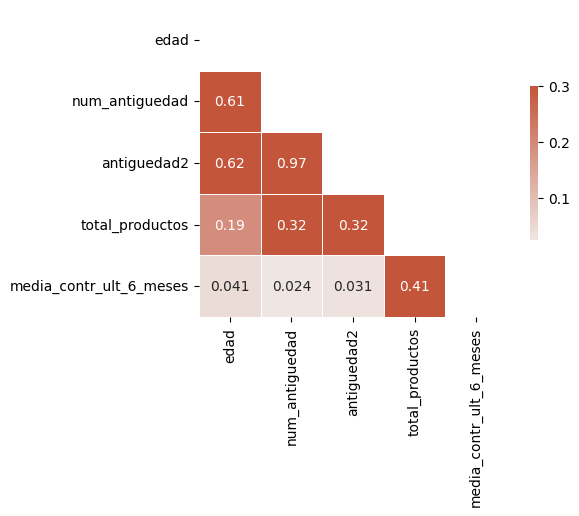

In [ ]:
# Obtenemos la matriz de correlaciones
variables_num = data_final[['edad', 'num_antiguedad', 'antiguedad2', 'total_productos', 'media_contr_ult_6_meses']]
corr = variables_num.corr()
# Generamos un artificio para hacer ceros por encima de la diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configuración del gráfico
f, ax = plt.subplots(figsize=(6, 4))
# Paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# gráfico de intensidad
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
data_final.drop(['antiguedad2', 'grupo_edad'], axis=1, inplace=True)

In [ ]:
data_final.head(2)

cod_persona        mes  edad     fecha1  xti_nuevo_cliente  \
595039         5514 2016-04-28    44 2016-04-29                  1   
595040         5541 2016-04-28    60 2016-04-29                  1   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
595039               0        116              8                      0   
595040               0        116             41                      0   

        ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  ind_prod7  \
595039          0          0          0          0          0          0   
595040          0          0          0          0          0          0   

        ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  ind_prod13  \
595039          0          0           0           0           0           0   
595040          0          0           0           0           0           0   

        ind_prod14  ind_prod15  ind_prod16  ind_prod17  ind_prod18  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   

        ind_prod19  ind_prod20  ind_prod21  ind_prod22  ind_prod23  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   

        ind_prod24  ind_prod25  total_productos  ind_prod1_status  \
595039           0           0                0                 0   
595040           0           0                0                 0   

        ind_prod3_status  ind_prod4_status  ind_prod5_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   

        ind_prod6_status  ind_prod7_status  ind_prod8_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   

        ind_prod9_status  ind_prod10_status  ind_prod11_status  \
595039                 0                  0                  0   
595040                 0                  0                  0   

        ind_prod12_status  ind_prod13_status  ind_prod14_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod15_status  ind_prod16_status  ind_prod17_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod18_status  ind_prod19_status  ind_prod20_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod21_status  ind_prod22_status  ind_prod23_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod24_status  ind_prod25_status  media_contr_ult_6_meses  \
595039                  0                  0                      0.0   
595040                  0                  0                      0.0   

        cluster  imp_renta_enc  sexo_M  tip_rel_1mes_I  tip_rel_1mes_P  \
595039        1              2   False            True           False   
595040        1              1   False            True           False   

        tip_rel_1mes_R  id_segmento_02 - PARTICULARES  \
595039           False                           True   
595040           False                           True   

        id_segmento_03 - UNIVERSITARIO  indresi_S  indext_S  y_ind_prod1  \
595039                           False       True     False          NaN   
595040                           False       True     False          NaN   

        y_ind_prod3  y_ind_prod4  y_ind_prod5  y_ind_prod6  y_ind_prod7  \
595039          NaN          NaN          NaN          NaN          NaN   
595040          NaN          NaN          NaN          NaN          NaN   

        

## Codificación de la variable `mes`: `anho`, `mes`

In [ ]:
# Dividir la columna 'mes' en 'mes' y 'anho'
data_final['anho'] = data_final['mes'].dt.year
data_final['mes'] = data_final['mes'].dt.month
data_final['mes_anho'] = data_final['mes'].astype(str) + '_' + data_final['anho'].astype(str)
# Eliminar la columna 'fecha1'
data_final.drop(columns=['fecha1'], inplace=True)

In [ ]:
# Reordenar las columnas para que 'anho' sea la tercera columna
cols = list(data_final.columns)

In [ ]:
# Remover la columna 'anho'
cols.remove('anho')
cols.remove('mes_anho')
cols.remove('cluster')
cols.remove('imp_renta_enc')

# Insertar 'anho' en la tercera posición (índice 2)
cols.insert(8, 'imp_renta_enc')
cols.insert(1, 'anho')
cols.insert(1, 'mes_anho')
cols.insert(1, 'cluster')

# Reordenar el DataFrame
data_final = data_final[cols]

In [ ]:
data_final.head(2)

cod_persona  cluster mes_anho  anho  mes  edad  xti_nuevo_cliente  \
595039         5514        1   4_2016  2016    4    44                  1   
595040         5541        1   4_2016  2016    4    60                  1   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
595039               0        116              8                      0   
595040               0        116             41                      0   

        imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
595039              2          0          0          0          0          0   
595040              1          0          0          0          0          0   

        ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
595039          0          0          0           0           0           0   
595040          0          0          0           0           0           0   

        ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   

        ind_prod18  ind_prod19  ind_prod20  ind_prod21  ind_prod22  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   

        ind_prod23  ind_prod24  ind_prod25  total_productos  ind_prod1_status  \
595039           0           0           0                0                 0   
595040           0           0           0                0                 0   

        ind_prod3_status  ind_prod4_status  ind_prod5_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   

        ind_prod6_status  ind_prod7_status  ind_prod8_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   

        ind_prod9_status  ind_prod10_status  ind_prod11_status  \
595039                 0                  0                  0   
595040                 0                  0                  0   

        ind_prod12_status  ind_prod13_status  ind_prod14_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod15_status  ind_prod16_status  ind_prod17_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod18_status  ind_prod19_status  ind_prod20_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod21_status  ind_prod22_status  ind_prod23_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod24_status  ind_prod25_status  media_contr_ult_6_meses  sexo_M  \
595039                  0                  0                      0.0   False   
595040                  0                  0                      0.0   False   

        tip_rel_1mes_I  tip_rel_1mes_P  tip_rel_1mes_R  \
595039            True           False           False   
595040            True           False           False   

        id_segmento_02 - PARTICULARES  id_segmento_03 - UNIVERSITARIO  \
595039                           True                           False   
595040                           True                           False   

        indresi_S  indext_S  y_ind_prod1  y_ind_prod3  y_ind_prod4  \
595039       True     False          NaN          NaN          NaN   
595040       True     False          NaN          NaN          NaN   

        y_ind_prod5  y_ind_prod6  y_ind_prod7  y_ind_prod8  y_ind_prod9  \
595039          NaN          NaN          NaN          NaN          NaN   
595040      

In [ ]:
data_final.dtypes

cod_persona                         int64
cluster                             int32
mes_anho                           object
anho                                int32
mes                                 int32
edad                                int64
xti_nuevo_cliente                   int64
num_antiguedad                      int64
des_canal                           int64
cod_provincia                       int64
xti_actividad_cliente               int64
imp_renta_enc                       int64
ind_prod1                           int64
ind_prod3                           int64
ind_prod4                           int64
ind_prod5                           int64
ind_prod6                           int64
ind_prod7                           int64
ind_prod8                           int64
ind_prod9                           int64
ind_prod10                          int64
ind_prod11                          int64
ind_prod12                          int64
ind_prod13                        

## Codificador ordinal para mantener la  sucesión temporal

In [ ]:
# def transformar_mes(df):
#     df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
#     df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)
#     df.drop('mes', axis=1, inplace=True)
#     return df
# data_final = transformar_mes(data_final)

In [ ]:
data_model = data_final.copy()

In [ ]:
categories = data_model['mes_anho'].unique().tolist()
categories = list(map(str, categories))
categories_sorted = sorted(categories, key=lambda x: (int(x.split('_')[1]), int(x.split('_')[0])))
categories_sorted

['1_2015',
 '2_2015',
 '3_2015',
 '4_2015',
 '5_2015',
 '6_2015',
 '7_2015',
 '8_2015',
 '9_2015',
 '10_2015',
 '11_2015',
 '12_2015',
 '1_2016',
 '2_2016',
 '3_2016',
 '4_2016']

In [ ]:
encoder = OrdinalEncoder(categories=[categories_sorted])
data_model['mes_anho_enc'] = encoder.fit_transform(data_model[['mes_anho']])

In [ ]:
data_model['mes_anho'] = data_model['mes_anho_enc'].astype(int)

In [ ]:
data_model.drop(['mes_anho_enc'], axis=1, inplace=True)

In [ ]:
data_model.head(2)

cod_persona  cluster  mes_anho  anho  mes  edad  xti_nuevo_cliente  \
595039         5514        1        15  2016    4    44                  1   
595040         5541        1        15  2016    4    60                  1   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
595039               0        116              8                      0   
595040               0        116             41                      0   

        imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
595039              2          0          0          0          0          0   
595040              1          0          0          0          0          0   

        ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
595039          0          0          0           0           0           0   
595040          0          0          0           0           0           0   

        ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   

        ind_prod18  ind_prod19  ind_prod20  ind_prod21  ind_prod22  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   

        ind_prod23  ind_prod24  ind_prod25  total_productos  ind_prod1_status  \
595039           0           0           0                0                 0   
595040           0           0           0                0                 0   

        ind_prod3_status  ind_prod4_status  ind_prod5_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   

        ind_prod6_status  ind_prod7_status  ind_prod8_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   

        ind_prod9_status  ind_prod10_status  ind_prod11_status  \
595039                 0                  0                  0   
595040                 0                  0                  0   

        ind_prod12_status  ind_prod13_status  ind_prod14_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod15_status  ind_prod16_status  ind_prod17_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod18_status  ind_prod19_status  ind_prod20_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod21_status  ind_prod22_status  ind_prod23_status  \
595039                  0                  0                  0   
595040                  0                  0                  0   

        ind_prod24_status  ind_prod25_status  media_contr_ult_6_meses  sexo_M  \
595039                  0                  0                      0.0   False   
595040                  0                  0                      0.0   False   

        tip_rel_1mes_I  tip_rel_1mes_P  tip_rel_1mes_R  \
595039            True           False           False   
595040            True           False           False   

        id_segmento_02 - PARTICULARES  id_segmento_03 - UNIVERSITARIO  \
595039                           True                           False   
595040                           True                           False   

        indresi_S  indext_S  y_ind_prod1  y_ind_prod3  y_ind_prod4  \
595039       True     False          NaN          NaN          NaN   
595040       True     False          NaN          NaN          NaN   

        y_ind_prod5  y_ind_prod6  y_ind_prod7  y_ind_prod8  y_ind_prod9  \
595039          NaN          NaN          NaN          NaN          NaN   
595040   

# Registros de predicciones (registros que no valen para entrenamiento ni validación)

In [ ]:
data_model[data_model['cod_persona']== 800543	]

cod_persona  cluster  mes_anho  anho  mes  edad  xti_nuevo_cliente  \
26500        800543        1         0  2015    1    50                  0   
37934        800543        1         1  2015    2    50                  0   
69013        800543        1         2  2015    3    50                  0   
100063       800543        1         3  2015    4    50                  0   
148527       800543        1         4  2015    5    50                  0   
179964       800543        1         5  2015    6    50                  0   
196524       800543        1         6  2015    7    50                  0   
241998       800543        1         7  2015    8    50                  0   
295276       800543        1         8  2015    9    50                  0   
349720       800543        1         9  2015   10    50                  0   
366736       800543        1        10  2015   11    50                  0   
436335       800543        1        11  2015   12    50                  0   
474242       800543        1        12  2016    1    50                  0   
536673       800543        1        13  2016    2    50                  0   
566227       800543        1        14  2016    3    50                  0   
597345       800543        1        15  2016    4    50                  0   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
26500               88         94             15                      1   
37934               88         94             15                      1   
69013               88         94             15                      1   
100063              88         94             15                      1   
148527              88         94             15                      1   
179964              88         94             15                      1   
196524              88         94             15                      1   
241998              89         94             15                      1   
295276              90         94             15                      1   
349720              91         94             15                      1   
366736              92         94             15                      1   
436335              93         94             15                      1   
474242              94         94             15                      1   
536673              95         94             15                      1   
566227              96         94             15                      1   
597345              97         94             15                      1   

        imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
26500               1          0          0          0          1          0   
37934               1          0          0          0          1          0   
69013               1          0          0          0          1          0   
100063              1          0          0          0          1          0   
148527              1          0          0          0          1          0   
179964              1          0          0          0          1          0   
196524              1          0          0          0          1          0   
241998              1          0          0          0          1          0   
295276              1          0          0          0          1          0   
349720              1          0          0          0          1          0   
366736              1          0          0          0          1          0   
436335              1          0          0          0          1          0   
474242              1          0          0          0          1          0   
536673              1          0          0          0          1          0   
566227              1          0          0          0          1          0   
597345              1          0          0          0          1          0   

        ind_prod7  ind_prod8  ind_prod9  ind

`predicciones`: Dataframe con los registros de predicciones a realizar con el modelo validado

In [ ]:
# Identificar las columnas y_ind_prodX
y_prod_columns = [col for col in data_model.columns if col.startswith('y_ind_prod')]

# Copiar las filas con NaN en y_ind_prodX a otro DataFrame
predicciones = data_model[data_model[y_prod_columns].isna().any(axis=1)]

In [ ]:
predicciones.head(5)

cod_persona  cluster  mes_anho  anho  mes  edad  xti_nuevo_cliente  \
595039         5514        1        15  2016    4    44                  1   
595040         5541        1        15  2016    4    60                  1   
595045         5631        1        15  2016    4    53                  1   
595046         5656        1        15  2016    4    47                  1   
594981         5738        1        15  2016    4    48                  1   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
595039               0        116              8                      0   
595040               0        116             41                      0   
595045               0        116             15                      0   
595046               0        116             46                      0   
594981               0        116             28                      0   

        imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
595039              2          0          0          0          0          0   
595040              1          0          0          0          0          0   
595045              1          0          0          0          0          0   
595046              1          0          0          0          0          0   
594981              2          0          0          0          0          0   

        ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
595039          0          0          0           0           0           0   
595040          0          0          0           0           0           0   
595045          0          0          0           0           0           0   
595046          0          0          0           0           0           0   
594981          0          0          0           0           0           0   

        ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   
595045           0           0           0           0           0   
595046           0           0           0           0           0   
594981           0           0           0           0           0   

        ind_prod18  ind_prod19  ind_prod20  ind_prod21  ind_prod22  \
595039           0           0           0           0           0   
595040           0           0           0           0           0   
595045           0           0           0           0           0   
595046           0           0           0           0           0   
594981           0           0           0           0           0   

        ind_prod23  ind_prod24  ind_prod25  total_productos  ind_prod1_status  \
595039           0           0           0                0                 0   
595040           0           0           0                0                 0   
595045           0           0           0                0                 0   
595046           0           0           0                0                 0   
594981           0           0           0                0                 0   

        ind_prod3_status  ind_prod4_status  ind_prod5_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   
595045                 0                 0                 0   
595046                 0                 0                 0   
594981                 0                 0                 0   

        ind_prod6_status  ind_prod7_status  ind_prod8_status  \
595039                 0                 0                 0   
595040                 0                 0                 0   
595045                 0                 0                 0   
595046                 0                 0                 0   
594981                 0                 0                 0   

        ind_prod9_status  ind_pro

Eliminar los registros de predicciones para preparar el modelo: data_model

In [ ]:
data_model = data_model.dropna(subset=y_prod_columns)


In [ ]:
# Eliminar las columnas y_ind_prodX del DataFrame predicciones
predicciones = predicciones.drop(columns=y_prod_columns)


In [ ]:
predicciones.shape

(46257, 70)

In [ ]:
predicciones.dtypes

cod_persona                         int64
cluster                             int32
mes_anho                            int64
anho                                int32
mes                                 int32
edad                                int64
xti_nuevo_cliente                   int64
num_antiguedad                      int64
des_canal                           int64
cod_provincia                       int64
xti_actividad_cliente               int64
imp_renta_enc                       int64
ind_prod1                           int64
ind_prod3                           int64
ind_prod4                           int64
ind_prod5                           int64
ind_prod6                           int64
ind_prod7                           int64
ind_prod8                           int64
ind_prod9                           int64
ind_prod10                          int64
ind_prod11                          int64
ind_prod12                          int64
ind_prod13                        

In [ ]:

# # Identificar las columnas que contienen 'ind_prod' en su nombre, además de 'total_productos' y 'imp_renta_enc'
# cols_to_transform = [col for col in data_final.columns if 'ind_prod' in col] + ['total_productos', 'imp_renta_enc']

# # Convertir estas columnas a numérico, manejando errores y luego a entero
# for col in cols_to_transform:
#     data_final[col] = pd.to_numeric(data_final[col], errors='coerce')  # Forzar la conversión a numérico, NaN donde no se puede
#     data_final[col] = data_final[col].fillna(0).astype(int)  # Rellenar NaN con 0 y convertir a entero

In [ ]:
# Verificar si hay valores NaN en el dataset
nan_exists = data_model.isnull().values.any()

if nan_exists:
    print("El dataset contiene valores NaN.")
else:
    print("El dataset no contiene valores NaN.")

# Mostrar las columnas que tienen valores NaN y el conteo de estos valores
nan_columns = data_model.isnull().sum()
print("Conteo de valores NaN por columna:\n", nan_columns)# Verificar si hay valores NaN en el dataset
nan_exists = data_model.isnull().values.any()

if nan_exists:
    print("El dataset contiene valores NaN.")
else:
    print("El dataset no contiene valores NaN.")

# Mostrar las columnas que tienen valores NaN y el conteo de estos valores
nan_columns = data_model.isnull().sum()
print("Conteo de valores NaN por columna:\n", nan_columns)

El dataset no contiene valores NaN.
Conteo de valores NaN por columna:
 cod_persona                       0
cluster                           0
mes_anho                          0
anho                              0
mes                               0
edad                              0
xti_nuevo_cliente                 0
num_antiguedad                    0
des_canal                         0
cod_provincia                     0
xti_actividad_cliente             0
imp_renta_enc                     0
ind_prod1                         0
ind_prod3                         0
ind_prod4                         0
ind_prod5                         0
ind_prod6                         0
ind_prod7                         0
ind_prod8                         0
ind_prod9                         0
ind_prod10                        0
ind_prod11                        0
ind_prod12                        0
ind_prod13                        0
ind_prod14                        0
ind_prod15                  

In [ ]:
data_model.dropna(inplace=True)

In [ ]:
data_model.head(2)

cod_persona  cluster  mes_anho  anho  mes  edad  xti_nuevo_cliente  \
560340        11057        0        14  2016    3    40                  1   
560337        11061        0        14  2016    3    20                  1   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
560340               0        116              8                      0   
560337               0        116             46                      0   

        imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
560340              2          0          0          0          0          0   
560337              1          0          0          0          0          0   

        ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
560340          0          0          0           0           0           0   
560337          0          0          0           0           0           0   

        ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  \
560340           0           0           0           0           0   
560337           0           0           0           0           0   

        ind_prod18  ind_prod19  ind_prod20  ind_prod21  ind_prod22  \
560340           0           0           0           0           0   
560337           0           0           0           0           0   

        ind_prod23  ind_prod24  ind_prod25  total_productos  ind_prod1_status  \
560340           0           0           0                0                 0   
560337           0           0           0                0                 0   

        ind_prod3_status  ind_prod4_status  ind_prod5_status  \
560340                 0                 0                 0   
560337                 0                 0                 0   

        ind_prod6_status  ind_prod7_status  ind_prod8_status  \
560340                 0                 0                 0   
560337                 0                 0                 0   

        ind_prod9_status  ind_prod10_status  ind_prod11_status  \
560340                 0                  0                  0   
560337                 0                  0                  0   

        ind_prod12_status  ind_prod13_status  ind_prod14_status  \
560340                  0                  0                  0   
560337                  0                  0                  0   

        ind_prod15_status  ind_prod16_status  ind_prod17_status  \
560340                  0                  0                  0   
560337                  0                  0                  0   

        ind_prod18_status  ind_prod19_status  ind_prod20_status  \
560340                  0                  0                  0   
560337                  0                  0                  0   

        ind_prod21_status  ind_prod22_status  ind_prod23_status  \
560340                  0                  0                  0   
560337                  0                  0                  0   

        ind_prod24_status  ind_prod25_status  media_contr_ult_6_meses  sexo_M  \
560340                  0                  0                      0.0    True   
560337                  0                  0                      0.0    True   

        tip_rel_1mes_I  tip_rel_1mes_P  tip_rel_1mes_R  \
560340            True           False           False   
560337            True           False           False   

        id_segmento_02 - PARTICULARES  id_segmento_03 - UNIVERSITARIO  \
560340                           True                           False   
560337                           True                           False   

        indresi_S  indext_S  y_ind_prod1  y_ind_prod3  y_ind_prod4  \
560340       True     False          0.0          1.0          0.0   
560337       True     False          0.0          0.0          0.0   

        y_ind_prod5  y_ind_prod6  y_ind_prod7  y_ind_prod8  y_ind_prod9  \
560340          0.0          0.0          0.0          0.0          0.0   
560337   

# Descarga de datos para modelar

In [ ]:
# # Guardar el DataFrame a un archivo CSV

# # /content/drive/MyDrive/Máster Big Data/Machine learning/
# data_model_path = '/content/drive/MyDrive/Proyecto Machine Learning/data_model.csv'
# data_model.to_csv(data_model_path, index=False)

# # Descargar el archivo
# # files.download('data_model.csv')



In [ ]:
# predicciones_path = '/content/drive/MyDrive/Proyecto Machine Learning/data_para_predecir.csv'
# predicciones.to_csv(predicciones_path, index=False)
# # files.download('data_para_predecir.csv')

# Random Forest

In [ ]:
import pandas as pd # manipulación y análisis de datos
import numpy as np # operaciones con arrays y matrices
import matplotlib.pyplot as plt # gráficos
import seaborn as sns # gráficos
import matplotlib.dates as mdates
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

## Carga de datos

In [ ]:
# from google.colab import drive

# # Montar Google Drive en el entorno de Colab
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# # Ruta al archivo CSV
# csv_path = '/content/drive/My Drive/Proyecto Machine Learning/data_model.csv'
# csv_pred_path = '/content/drive/My Drive/Proyecto Machine Learning/data_para_predecir.csv'

# # Cargar el DataFrame de pandas
# data = pd.read_csv(csv_path, index_col=None)
# data_pred_X = pd.read_csv(csv_pred_path, index_col=None)
# # Configurar la visualización para mostrar todas las columnas
# pd.set_option('display.max_columns', None)

# # Mostrar la cabecera del DataFrame
# data.head()

cod_persona  cluster  mes_anho  anho  mes  edad  xti_nuevo_cliente  \
0        11057        0        14  2016    3    40                  1   
1        11061        0        14  2016    3    20                  1   
2        11075        0        14  2016    3    22                  1   
3        11146        1        14  2016    3    70                  1   
4        11156        1        14  2016    3    46                  1   

   num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
0               0        116              8                      0   
1               0        116             46                      0   
2               0        116             12                      0   
3               0        116             17                      0   
4               0        116             28                      0   

   imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
0              2          0          0          0          0          0   
1              1          0          0          0          0          0   
2              0          0          0          0          0          0   
3              2          0          0          0          0          0   
4              2          0          0          0          0          0   

   ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  ind_prod18  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   ind_prod19  ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   ind_prod25  total_productos  ind_prod1_status  ind_prod3_status  \
0           0                0                 0                 0   
1           0                0                 0                 0   
2           0                0                 0                 0   
3           0                0                 0                 0   
4           0                0                 0                 0   

   ind_prod4_status  ind_prod5_status  ind_prod6_status  ind_prod7_status  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   ind_prod8_status  ind_prod9_status  ind_prod10_status  ind_prod11_status  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 0                 0                  0                  0   
3                 0                 0                  0                  0   
4                 0                 0     

In [ ]:
# para la ejecución del NB completo
data = data_model.copy()

## División en X, y

In [ ]:
from typing_extensions import dataclass_transform
y_columns = [col for col in data.columns if col.startswith('y_ind_prod')]

# Extraer las columnas de y
y = data[y_columns]

# Extraer las columnas para X excluyendo las de y
X = data.drop(columns=y_columns)
X['random_feature'] = np.random.rand(X.shape[0])

In [ ]:
X.head()

cod_persona  cluster  mes_anho  anho  mes  edad  xti_nuevo_cliente  \
0        11057        0        14  2016    3    40                  1   
1        11061        0        14  2016    3    20                  1   
2        11075        0        14  2016    3    22                  1   
3        11146        1        14  2016    3    70                  1   
4        11156        1        14  2016    3    46                  1   

   num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
0               0        116              8                      0   
1               0        116             46                      0   
2               0        116             12                      0   
3               0        116             17                      0   
4               0        116             28                      0   

   imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
0              2          0          0          0          0          0   
1              1          0          0          0          0          0   
2              0          0          0          0          0          0   
3              2          0          0          0          0          0   
4              2          0          0          0          0          0   

   ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  ind_prod18  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   ind_prod19  ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   ind_prod25  total_productos  ind_prod1_status  ind_prod3_status  \
0           0                0                 0                 0   
1           0                0                 0                 0   
2           0                0                 0                 0   
3           0                0                 0                 0   
4           0                0                 0                 0   

   ind_prod4_status  ind_prod5_status  ind_prod6_status  ind_prod7_status  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   ind_prod8_status  ind_prod9_status  ind_prod10_status  ind_prod11_status  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 0                 0                  0                  0   
3                 0                 0                  0                  0   
4                 0                 0     

In [ ]:
data_pred_X.head()

cod_persona  cluster  mes_anho  anho  mes  edad  xti_nuevo_cliente  \
0         5514        1        15  2016    4    44                  1   
1         5541        1        15  2016    4    60                  1   
2         5631        1        15  2016    4    53                  1   
3         5656        1        15  2016    4    47                  1   
4         5738        1        15  2016    4    48                  1   

   num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
0               0        116              8                      0   
1               0        116             41                      0   
2               0        116             15                      0   
3               0        116             46                      0   
4               0        116             28                      0   

   imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
0              2          0          0          0          0          0   
1              1          0          0          0          0          0   
2              1          0          0          0          0          0   
3              1          0          0          0          0          0   
4              2          0          0          0          0          0   

   ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  ind_prod18  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   ind_prod19  ind_prod20  ind_prod21  ind_prod22  ind_prod23  ind_prod24  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   ind_prod25  total_productos  ind_prod1_status  ind_prod3_status  \
0           0                0                 0                 0   
1           0                0                 0                 0   
2           0                0                 0                 0   
3           0                0                 0                 0   
4           0                0                 0                 0   

   ind_prod4_status  ind_prod5_status  ind_prod6_status  ind_prod7_status  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   ind_prod8_status  ind_prod9_status  ind_prod10_status  ind_prod11_status  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 0                 0                  0                  0   
3                 0                 0                  0                  0   
4                 0                 0     

In [ ]:
y.head()

y_ind_prod1  y_ind_prod3  y_ind_prod4  y_ind_prod5  y_ind_prod6  \
0          0.0          1.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          1.0          0.0          0.0          0.0   

   y_ind_prod7  y_ind_prod8  y_ind_prod9  y_ind_prod10  y_ind_prod11  \
0          0.0          0.0          0.0           0.0           0.0   
1          0.0          0.0          0.0           0.0           0.0   
2          0.0          0.0          0.0           0.0           0.0   
3          0.0          0.0          0.0           0.0           0.0   
4          0.0          0.0          0.0           0.0           0.0   

   y_ind_prod12  y_ind_prod13  y_ind_prod14  y_ind_prod15  y_ind_prod16  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   y_ind_prod17  y_ind_prod18  y_ind_prod19  y_ind_prod20  y_ind_prod21  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   y_ind_prod22  y_ind_prod23  y_ind_prod24  y_ind_prod25  
0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0

In [ ]:
y.sum()

y_ind_prod1        0.0
y_ind_prod3     3311.0
y_ind_prod4        7.0
y_ind_prod5     1758.0
y_ind_prod6        5.0
y_ind_prod7      347.0
y_ind_prod8      181.0
y_ind_prod9       88.0
y_ind_prod10     152.0
y_ind_prod11      14.0
y_ind_prod12     592.0
y_ind_prod13    1126.0
y_ind_prod14     177.0
y_ind_prod15       3.0
y_ind_prod16      29.0
y_ind_prod17       6.0
y_ind_prod18     424.0
y_ind_prod19    3288.0
y_ind_prod20     216.0
y_ind_prod21       5.0
y_ind_prod22    3424.0
y_ind_prod23    4007.0
y_ind_prod24    6964.0
y_ind_prod25    3025.0
dtype: float64

In [ ]:
y.shape

(580671, 24)

In [ ]:
X.shape

(580671, 71)

In [ ]:
if y['y_ind_prod1'].nunique() == 1:
    y = y.drop(columns=['y_ind_prod1'])

In [ ]:
X = X.sort_values(by=['mes_anho'])
y = y.loc[X.index]

In [ ]:
(data[data['anho']==2016].shape[0])/data.shape[0]

0.23629215166591752

## Feature importance con random forest classifier

In [ ]:
# Dividir los datos en un punto de corte temporal
cutoff_date = '2016-02'  # Por ejemplo, todos los datos antes de febrero 2016 para entrenamiento

# Crear una columna de fecha para facilitar el split
X['date'] = pd.to_datetime(X['anho'].astype(str) + '-' + X['mes'].astype(str))

# Dividir el conjunto de datos
X_train = X[X['date'] < cutoff_date]
X_test = X[X['date'] >= cutoff_date]
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

# Eliminar la columna 'date' si ya no es necesaria
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])


In [ ]:
X_train.shape

(488922, 71)

In [ ]:
y_test.head(2)

y_ind_prod3  y_ind_prod4  y_ind_prod5  y_ind_prod6  y_ind_prod7  \
10364           0.0          0.0          0.0          0.0          0.0   
238721          0.0          0.0          0.0          0.0          0.0   

        y_ind_prod8  y_ind_prod9  y_ind_prod10  y_ind_prod11  y_ind_prod12  \
10364           0.0          0.0           0.0           0.0           0.0   
238721          0.0          0.0           0.0           0.0           0.0   

        y_ind_prod13  y_ind_prod14  y_ind_prod15  y_ind_prod16  y_ind_prod17  \
10364            0.0           0.0           0.0           0.0           0.0   
238721           0.0           0.0           0.0           0.0           0.0   

        y_ind_prod18  y_ind_prod19  y_ind_prod20  y_ind_prod21  y_ind_prod22  \
10364            0.0           0.0           0.0           0.0           0.0   
238721           0.0           0.0           0.0           0.0           0.0   

        y_ind_prod23  y_ind_prod24  y_ind_prod25  
10364            0.0           0.0           0.0  
238721           0.0           0.0           0.0

In [ ]:
y_train.shape

(488922, 23)

In [ ]:
X_test.shape

(91749, 71)

In [ ]:
y_test.shape

(91749, 23)

In [ ]:
X_train.head(2)

cod_persona  cluster  mes_anho  anho  mes  edad  xti_nuevo_cliente  \
160888       388552        0         0  2015    1    22                  0   
257665       569026        0         0  2015    1    33                  0   

        num_antiguedad  des_canal  cod_provincia  xti_actividad_cliente  \
160888              23        116             29                      0   
257665              44        116             50                      0   

        imp_renta_enc  ind_prod1  ind_prod3  ind_prod4  ind_prod5  ind_prod6  \
160888              0          0          1          0          0          0   
257665              3          0          1          0          0          0   

        ind_prod7  ind_prod8  ind_prod9  ind_prod10  ind_prod11  ind_prod12  \
160888          0          0          0           0           0           0   
257665          0          0          0           0           0           0   

        ind_prod13  ind_prod14  ind_prod15  ind_prod16  ind_prod17  \
160888           0           0           0           0           0   
257665           0           0           0           0           0   

        ind_prod18  ind_prod19  ind_prod20  ind_prod21  ind_prod22  \
160888           0           0           0           0           0   
257665           0           0           0           0           0   

        ind_prod23  ind_prod24  ind_prod25  total_productos  ind_prod1_status  \
160888           0           0           0                1                 0   
257665           0           0           0                1                 0   

        ind_prod3_status  ind_prod4_status  ind_prod5_status  \
160888                 0                 0                 0   
257665                 0                 0                 0   

        ind_prod6_status  ind_prod7_status  ind_prod8_status  \
160888                 0                 0                 0   
257665                 0                 0                 0   

        ind_prod9_status  ind_prod10_status  ind_prod11_status  \
160888                 0                  0                  0   
257665                 0                  0                  0   

        ind_prod12_status  ind_prod13_status  ind_prod14_status  \
160888                  0                  0                  0   
257665                  0                  0                  0   

        ind_prod15_status  ind_prod16_status  ind_prod17_status  \
160888                  0                  0                  0   
257665                  0                  0                  0   

        ind_prod18_status  ind_prod19_status  ind_prod20_status  \
160888                  0                  0                  0   
257665                  0                  0                  0   

        ind_prod21_status  ind_prod22_status  ind_prod23_status  \
160888                  0                  0                  0   
257665                  0                  0                  0   

        ind_prod24_status  ind_prod25_status  media_contr_ult_6_meses  sexo_M  \
160888                  0                  0                      0.0    True   
257665                  0                  0                      0.0   False   

        tip_rel_1mes_I  tip_rel_1mes_P  tip_rel_1mes_R  \
160888            True           False           False   
257665            True           False           False   

        id_segmento_02 - PARTICULARES  id_segmento_03 - UNIVERSITARIO  \
160888                          False                            True   
257665                          False                            True   

        indresi_S  indext_S  random_feature  
160888       True     False        0.694496  
257665       True     False        0.929212

In [ ]:
X_train.dtypes

cod_persona                         int64
cluster                             int64
mes_anho                            int64
anho                                int64
mes                                 int64
                                   ...   
id_segmento_02 - PARTICULARES        bool
id_segmento_03 - UNIVERSITARIO       bool
indresi_S                            bool
indext_S                             bool
random_feature                    float64
Length: 71, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.drop(['cod_persona'], axis=1))

X_train_esc = scaler.transform(X_train.drop(['cod_persona'], axis=1))
X_test_esc = scaler.transform(X_test.drop(['cod_persona'], axis=1))

In [ ]:
base_model = RandomForestClassifier(class_weight='balanced', random_state=42)
multi_target_model = MultiOutputClassifier(base_model, n_jobs=-1)
multi_target_model.fit(X_train_esc, y_train)





MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       random_state=42),
                      n_jobs=-1)

In [ ]:
# Predicciones
y_pred = multi_target_model.predict(X_test_esc)

conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


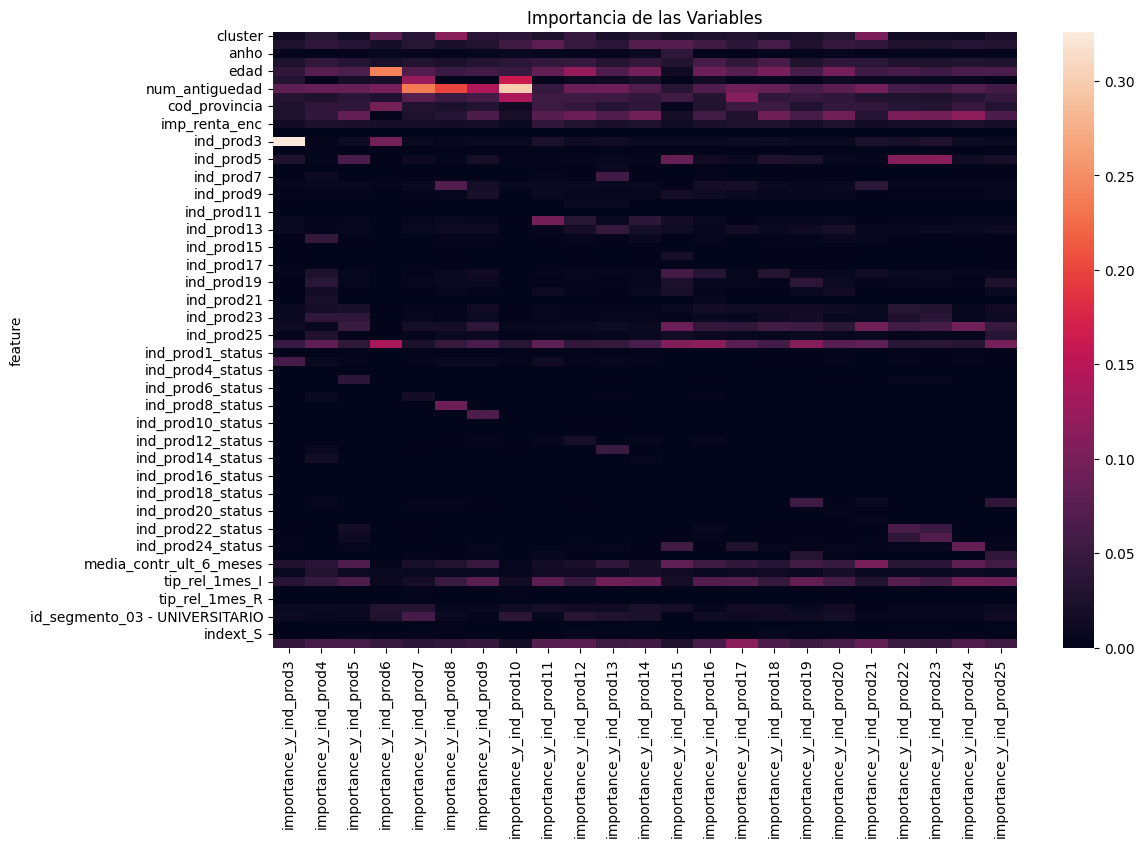

In [ ]:

feature_importances = pd.DataFrame()
for i, model in enumerate(multi_target_model.estimators_):
    importances = model.feature_importances_
    feature_importances[f'importance_{y_train.columns[i]}'] = importances

feature_importances['feature'] = X_train.drop(['cod_persona'], axis=1).columns
feature_importances = feature_importances.set_index('feature')
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances, annot=False)
plt.title('Importancia de las Variables')
plt.show()

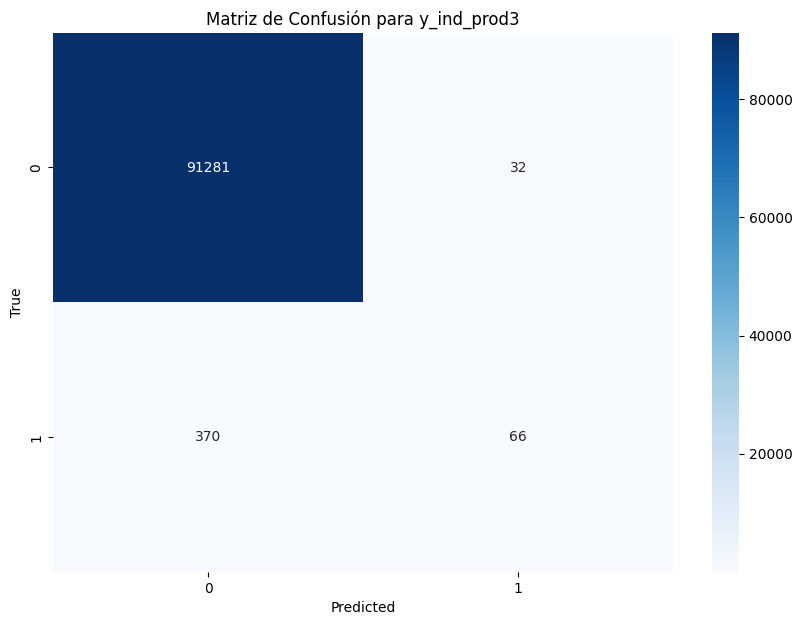

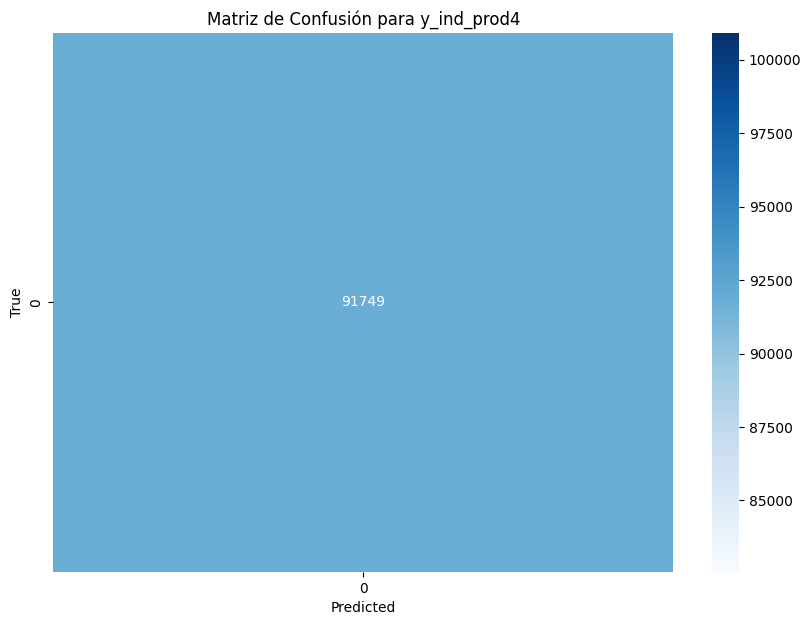

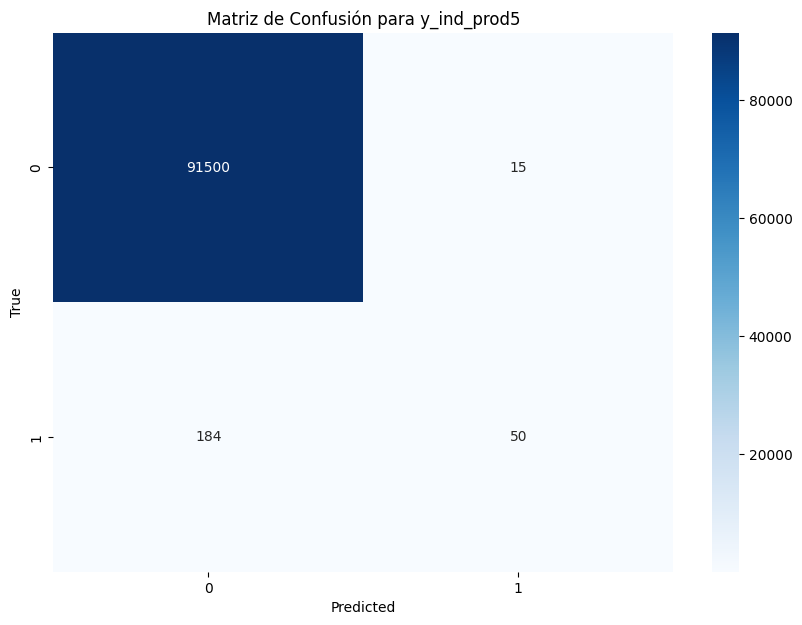

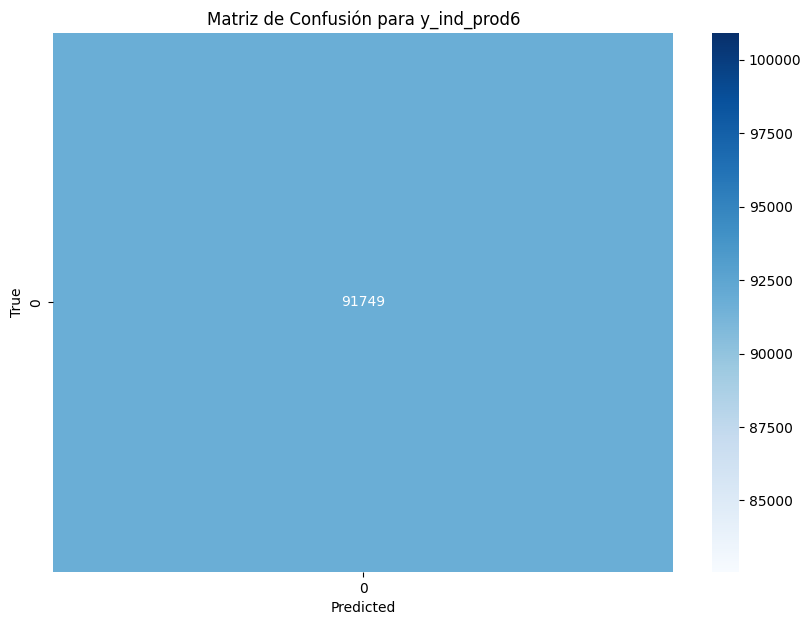

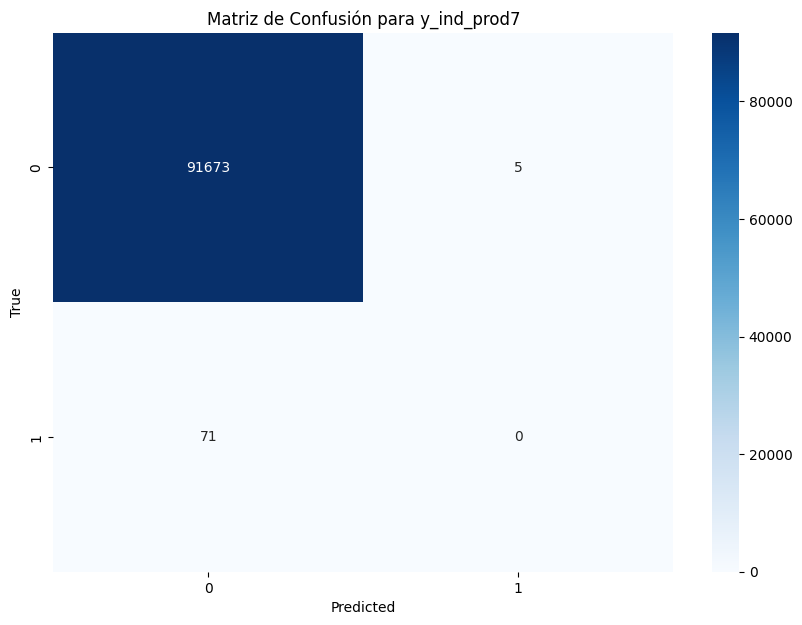

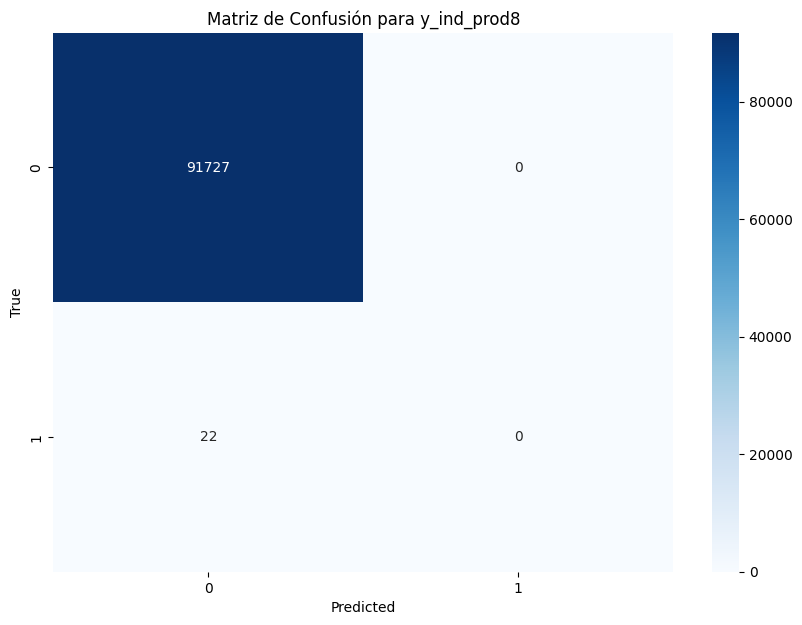

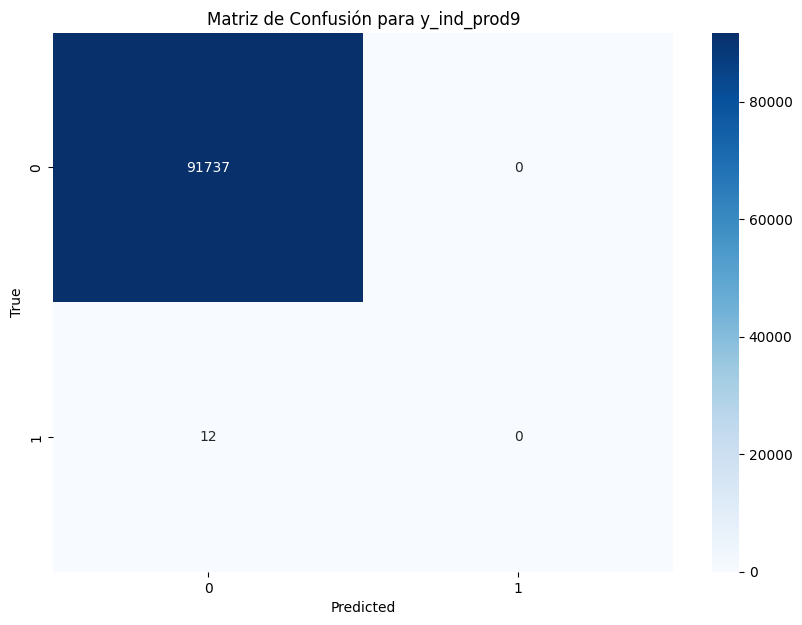

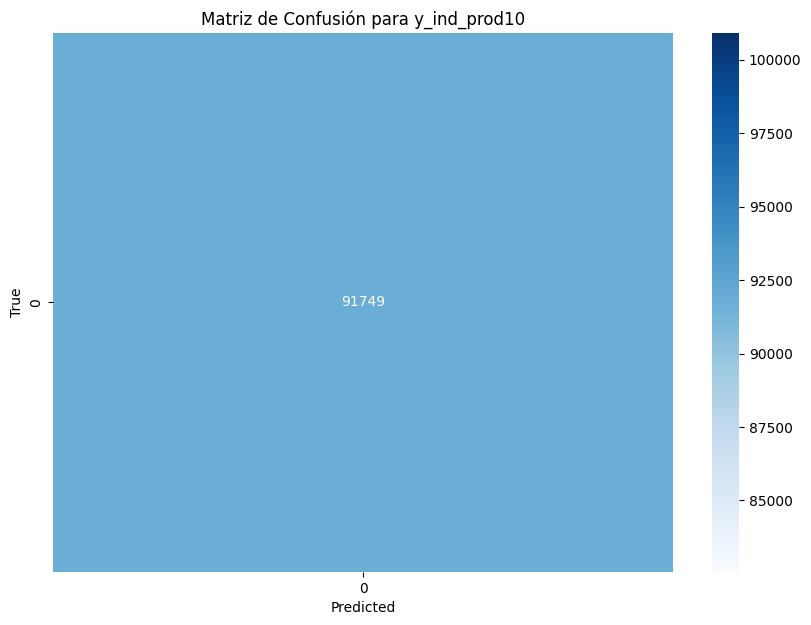

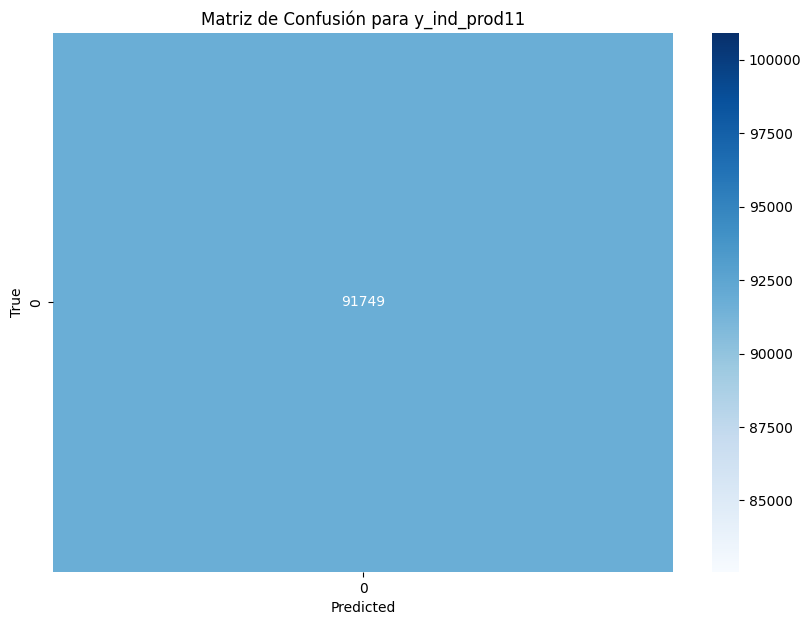

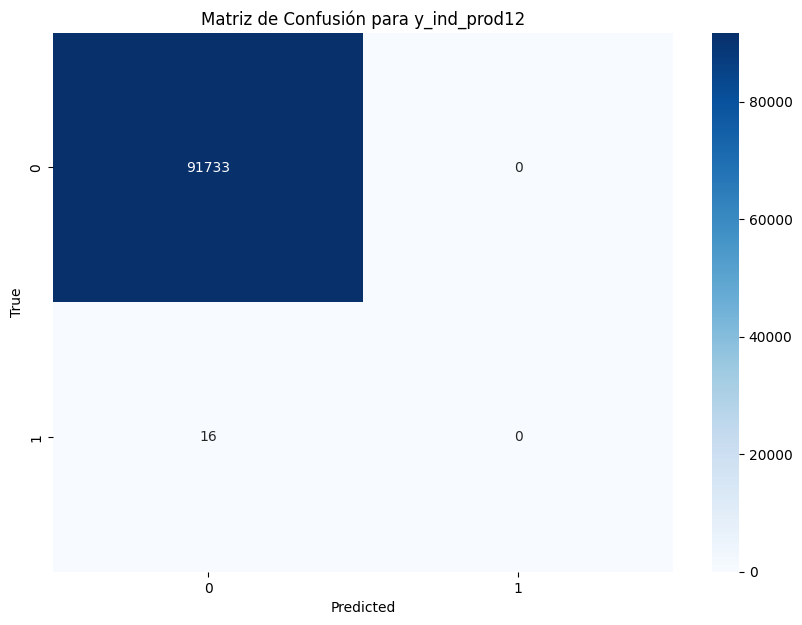

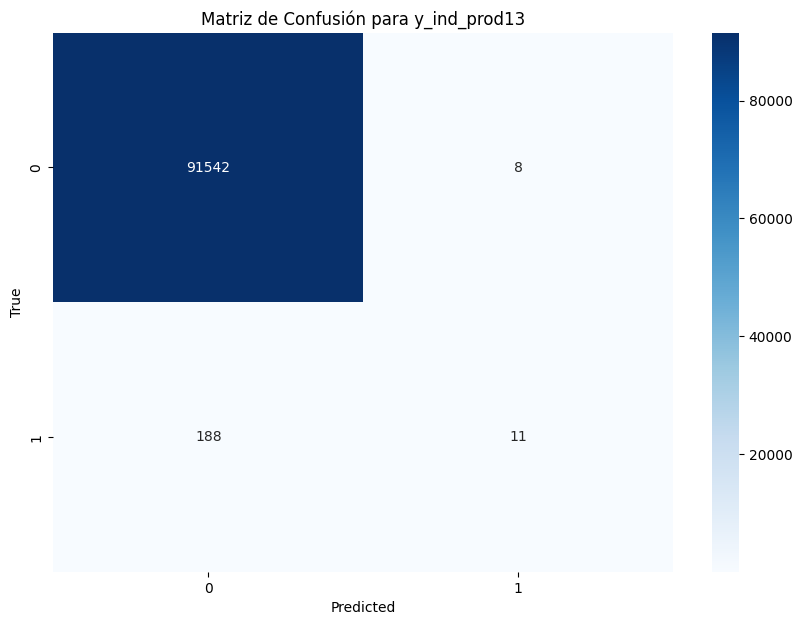

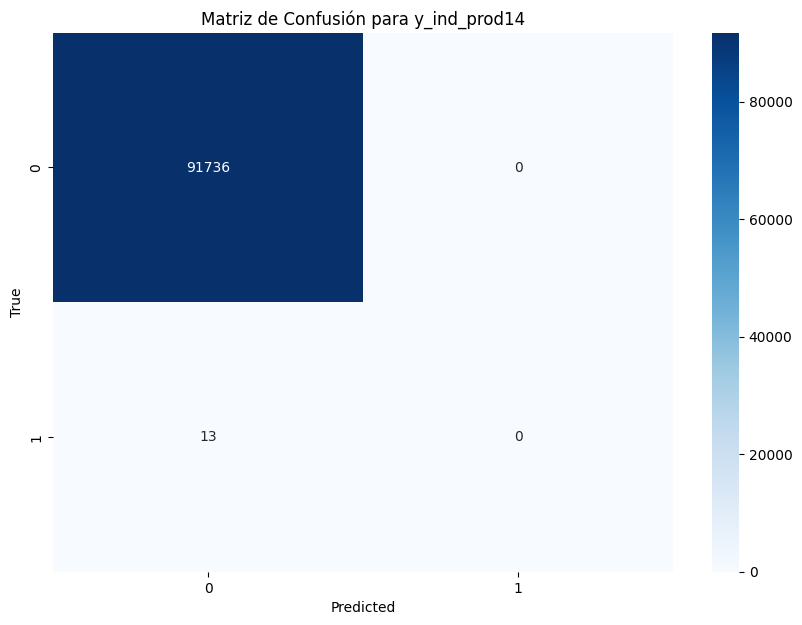

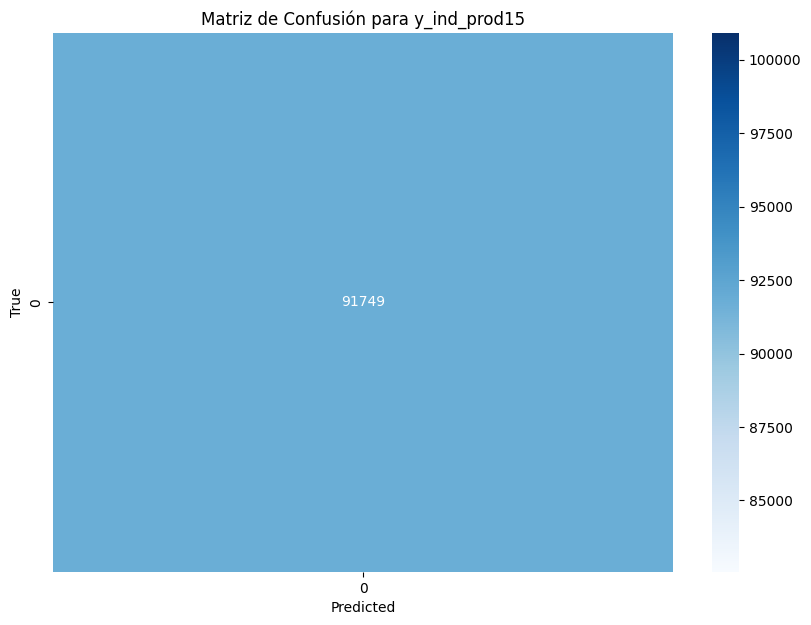

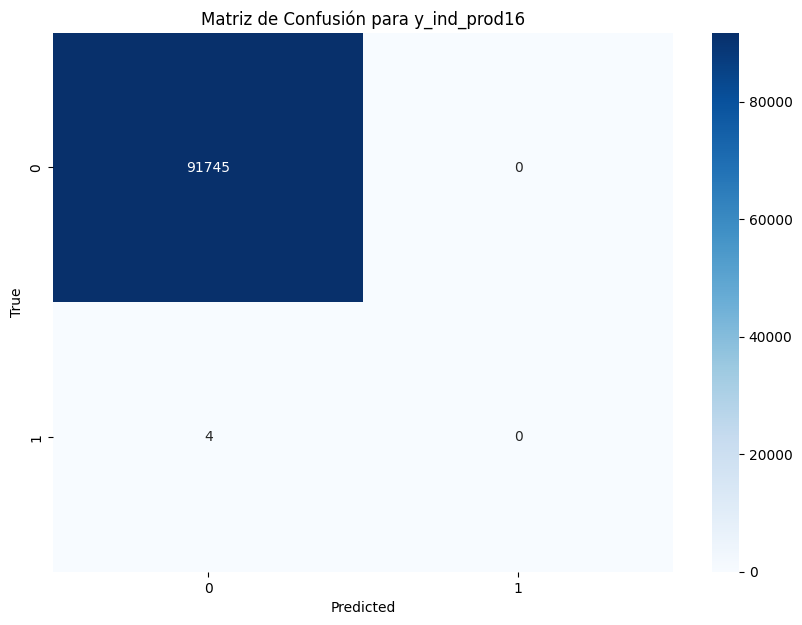

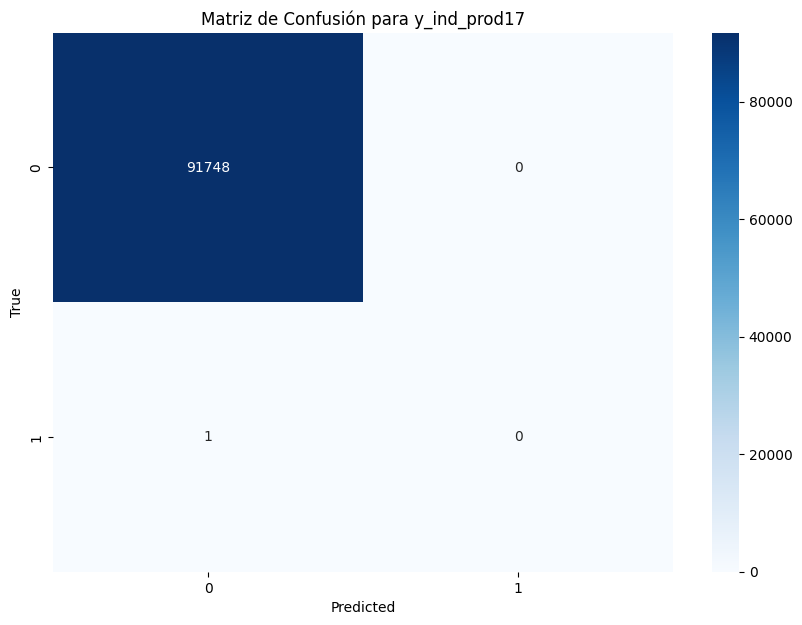

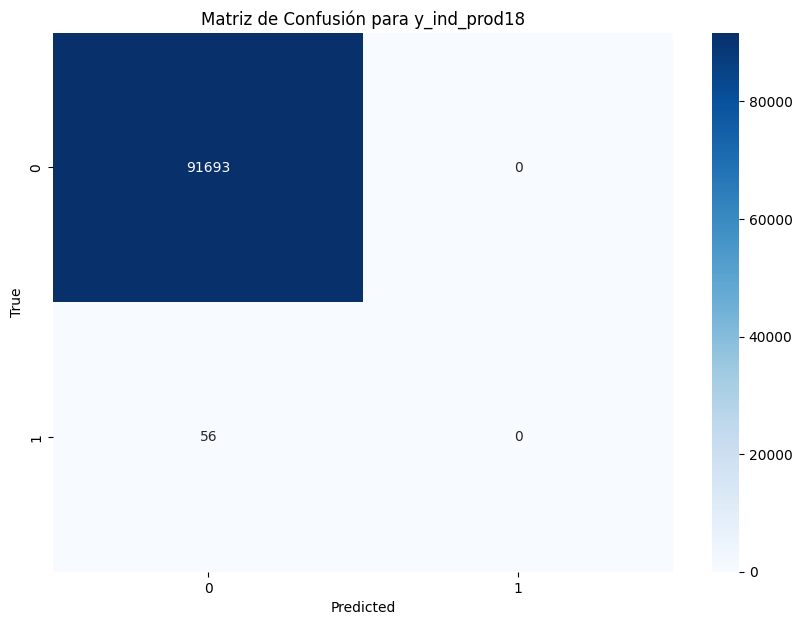

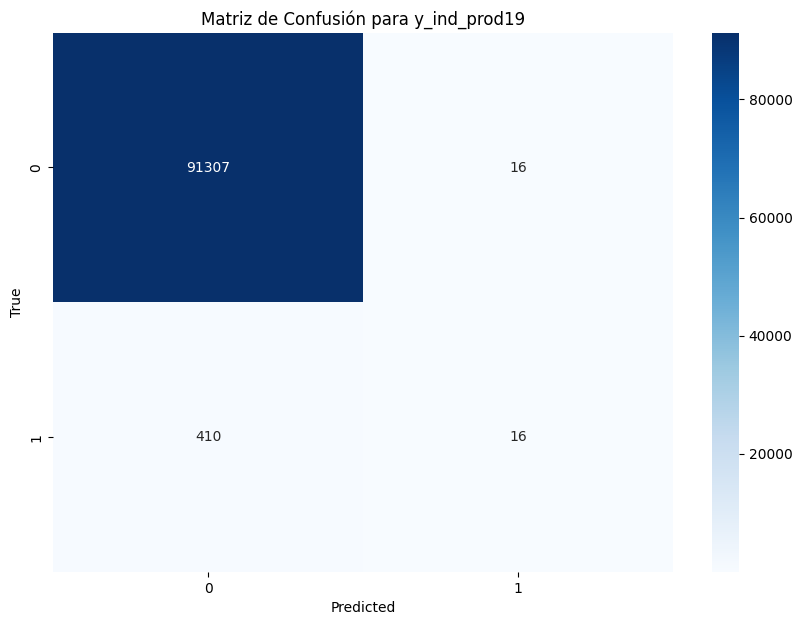

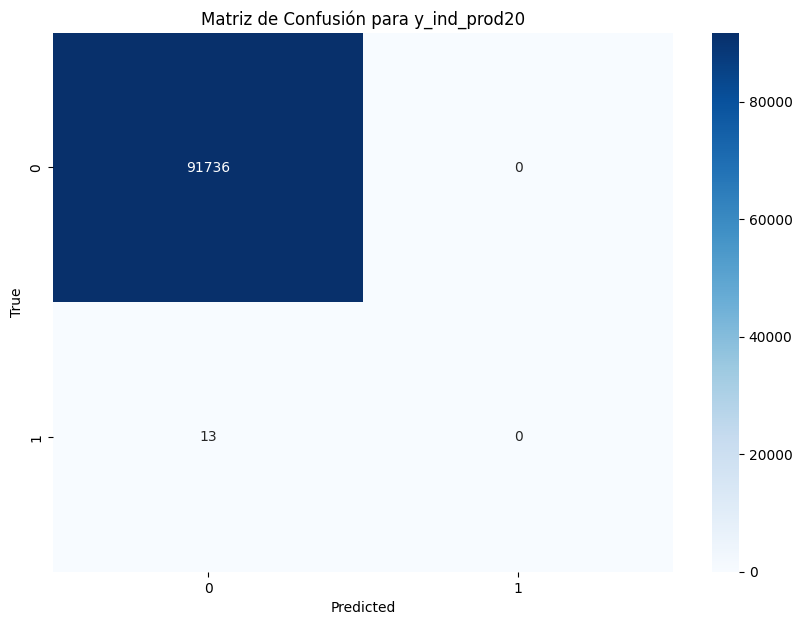

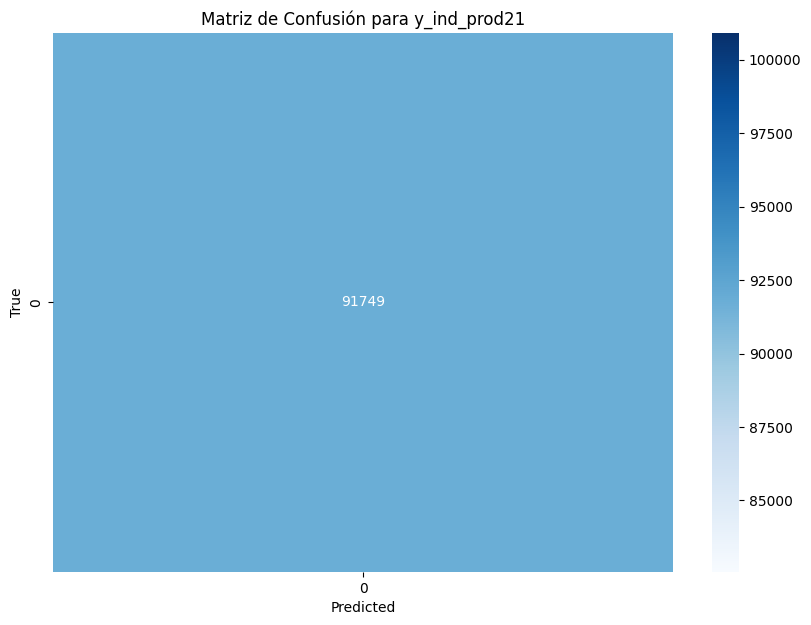

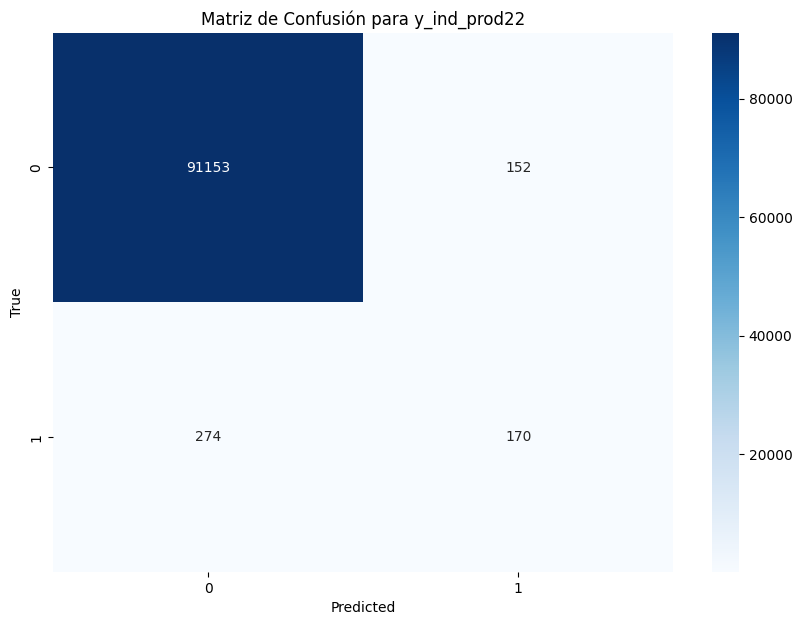

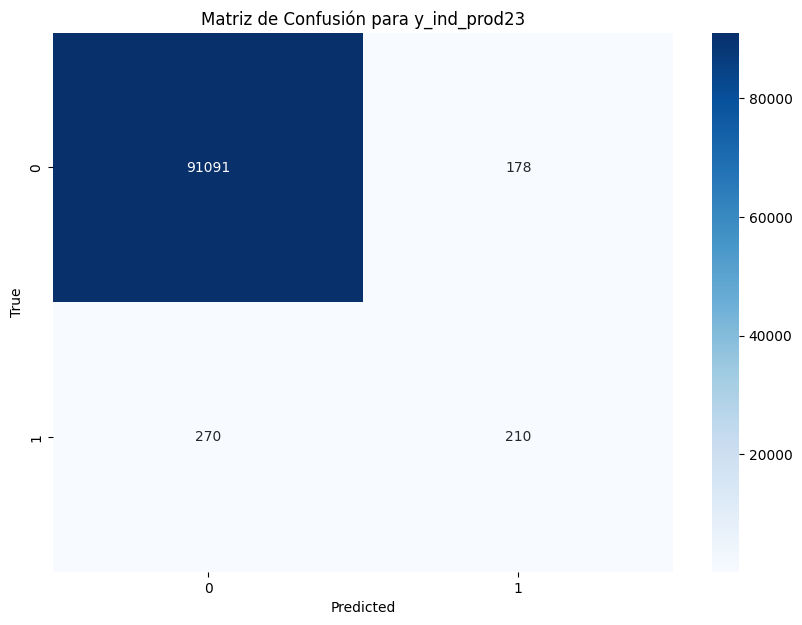

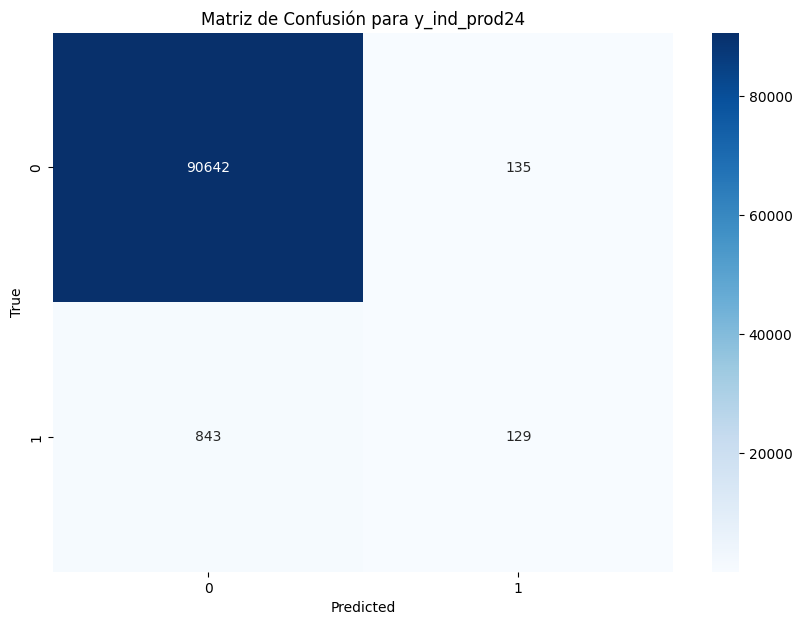

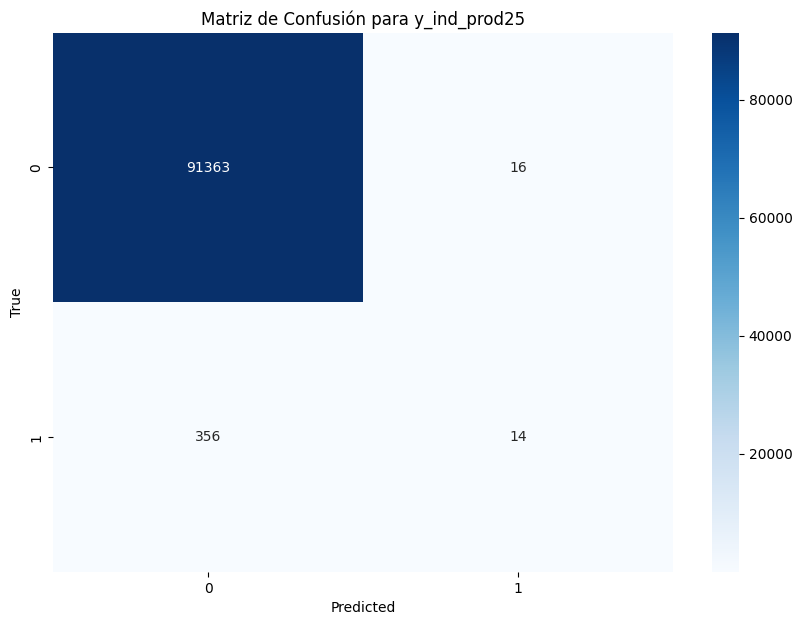

In [ ]:

for i, column in enumerate(y_train.columns):
    plt.figure(figsize=(10, 7))
    conf_matrix = confusion_matrix(y_test[column], y_pred[:, i])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión para {column}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.9711277507111794
Recall: 0.06299231295318253
Precision: 0.19765817302917488
F1 Score: 0.08516950696441473
              precision    recall  f1-score   support

           0       0.67      0.15      0.25       436
           1       0.00      0.00      0.00         0
           2       0.77      0.21      0.33       234
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        71
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        16
          10       0.58      0.06      0.10       199
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
feature_importances

importance_y_ind_prod3  \
feature                                                  
cluster                                       0.014602   
mes_anho                                      0.026493   
anho                                          0.002996   
mes                                           0.026459   
edad                                          0.042103   
...                                                ...   
id_segmento_02 - PARTICULARES                 0.008048   
id_segmento_03 - UNIVERSITARIO                0.011435   
indresi_S                                     0.000193   
indext_S                                      0.002383   
random_feature                                0.043263   

                                importance_y_ind_prod4  \
feature                                                  
cluster                                       0.034354   
mes_anho                                      0.041016   
anho                                          0.001176   
mes                                           0.042362   
edad                                          0.073125   
...                                                ...   
id_segmento_02 - PARTICULARES                 0.009808   
id_segmento_03 - UNIVERSITARIO                0.006989   
indresi_S                                     0.000015   
indext_S                                      0.000299   
random_feature                                0.058759   

                                importance_y_ind_prod5  \
feature                                                  
cluster                                       0.016790   
mes_anho                                      0.032345   
anho                                          0.003482   
mes                                           0.032399   
edad                                          0.064772   
...                                                ...   
id_segmento_02 - PARTICULARES                 0.009745   
id_segmento_03 - UNIVERSITARIO                0.007691   
indresi_S                                     0.000204   
indext_S                                      0.004611   
random_feature                                0.059389   

                                importance_y_ind_prod6  \
feature                                                  
cluster                                       0.075425   
mes_anho                                      0.019456   
anho                                          0.005135   
mes                                           0.021631   
edad                                          0.240446   
...                                                ...   
id_segmento_02 - PARTICULARES                 0.030111   
id_segmento_03 - UNIVERSITARIO                0.027053   
indresi_S                                     0.000002   
indext_S                                      0.001623   
random_feature                                0.047545   

                                importance_y_ind_prod7  \
feature                                                  
cluster                                       0.035536   
mes_anho                                      0.034097   
anho                                          0.003437   
mes                                           0.030014   
edad                                          0.067827   
...                                                ...   
id_segmento_02 - PARTICULARES                 0.030815   
id_segmento_03 - UNIVERSITARIO                0.058929   
indresi_S                                     0.000058   
indext_S                                      0.003203   
random_feature                                0.037254   

                                importance_y_ind_prod8  \
feature                                                  
cluster                                       0.112814   
mes_anho                                      0.022629   
anho                     

## Métrica MAP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Funciones para calcular APK y MAPK
def apk(actual, predicted, k):
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if len(actual)==0:
        return 0.0
    return score / min(len(actual), k)

def mapk(actual, predicted, k):
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])


In [ ]:

y_test_array = y_test.to_numpy()
# Calcula MAP@K para cada modelo
print("Random Forest: MAP@7 Score:", mapk(actual=y_test_array, predicted=y_pred, k=7))



Random Forest: MAP@7 Score: 0.1429913080666767


# XGBoost

In [ ]:
# Dividir los datos en un punto de corte temporal
cutoff_date = '2016-02'  # Por ejemplo, todos los datos antes de febrero 2016 para entrenamiento

# Crear una columna de fecha para facilitar el split
X['date'] = pd.to_datetime(X['anho'].astype(str) + '-' + X['mes'].astype(str))

# Dividir el conjunto de datos
X_train = X[X['date'] < cutoff_date]
X_test = X[X['date'] >= cutoff_date]
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

# Eliminar la columna 'date' si ya no es necesaria
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train.drop(['cod_persona'], axis = 1))

X_train_esc = scaler.transform(X_train.drop(['cod_persona'], axis = 1))
X_test_esc = scaler.transform(X_test.drop(['cod_persona'], axis = 1))

## GridSearch

In [ ]:
# Definir los parámetros para XGBoost
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [6, 10],
    'min_child_weight': [1, 5],
    'learning_rate': [0.01, 0.05],
    'gamma': [0, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Crear el modelo XGBoost
xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0, tree_method= 'gpu_hist')

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV a los datos
grid_search.fit(X_train_filtered, y_train)

# Obtener el mejor modelo encontrado por GridSearchCV
best_xgbc = grid_search.best_estimator_

# Predecir utilizando el mejor modelo
y_pred = best_xgbc.predict(X_test_filtered)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión encontrada: {accuracy:.4f}')
print(f'Mejores parámetros: {grid_search.best_params_}')

# Modelo final con los mejores parámetros
best_xgbc.fit(X_train_filtered, y_train)
y_pred = best_xgbc.predict(X_test_filtered)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo final: {accuracy:.4f}')


NameError: name 'X_train_filtered' is not defined

In [ ]:
#XGBoost Sin Grid Search
#Se ajustan los parámetros según el GridSearch
best_colsample_bytree = 0.8
best_gamma = 0.1
best_learning_rate = 0.01
best_max_depth = 10
best_min_child_weight = 1
best_n_estimators = 300
best_subsample = 0.8


xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=best_colsample_bytree,
    gamma=best_gamma,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    min_child_weight=best_min_child_weight,
    n_estimators=best_n_estimators,
    subsample=best_subsample,
    random_state=0  # Usar GPU
)


# Entrenar el modelo
xgb.fit(X_train_esc, y_train)

# Usar MultiOutputClassifier para manejar múltiples etiquetas sin n_jobs=-1
model = MultiOutputClassifier(xgb)

# Entrenar el modelo con los datos balanceados
model.fit(X_train_esc, y_train)

# Predecir utilizando el mejor modelo
y_pred = model.predict(X_test_esc)

# Asegurarse de que y_test y y_pred tienen el mismo formato
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo final: {accuracy:.4f}')

Precisión del modelo final: 0.9716


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Funciones para calcular APK y MAPK
def apk(actual, predicted, k):
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if len(actual) == 0:
        return 0.0
    return score / min(len(actual), k)

def mapk(actual, predicted, k):
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

In [ ]:
# Calcular MAP@K
print("XGBoost: MAP@7 Score:", mapk(actual=y_test, predicted=y_pred, k=7))

XGBoost: MAP@7 Score: 0.1430688265671286


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Accuracy: 0.971552823464016
Recall: 0.07772184260378846
Precision: 0.2687181954306402
F1 Score: 0.10645915493172549
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.74      0.19      0.31       436
           2       0.00      0.00      0.00         0
           3       0.76      0.40      0.52       234
           4       0.00      0.00      0.00         0
           5       0.67      0.03      0.05        71
           6       1.00      0.05      0.09        22
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00        16
          11       0.56      0.20      0.30       199
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         4
          15       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Matriz de confusión para la etiqueta 1:
 [[91749]]


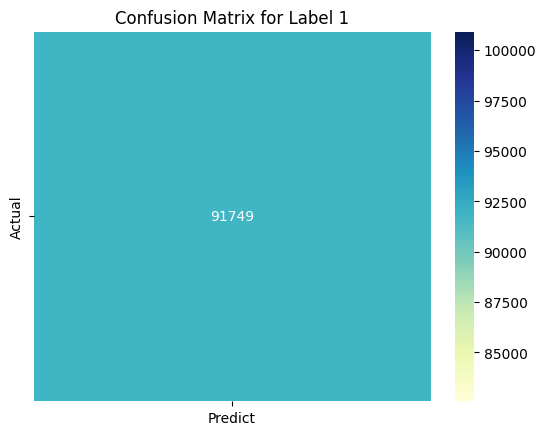

Matriz de confusión para la etiqueta 2:
 [[91283    30]
 [  351    85]]


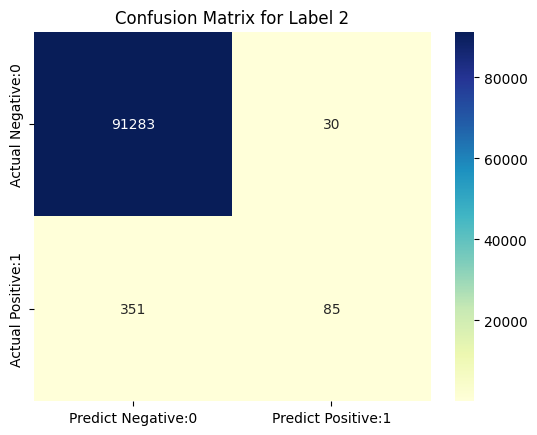

Matriz de confusión para la etiqueta 3:
 [[91749]]


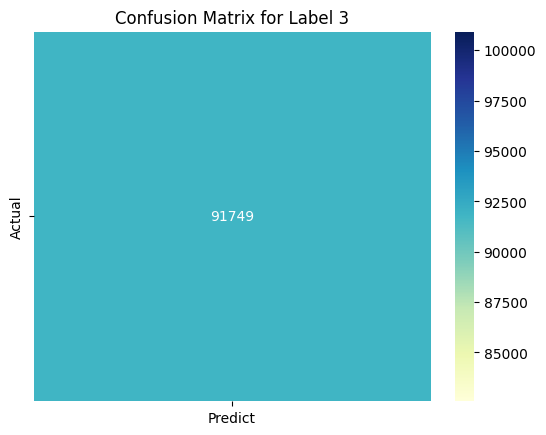

Matriz de confusión para la etiqueta 4:
 [[91486    29]
 [  141    93]]


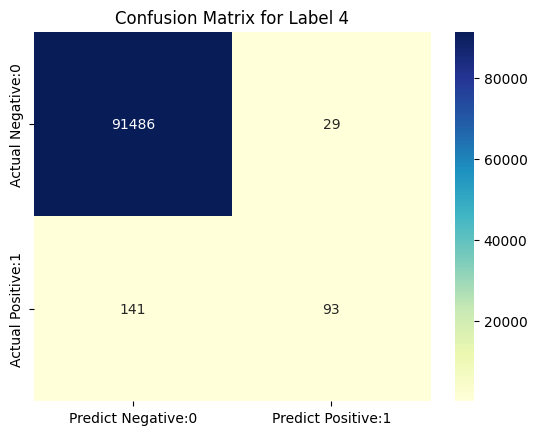

Matriz de confusión para la etiqueta 5:
 [[91749]]


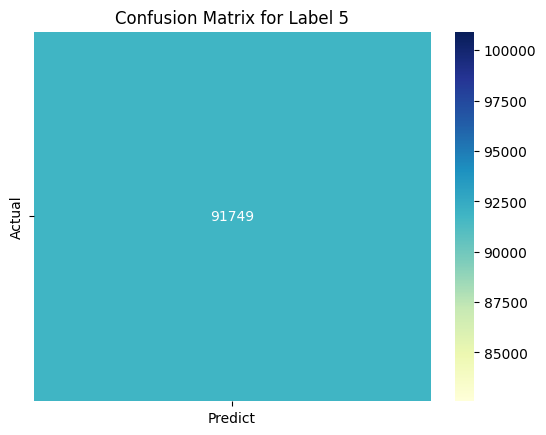

Matriz de confusión para la etiqueta 6:
 [[91677     1]
 [   69     2]]


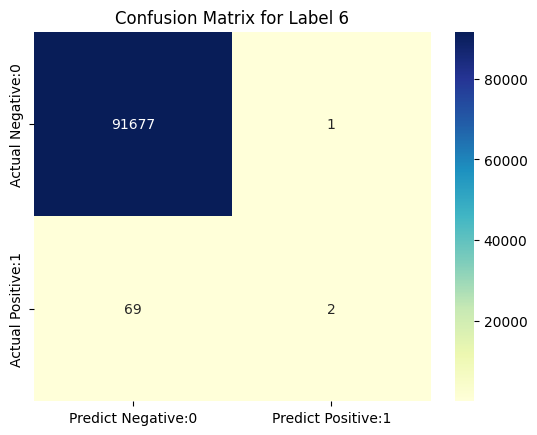

Matriz de confusión para la etiqueta 7:
 [[91727     0]
 [   21     1]]


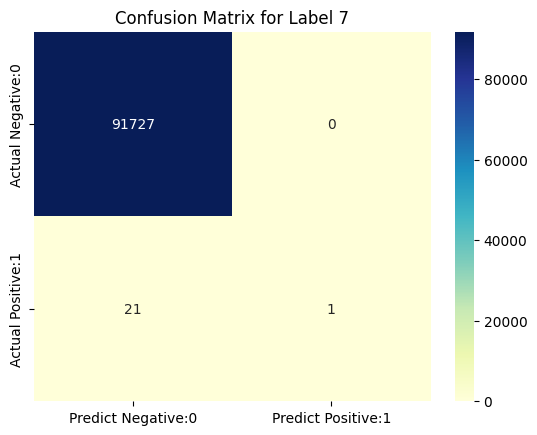

Matriz de confusión para la etiqueta 8:
 [[91736     1]
 [   12     0]]


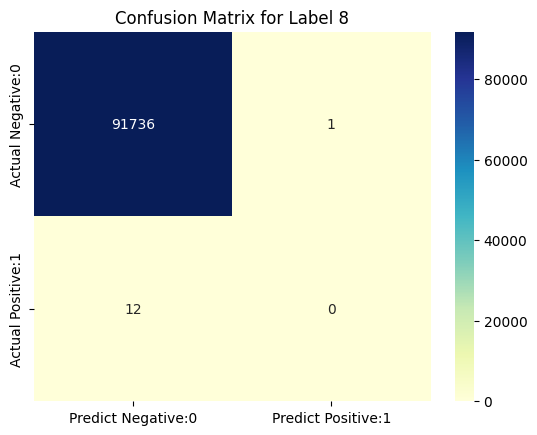

Matriz de confusión para la etiqueta 9:
 [[91749]]


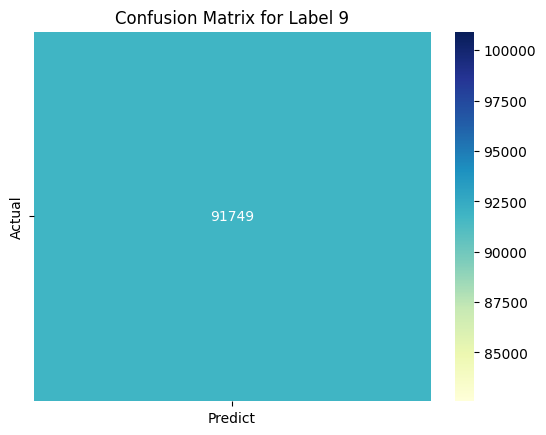

Matriz de confusión para la etiqueta 10:
 [[91749]]


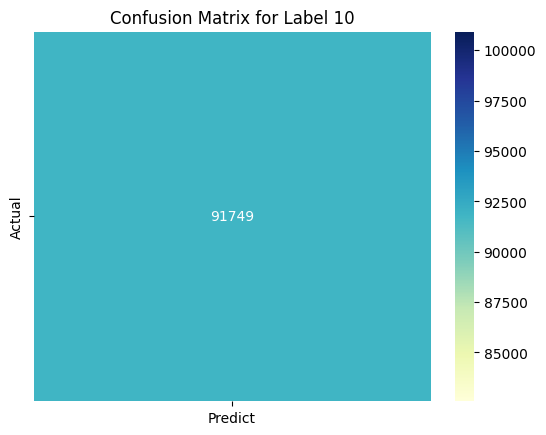

Matriz de confusión para la etiqueta 11:
 [[91733     0]
 [   16     0]]


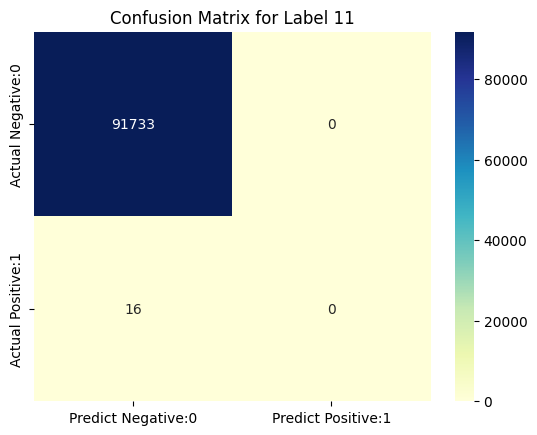

Matriz de confusión para la etiqueta 12:
 [[91518    32]
 [  159    40]]


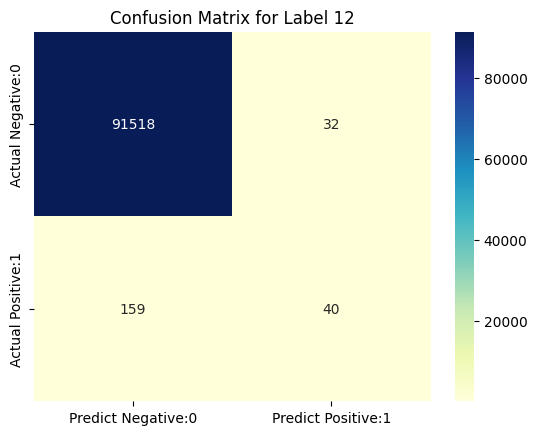

Matriz de confusión para la etiqueta 13:
 [[91736     0]
 [   13     0]]


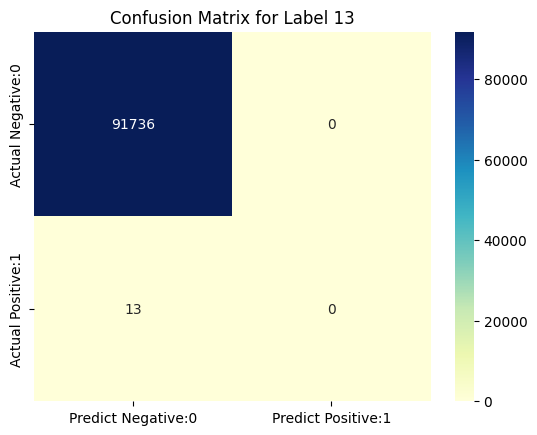

Matriz de confusión para la etiqueta 14:
 [[91749]]


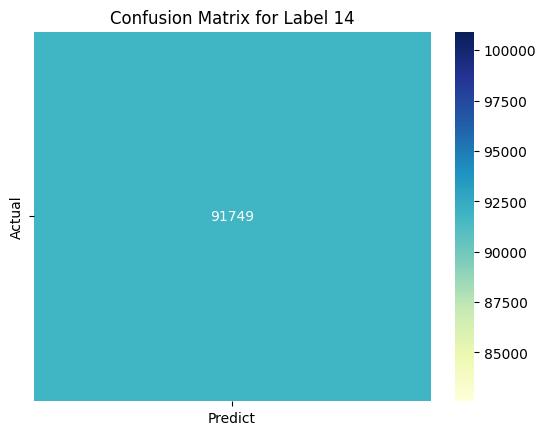

Matriz de confusión para la etiqueta 15:
 [[91745     0]
 [    4     0]]


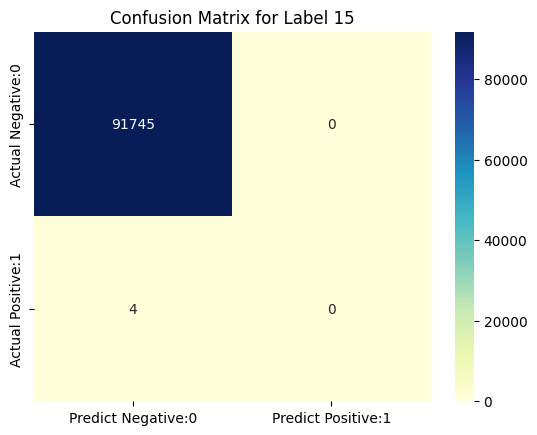

Matriz de confusión para la etiqueta 16:
 [[91748     0]
 [    1     0]]


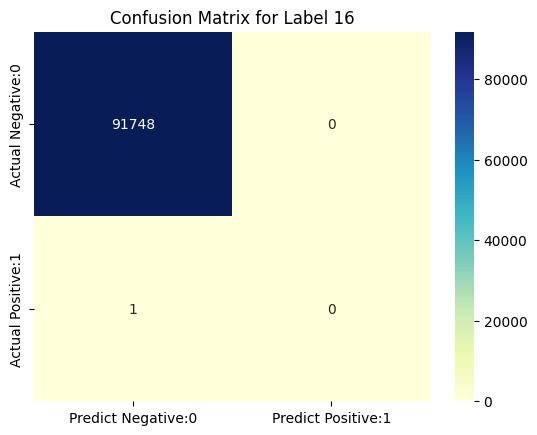

Matriz de confusión para la etiqueta 17:
 [[91693     0]
 [   56     0]]


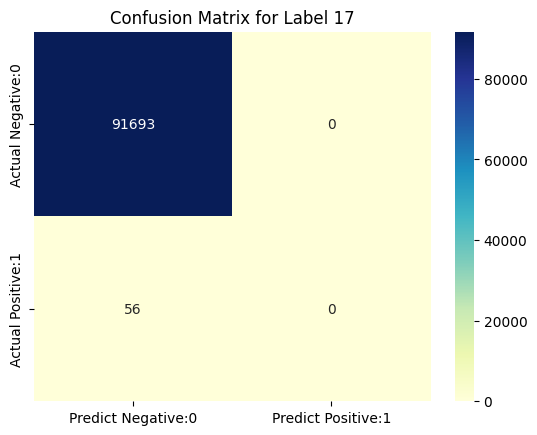

Matriz de confusión para la etiqueta 18:
 [[91314     9]
 [  411    15]]


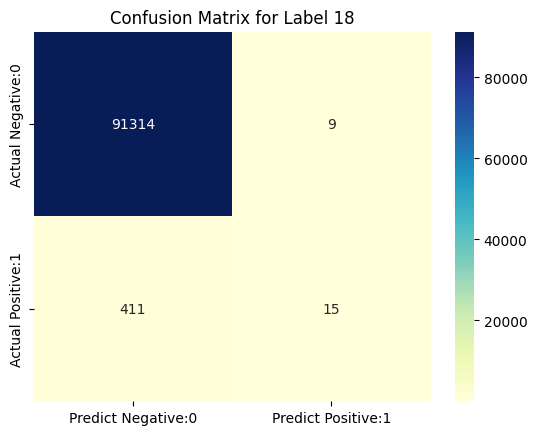

Matriz de confusión para la etiqueta 19:
 [[91736     0]
 [   13     0]]


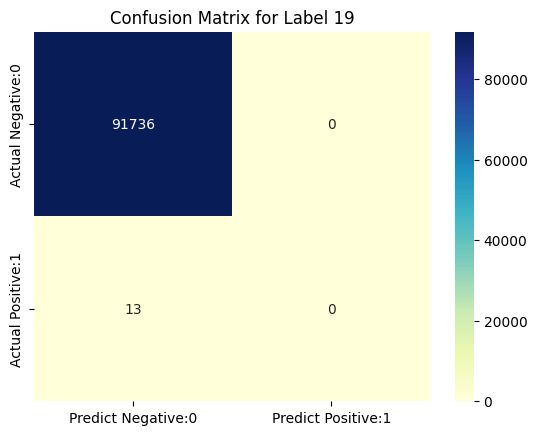

Matriz de confusión para la etiqueta 20:
 [[91749]]


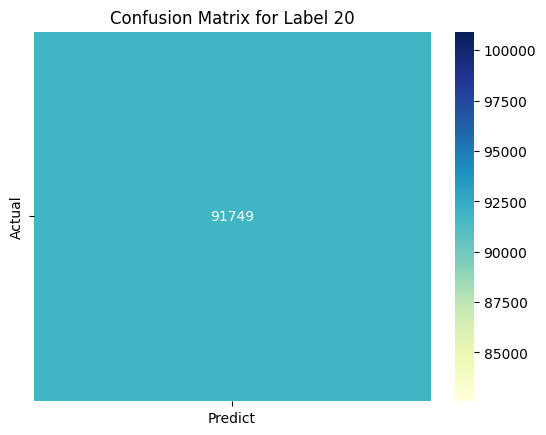

Matriz de confusión para la etiqueta 21:
 [[91200   105]
 [  300   144]]


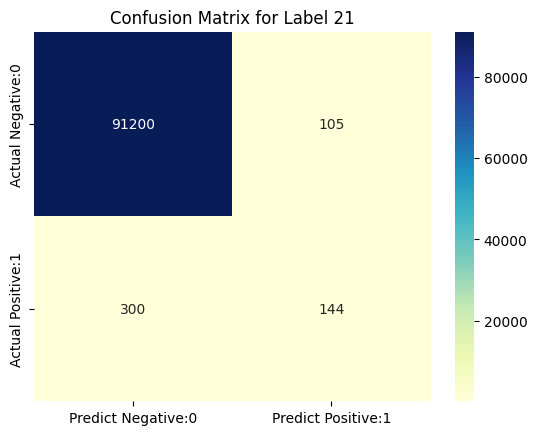

Matriz de confusión para la etiqueta 22:
 [[91096   173]
 [  271   209]]


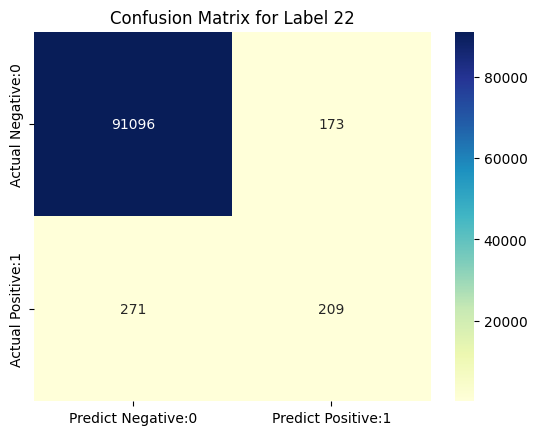

Matriz de confusión para la etiqueta 23:
 [[90608   169]
 [  819   153]]


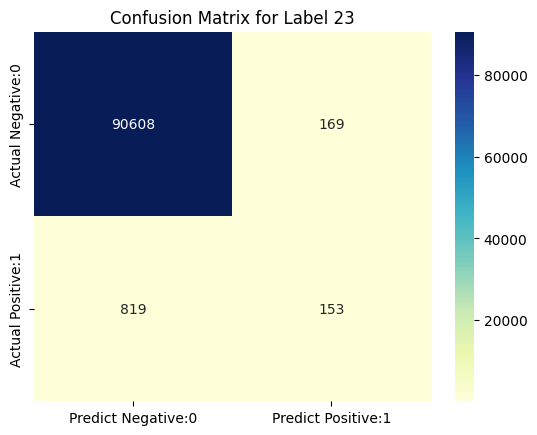

Matriz de confusión para la etiqueta 24:
 [[91362    17]
 [  353    17]]


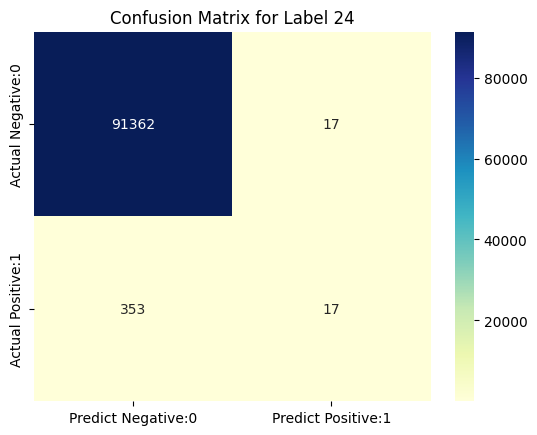

Classification report para la etiqueta 1:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91749

    accuracy                           1.00     91749
   macro avg       1.00      1.00      1.00     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 2:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91313
         1.0       0.74      0.19      0.31       436

    accuracy                           1.00     91749
   macro avg       0.87      0.60      0.65     91749
weighted avg       0.99      1.00      0.99     91749

Classification report para la etiqueta 3:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91749

    accuracy                           1.00     91749
   macro avg       1.00      1.00      1.00     91749
weighted avg       1.00      1.00      1.00     91749

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91550
         1.0       0.56      0.20      0.30       199

    accuracy                           1.00     91749
   macro avg       0.78      0.60      0.65     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 13:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91736
         1.0       0.00      0.00      0.00        13

    accuracy                           1.00     91749
   macro avg       0.50      0.50      0.50     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 14:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91749

    accuracy                           1.00     91749
   macro avg       1.00      1.00      1.00     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 15:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91745
         1.0       0.00      0.00      0.00         4

    accuracy                           1.00     91749
   macro avg       0.50      0.50      0.50     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 16:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91748
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     91749
   macro avg       0.50      0.50      0.50     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 17:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91693
         1.0       0.00      0.00      0.00        56

    accuracy                           1.00     91749
   macro avg       0.50      0.50      0.50     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 18:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91323
         1.0       0.62      0.04      0.07       426

    accuracy                           1.00     91749
   macro avg       0.81      0.52      0.53     91749
weighted avg       0.99      1.00      0.99     91749

Classification report para la etiqueta 19:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91736
         1.0       0.00      0.00      0.00        13

    accuracy                           1.00     91749
   macro avg       0.50      0.50      0.50     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 20:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91749

    accuracy                           1.00     91749
   macro avg       1.00      1.00      1.00     91749
weighted avg       1.00      1.00      1.00     91749

Classification report para la etiqueta 21:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91305
         1.0       0.58      0.32      0.42       444

    accuracy                           1.00     91749
   macro avg       0.79      0.66      0.71     91749
weighted avg       0.99      1.00      0

In [ ]:
# Muestra la matriz de confusión para cada etiqueta
for i in range(y_test.shape[1]):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    if cm.shape == (1, 1):
        cm_matrix = pd.DataFrame(cm, index=['Actual'], columns=['Predict'])
    else:
        cm_matrix = pd.DataFrame(cm, index=['Actual Negative:0', 'Actual Positive:1'], columns=['Predict Negative:0', 'Predict Positive:1'])
    print(f'Matriz de confusión para la etiqueta {i+1}:\n', cm)
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion Matrix for Label {i+1}')
    plt.show()

# Reporte de clasificación para cada etiqueta
for i in range(y_test.shape[1]):
    print(f'Classification report para la etiqueta {i+1}:\n')
    print(classification_report(y_test[:, i], y_pred[:, i]))